# Import libraries

In [1]:
# !pip install ccxt 
# !pip install pandas
# !pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------- ----------------------- 2.4/5.7 MB 12.2 MB/s eta 0:00:01
   -------------------------------------- - 5.5/5.7 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 5.7/5.7 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 27.0 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 20.6 MB/s eta 0:00:00
Using cached idna-3.10-py3-none-any.whl (70 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Load API keys 

# Load exchange 

# Function for executing trades

Testing

In [ ]:
# import ccxt
# import time
# import pandas as pd
# from datetime import datetime

# # Binance API keys (Replace with your actual API keys)
# BINANCE_API_KEY = 'your_api_key'
# BINANCE_SECRET_KEY = 'your_secret_key'

# # Initialize Binance Futures API
# binance = ccxt.binance({
#     'apiKey': BINANCE_API_KEY,
#     'secret': BINANCE_SECRET_KEY,
#     'options': {'defaultType': 'future'}
# })

# # Settings
# SYMBOL = 'BTC/USDT'
# LEVERAGE = 5
# TRADE_AMOUNT = 0.01  # Adjust based on risk
# FUNDING_THRESHOLD = 0.0005  # Arbitrage trigger threshold
# DATA_FILE = "funding_arbitrage_data.csv"

# # Store trade history
# columns = ["timestamp", "funding_rate", "position", "profit", "balance"]
# df = pd.DataFrame(columns=columns)


# # Function to fetch funding rate
# def get_funding_rate(symbol):
#     try:
#         funding_rate = binance.fetch_funding_rate(symbol)
#         return funding_rate['fundingRate']
#     except Exception as e:
#         print(f"Error fetching funding rate: {e}")
#         return None


# # Function to place trades
# def place_order(symbol, side, amount, leverage=LEVERAGE):
#     try:
#         binance.set_leverage(leverage, symbol)
#         order = binance.create_market_order(symbol, side, amount)
#         print(f"Order placed: {side} {amount} {symbol}")
#         return order
#     except Exception as e:
#         print(f"Error placing order: {e}")
#         return None


# # Function to close positions
# def close_positions(symbol, amount):
#     place_order(symbol, "sell", amount)  # Close long position
#     place_order(symbol, "buy", amount)  # Close short position


# # Main strategy function
# def funding_arbitrage():
#     global df

#     funding_rate = get_funding_rate(SYMBOL)
#     if funding_rate is None:
#         return

#     print(f"Current funding rate: {funding_rate}")

#     if funding_rate > FUNDING_THRESHOLD:
#         print("Arbitrage opportunity detected: LONG position opened.")
#         order = place_order(SYMBOL, "buy", TRADE_AMOUNT)
#         position = "long"
#     elif funding_rate < -FUNDING_THRESHOLD:
#         print("Arbitrage opportunity detected: SHORT position opened.")
#         order = place_order(SYMBOL, "sell", TRADE_AMOUNT)
#         position = "short"
#     else:
#         print("No arbitrage opportunity found.")
#         return

#     # Wait for funding period (8 hours)
#     time.sleep(8 * 60 * 60)

#     # Close the trade
#     close_positions(SYMBOL, TRADE_AMOUNT)

#     # Log trade data
#     timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     profit = TRADE_AMOUNT * funding_rate * 8  # Approximate funding profit
#     balance = binance.fetch_balance()['total']['USDT']

#     new_entry = pd.DataFrame([[timestamp, funding_rate, position, profit, balance]], columns=columns)
#     df = pd.concat([df, new_entry], ignore_index=True)

#     # Save to CSV for later comparison
#     df.to_csv(DATA_FILE, index=False)
#     print("Trade logged successfully.\n")


# # Run the script periodically (Every 8 hours)
# while True:
#     funding_arbitrage()


To check if api key can connect to binance

In [ ]:

# import ccxt

# # ✅ Replace with your Binance API keys
# api_key = 'cYvphVwGXGAid79K7sE6rYfDRQepPehoFX9VAUEe8TLpV3l4VHTQ8fVZsTOHEQBy'
# api_secret = 'qFQ5pYAVfI6LhqnPz3hSRKNuMt56Z5b2Hlt1u8xFMI9kORQdpgSz7NSTKYmHylFC'

# binance = ccxt.binance({
#     'apiKey': api_key,
#     'secret': api_secret,
#     'enableRateLimit': True,
#     'options': {'defaultType': 'future'}
# })

# try:
#     # Test fetching balance
#     balance = binance.fetch_balance()
#     print("✅ Futures API Connection Successful! USDT Balance:", balance['total']['USDT'])
# except Exception as e:
#     print("⛔ API Connection Failed:", e)



✅ Futures API Connection Successful! USDT Balance: 0.0


To check if bianance future api is online

In [ ]:
import requests

url = "https://fapi.binance.com/fapi/v1/ping"
response = requests.get(url)

if response.status_code == 200:
    print("✅ Binance Futures API is online!")
else:
    print(f"⛔ Binance Futures API is down! Status code: {response.status_code}")


✅ Binance Futures API is online!


## Funding rate trading bot

In [ ]:
# import ccxt

# binance_real = ccxt.binance({
#     'apiKey': 'cYvphVwGXGAid79K7sE6rYfDRQepPehoFX9VAUEe8TLpV3l4VHTQ8fVZsTOHEQBy',
#     'secret': 'qFQ5pYAVfI6LhqnPz3hSRKNuMt56Z5b2Hlt1u8xFMI9kORQdpgSz7NSTKYmHylFC',
#     'options': {'defaultType': 'future'}
# })

# symbol = "BTC/USDT"  # ✅ Ensure it's in this format for CCXT

# try:
#     funding_info = binance_real.fetch_funding_rate(symbol)
#     print("✅ Funding Rate:", funding_info)
# except Exception as e:
#     print("❌ Funding Rate Fetch Failed:", e)


✅ Funding Rate: {'info': {'symbol': 'BTCUSDT', 'markPrice': '97454.50000000', 'indexPrice': '97496.30600000', 'estimatedSettlePrice': '97400.45862336', 'lastFundingRate': '0.00008081', 'interestRate': '0.00010000', 'nextFundingTime': '1739203200000', 'time': '1739200515000'}, 'symbol': 'BTC/USDT:USDT', 'markPrice': 97454.5, 'indexPrice': 97496.306, 'interestRate': 0.0001, 'estimatedSettlePrice': 97400.45862336, 'timestamp': 1739200515000, 'datetime': '2025-02-10T15:15:15.000Z', 'fundingRate': 8.081e-05, 'fundingTimestamp': 1739203200000, 'fundingDatetime': '2025-02-10T16:00:00.000Z', 'nextFundingRate': None, 'nextFundingTimestamp': None, 'nextFundingDatetime': None, 'previousFundingRate': None, 'previousFundingTimestamp': None, 'previousFundingDatetime': None, 'interval': None}


In [ ]:
# binance_testnet = ccxt.binance({
#     'apiKey': 'XakkBEsWhJkOkFd2oHV3bN4wf6epSsFVWJ0jYCRkHyjpcEAbQXK0IGiQf2hJj6sA',
#     'secret': '4Xy4w8kGORt86tkgupybOHoHyzhx2TSaVZECByBT5bVbYsDxaIHzOZpcrZyAQjT7',
#     'options': {'defaultType': 'future'},
#     'urls': {'api': 'https://testnet.binancefuture.com'}
# })

# try:
#     funding_info = binance_testnet.fetch_funding_rate(symbol)
#     print("✅ Testnet Funding Rate:", funding_info)
# except Exception as e:
#     print("❌ Testnet Funding Rate Fetch Failed:", e)


❌ Testnet Funding Rate Fetch Failed: binance does not have a testnet/sandbox URL for sapi endpoints


In [ ]:
# import ccxt
# import time
# import pandas as pd
# from datetime import datetime

# # ✅ Real Binance API (For fetching funding rates)
# binance_real = ccxt.binance({
#     'apiKey': 'cYvphVwGXGAid79K7sE6rYfDRQepPehoFX9VAUEe8TLpV3l4VHTQ8fVZsTOHEQBy',
#     'secret': 'qFQ5pYAVfI6LhqnPz3hSRKNuMt56Z5b2Hlt1u8xFMI9kORQdpgSz7NSTKYmHylFC',
#     'options': {'defaultType': 'future'}
# })

# # ✅ Binance Testnet API (For simulated trading)
# binance_testnet = ccxt.binance({
#     'apiKey': 'mHzjOwXDgA6Lw5vwOxJssvBYGCbqqRBtgTcK2m4KnZo0nxM1rGumWOvEXKWPlZWh',  
#     'secret': 'j3ST4Q3i07OfdtBwbiLTMggN35bSlmDBLB4q4saYpKSgibjxqsWDGuBLWMEdPYqC',  
#     'options': {'defaultType': 'future'},
#     'urls': {
#         'api': {
#             'public': 'https://testnet.binancefuture.com/fapi/v1',
#             'private': 'https://testnet.binancefuture.com/fapi/v1',
#         }
#     }
# })

# # Settings
# SYMBOL = 'BTC/USDT'
# LEVERAGE = 5
# TRADE_AMOUNT = 0.01  # Adjust based on risk
# FUNDING_THRESHOLD = -0.00007852  # Arbitrage trigger threshold
# DATA_FILE = "funding_arbitrage_data_testnet.csv"

# # Store trade history
# columns = ["timestamp", "funding_rate", "position", "profit", "balance"]
# df = pd.DataFrame(columns=columns)

# # ✅ Function to fetch funding rate from real Binance API
# def get_funding_rate(symbol):
#     try:
#         funding_info = binance_real.fetch_funding_rate(symbol)
#         return funding_info['fundingRate']
#     except Exception as e:
#         print(f"Error fetching funding rate: {e}")
#         return None

# # ✅ Function to place trades on Binance Testnet
# def place_order(symbol, side, amount, leverage=LEVERAGE):
#     try:
#         # Set leverage
#         binance_testnet.set_leverage(leverage, symbol)
#         print(f"Leverage set to {leverage}x for {symbol}")

#         # Place market order
#         order = binance_testnet.create_order(symbol, 'market', side, amount)
#         print(f"Testnet Order placed: {side} {amount} {symbol}")
#         return order
#     except Exception as e:
#         print(f"Error placing testnet order: {e}")
#         return None

# # ✅ Function to close positions on Binance Testnet
# def close_positions(symbol, amount):
#     try:
#         # Fetch current positions
#         positions = binance_testnet.fetch_positions(symbol)
#         for position in positions:
#             if position['symbol'] == symbol.replace('/', ''):
#                 if position['side'] == 'long':
#                     place_order(symbol, "sell", amount)  # Close long position
#                 elif position['side'] == 'short':
#                     place_order(symbol, "buy", amount)  # Close short position
#     except Exception as e:
#         print(f"Error closing positions: {e}")

# # ✅ Main strategy function
# def funding_arbitrage():
#     global df

#     funding_rate = get_funding_rate(SYMBOL)
#     if funding_rate is None:
#         return

#     print(f"Current Funding Rate: {funding_rate}")

#     if funding_rate > FUNDING_THRESHOLD:
#         print("Arbitrage opportunity detected: LONG position opened.")
#         order = place_order(SYMBOL, "buy", TRADE_AMOUNT)
#         position = "long"
#     elif funding_rate < -FUNDING_THRESHOLD:
#         print("Arbitrage opportunity detected: SHORT position opened.")
#         order = place_order(SYMBOL, "sell", TRADE_AMOUNT)
#         position = "short"
#     else:
#         print("No arbitrage opportunity found.")
#         return

#     # Wait for funding period (8 hours)
#     time.sleep(8 * 60 * 60)

#     # Close the trade
#     close_positions(SYMBOL, TRADE_AMOUNT)

#     # Log trade data
#     timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     profit = TRADE_AMOUNT * funding_rate * 8  # Approximate funding profit
#     balance = binance_testnet.fetch_balance()['total']['USDT']

#     new_entry = pd.DataFrame([[timestamp, funding_rate, position, profit, balance]], columns=columns)
#     df = pd.concat([df, new_entry], ignore_index=True)

#     # Save to CSV for later comparison
#     df.to_csv('data.csv', index=False)  # index=False removes the extra index column
#     print("Trade logged successfully.\n")

# # ✅ Run the script periodically (Every 8 hours)
# while True:
#     funding_arbitrage()

Current Funding Rate: 7.476e-05
Arbitrage opportunity detected: LONG position opened.
Error placing testnet order: binance {"code":-2008,"msg":"Invalid Api-Key ID."}


KeyboardInterrupt: 

In [ ]:
# import ccxt
# import time
# import pandas as pd
# from datetime import datetime

# #Real Binance API (For trading and funding rates)
# binance = ccxt.binance({
#     'apiKey': '',
#     'secret': '',
#     'options': {'defaultType': 'future'}
# })

# #Settings
# SYMBOL = 'BTC/USDT'
# LEVERAGE = 5
# TRADE_AMOUNT = 0.01  # Fixed trade size
# STOP_LOSS = 95  # Stop-loss price
# TAKE_PROFIT = 110  # Take-profit price
# TRAILING_STOP_PERCENT = 0.10  # 10% below highest price
# FUNDING_THRESHOLD = 0.00008  # Arbitrage trigger threshold
# DATA_FILE = "funding_arbitrage_trades.csv"

# #Store trade history
# columns = ["timestamp", "funding_rate", "position", "entry_price", "exit_price", "profit"]
# df = pd.DataFrame(columns=columns)

# #Function to fetch funding rate
# def get_funding_rate(symbol):
#     try:
#         funding_rate = binance.fetch_funding_rate(symbol)
#         return funding_rate['fundingRate']
#     except Exception as e:
#         print(f"Error fetching funding rate: {e}")
#         return None
# #Function to place trades
# def place_order(symbol, side, amount):
#     try:
#         binance.set_leverage(LEVERAGE, symbol)
#         order = binance.create_market_order(symbol, side, amount)
#         print(f"Order placed: {side} {amount} {symbol}")
#         return order['price']
#     except Exception as e:
#         print(f"Error placing order: {e}")
#         return None

# #Function to monitor trade and set stop-loss/take-profit
# def monitor_trade(position, entry_price):
#     highest_price = entry_price  # Track highest price for trailing stop
#     while True:
#         ticker = binance.fetch_ticker(SYMBOL)
#         current_price = ticker['last']
#         print(f"Current Price: {current_price}")

# #Update highest price for trailing stop
#         if current_price > highest_price:
#             highest_price = current_price

#         # Check stop-loss and take-profit
#         if current_price <= STOP_LOSS:
#             print("Stop-loss hit! Closing trade.")
#             return current_price
#         elif current_price >= TAKE_PROFIT:
#             print("Take-profit hit! Closing trade.")
#             return current_price
#         elif current_price <= highest_price * (1 - TRAILING_STOP_PERCENT):
#             print("Trailing stop-loss hit! Closing trade.")
#             return current_price

#         time.sleep(10)  # Check price every 10 seconds
# #Main strategy function
# def funding_arbitrage():
#     global df

#     funding_rate = get_funding_rate(SYMBOL)
#     if funding_rate is None:
#         return

#     print(f"Current Funding Rate: {funding_rate}")

#     if funding_rate > FUNDING_THRESHOLD:
#         print("LONG position opened.")
#         entry_price = place_order(SYMBOL, "buy", TRADE_AMOUNT)
#         position = "long"
#     elif funding_rate < -FUNDING_THRESHOLD:
#         print("SHORT position opened.")
#         entry_price = place_order(SYMBOL, "sell", TRADE_AMOUNT)
#         position = "short"
#     else:
#         print("No arbitrage opportunity found.")
#         return

#     if entry_price:
#         exit_price = monitor_trade(position, entry_price)
#         profit = (exit_price - entry_price) * TRADE_AMOUNT if position == "long" else (entry_price - exit_price) * TRADE_AMOUNT

# #Log trade data
#         timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#         new_entry = pd.DataFrame([[timestamp, funding_rate, position, entry_price, exit_price, profit]], columns=columns)
#         df = pd.concat([df, new_entry], ignore_index=True)
#         df.to_csv('data_file_arbitrage,csv', index=False)
#         print("Trade logged successfully.")

# #Run the script periodically (Every 8 hours)
# while True:
#     funding_arbitrage()
#     time.sleep(8 * 60 * 60)  # Wait 8 hours before next funding check


Current Funding Rate: 8.659e-05
LONG position opened.
Error placing order: binance {"code":-2019,"msg":"Margin is insufficient."}


KeyboardInterrupt: 

In [ ]:
# import ccxt

# binance_testnet = ccxt.binance({
#     'apiKey': 'mHzjOwXDgA6Lw5vwOxJssvBYGCbqqRBtgTcK2m4KnZo0nxM1rGumWOvEXKWPlZWh',
#     'secret': 'j3ST4Q3i07OfdtBwbiLTMggN35bSlmDBLB4q4saYpKSgibjxqsWDGuBLWMEdPYqC',
#     'options': {'defaultType': 'future'},
#     'urls': {
#         'api': {
#             'public': 'https://testnet.binancefuture.com/fapi/v1',
#             'private': 'https://testnet.binancefuture.com/fapi/v1',
#         }
#     }
# })

# try:
#     balance = binance_testnet.fetch_balance()
#     print("Balance:", balance)
# except Exception as e:
#     print("Error:", e)

Error: binance {"code":-2008,"msg":"Invalid Api-Key ID."}


# Back testing portion


In [ ]:
# !pip install pandas
# !pip install matplotlib

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl (12.6 MB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 12.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 17.1 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 26.3 MB/s eta 0:00:00
   -------------------------------

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load historical funding rate data (CSV from Binance API or past logs)
# # Ensure the CSV has a "timestamp" and "funding_rate" column
# DATA_FILE = "historical_funding_rates.csv" # change 
# df = pd.read_csv(DATA_FILE)

# # Settings for backtesting
# TRADE_AMOUNT = 0.01  # Amount per trade
# FUNDING_THRESHOLD = 0.0005  # Arbitrage trigger threshold
# LEVERAGE = 5

# # Add columns for backtesting results
# df["position"] = "none"
# df["profit"] = 0

# # Simulate trading based on past funding rates
# for i in range(len(df) - 1):
#     funding_rate = df.loc[i, "funding_rate"]

#     if funding_rate > FUNDING_THRESHOLD:
#         df.loc[i, "position"] = "long"
#         df.loc[i, "profit"] = TRADE_AMOUNT * funding_rate * 8  # Funding profit estimate
#     elif funding_rate < -FUNDING_THRESHOLD:
#         df.loc[i, "position"] = "short"
#         df.loc[i, "profit"] = TRADE_AMOUNT * abs(funding_rate) * 8  # Funding profit estimate
#     else:
#         df.loc[i, "position"] = "none"

# # Calculate total profit
# total_profit = df["profit"].sum()
# print(f"Total Estimated Profit from Backtest: ${total_profit:.2f}")

# # Plot Funding Rate vs. Profit
# plt.figure(figsize=(12, 5))
# plt.plot(df["timestamp"], df["funding_rate"], label="Funding Rate", color="blue")
# plt.axhline(y=FUNDING_THRESHOLD, color="green", linestyle="--", label="Long Threshold")
# plt.axhline(y=-FUNDING_THRESHOLD, color="red", linestyle="--", label="Short Threshold")
# plt.legend()
# plt.title("Funding Rate Over Time")
# plt.xlabel("Timestamp")
# plt.ylabel("Funding Rate")
# plt.xticks(rotation=45)
# plt.show()

# # Save results for later analysis
# df.to_csv("funding_arbitrage_backtest_results.csv", index=False)


In [ ]:


# df = pd.read_csv('Funding_Rate_History_BTCUSDT_Perpetual_2025-02-09.csv')

# # Remove percentage sign and convert to numeric
# df['Funding Rate'] = df['Funding Rate'].str.replace('%', '', regex=True).astype(float)

# print(df)


                     Time          Contracts Funding Interval  Funding Rate
0     2025-02-09 16:00:00  BTCUSDT Perpetual               8h      0.009600
1     2025-02-09 08:00:00  BTCUSDT Perpetual               8h      0.003872
2     2025-02-09 00:00:00  BTCUSDT Perpetual               8h      0.000324
3     2025-02-08 16:00:00  BTCUSDT Perpetual               8h      0.001137
4     2025-02-08 08:00:00  BTCUSDT Perpetual               8h     -0.004100
...                   ...                ...              ...           ...
5933  2019-09-12 00:00:00  BTCUSDT Perpetual               8h      0.010000
5934  2019-09-11 16:00:00  BTCUSDT Perpetual               8h      0.010000
5935  2019-09-11 08:00:00  BTCUSDT Perpetual               8h      0.010000
5936  2019-09-11 00:00:00  BTCUSDT Perpetual               8h      0.010000
5937  2019-09-10 16:00:00  BTCUSDT Perpetual               8h      0.010000

[5938 rows x 4 columns]


In [ ]:
# import pandas as pd
# from datetime import datetime

# # Load historical data
# data = df

# data['Funding Rate'] = data['Funding Rate'] / 100  # Convert percentage to decimal

# data['Time'] = pd.to_datetime(data['Time'])

# # Settings
# SYMBOL = 'BTC/USDT'
# TRADE_AMOUNT = 0.01  # Fixed trade size
# ENTRY_PRICE = 100
# STOP_LOSS = 95
# TAKE_PROFIT = 110
# TRAILING_STOP_LOSS_PERCENT = 0.10  # 10% below the highest price
# FUNDING_THRESHOLD = 0.0005  # Arbitrage trigger threshold

# # Store trade history
# columns = ["timestamp", "funding_rate", "position", "entry_price", "exit_price", "profit"]
# df = pd.DataFrame(columns=columns)

# def funding_arbitrage():
#     global df
#     highest_price = ENTRY_PRICE  # Initialize highest price for trailing stop loss
    
#     for index, row in data.iterrows():
#         funding_rate = row['Funding Rate']
#         timestamp = row['Time']

#         if funding_rate > FUNDING_THRESHOLD:
#             position = "long"
#             entry_price = ENTRY_PRICE
#         elif funding_rate < -FUNDING_THRESHOLD:
#             position = "short"
#             entry_price = ENTRY_PRICE
#         else:
#             continue  # Skip iteration if no trade is placed
        
#         exit_price = entry_price  # Default exit price
#         profit = 0  # Default profit

#         # Simulate price movement and check stop-loss/take-profit
#         if position == "long":
#             highest_price = max(highest_price, entry_price)
#             trailing_stop = highest_price * (1 - TRAILING_STOP_LOSS_PERCENT)
#             if entry_price >= TAKE_PROFIT:
#                 exit_price = TAKE_PROFIT
#             elif entry_price <= STOP_LOSS or entry_price <= trailing_stop:
#                 exit_price = min(STOP_LOSS, trailing_stop)
        
#         elif position == "short":
#             highest_price = min(highest_price, entry_price)
#             trailing_stop = highest_price * (1 + TRAILING_STOP_LOSS_PERCENT)
#             if entry_price <= TAKE_PROFIT:
#                 exit_price = TAKE_PROFIT
#             elif entry_price >= STOP_LOSS or entry_price >= trailing_stop:
#                 exit_price = max(STOP_LOSS, trailing_stop)
        
#         profit = (exit_price - entry_price) * (1 if position == "long" else -1) * TRADE_AMOUNT
        
#         new_entry = pd.DataFrame([[timestamp, funding_rate, position, entry_price, exit_price, profit]], columns=columns)
#         df = pd.concat([df, new_entry], ignore_index=True)
    
#     # Save to CSV for later analysis
#     df.to_csv("backtest_results.csv", index=False)
#     print("Backtest completed. Results saved to 'backtest_results.csv'.")

# # Run backtest
# funding_arbitrage()



C:\Users\Admin\AppData\Local\Temp\ipykernel_23940\3566629766.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_entry], ignore_index=True)


Backtest completed. Results saved to 'backtest_results.csv'.


Dataset for funding rate and market price of bitcoin


In [ ]:
# df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")

Checking for arbitrage opportunities

In [ ]:
# df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")
# min_funding_rate = 0.0001

# # To check if funding rate is high enough to justify trading
# def check_arbitrage_opportunity(min_funding_rate):
#     funding_rate = df['funding_rate']

#     if abs(funding_rate) >= min_funding_rate:
#         return funding_rate
#     return None 


Open and close hedge positions

In [ ]:
# def open_hedge_position(trade_size,funding_rate):
#     if funding_rate>0: 
#         side_spot = 'buy'
#         side_futures = 'sell'
#     else:
#         side_spot = 'sell'
#         side_futures = 'buy'
    
#     print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot.")

# def close_positions(trade_size, funding_rate):
#     if funding_rate>0:
#         side_spot = 'sell'
#         side_futures = 'buy'
#     else:
#         side_spot = 'buy'
#         side_futures = 'sell'
#     print(f" Close hedge positions: {side_spot} spot and {side_futures} futures.")
    

Arbitrage bot(main loop)

In [ ]:
# def funding_arbitrage_bot(trade_size, min_funding_rate):
#     while True:
#         funding_rate = check_arbitrage_opportunity(min_funding_rate)
    
#         if funding_rate:
#             print(f"arbi opp found. Funding rate {funding_rate}")
#             open_hedge_position(trade_size, funding_rate)
#             close_positions(trade_size, funding_rate)
#             print("trade cycle complete")
#         else:
#             print('no opportunity found')


In [ ]:
# df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")
# min_funding_rate = 0.0001
# trade_size = 0.01

# # To check if funding rate is high enough to justify trading
# def check_arbitrage_opportunity(df, min_funding_rate):
#     return df[abs(df['funding_rate']) >= min_funding_rate]

# def open_hedge_position(trade_size,funding_rate):
#     if funding_rate>0: 
#         side_spot = 'buy'
#         side_futures = 'sell'
#     else:
#         side_spot = 'sell'
#         side_futures = 'buy'
    
#     print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot.")

# def close_positions(trade_size, funding_rate):
#     if funding_rate>0:
#         side_spot = 'sell'
#         side_futures = 'buy'
#     else:
#         side_spot = 'buy'
#         side_futures = 'sell'
#     print(f" Close hedge positions: {side_spot} spot and {side_futures} futures.")

#     def funding_arbitrage_bot(trade_size, min_funding_rate):
#         while True:
#             funding_rate = check_arbitrage_opportunity(min_funding_rate)
    
#     if funding_rate:
#         print(f"arbi opp found. Funding rate {funding_rate}")
#         open_hedge_position(trade_size, funding_rate)
#         close_positions(trade_size, funding_rate)
#         print("trade cycle complete")
#     else:
#         print('no opportunity found')


test 1


In [11]:
# profit calculation off
# import pandas as pd


# # Load data
# df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")
# # Define parameters
# min_funding_rate = 0.0001
# trade_size = 0.01
# log_file = "trade_log.csv"

# # Function to check arbitrage opportunities
# def check_arbitrage_opportunity(df, min_funding_rate):
#     """
#     Filters the DataFrame to return rows where the absolute funding rate 
#     is greater than or equal to min_funding_rate.
#     """
#     return df[abs(df['funding_rate']) >= min_funding_rate]

# # Function to open hedge positions
# def open_hedge_position(trade_size, funding_rate):
#     side_spot = 'buy' if funding_rate > 0 else 'sell'
#     side_futures = 'sell' if funding_rate > 0 else 'buy'
    
#     print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot.")
#     return side_spot, side_futures

# # Function to close hedge positions
# def close_positions(trade_size, funding_rate):
#     side_spot = 'sell' if funding_rate > 0 else 'buy'
#     side_futures = 'buy' if funding_rate > 0 else 'sell'
    
#     print(f"Closed hedge positions: {side_spot} spot and {side_futures} futures.")
#     return side_spot, side_futures

# # Function to calculate profit
# def calculate_profit(trade_size, funding_rate, entry_price):
#     """
#     Calculates funding arbitrage profit based on trade size, funding rate, and entry price.
#     Profit = trade_size * funding_rate * entry_price
#     """
#     profit = trade_size * funding_rate * entry_price
#     return profit

# # Function to log trades into a CSV file
# def log_trade(trade_details, log_file):
#     """
#     Logs the trade details into a CSV file.
#     """
#     df_log = pd.DataFrame([trade_details])
    
#     try:
#         df_log.to_csv(log_file, mode='a', header=not pd.io.common.file_exists(log_file), index=False)
#         print("Trade logged successfully.\n")
#     except Exception as e:
#         print(f"Error logging trade: {e}")

# # Main function to process the DataFrame and execute trades
# def funding_arbitrage_bot(df, trade_size, min_funding_rate, log_file):
#     opportunities = check_arbitrage_opportunity(df, min_funding_rate)

#     if not opportunities.empty:
#         for _, row in opportunities.iterrows():
#             timestamp = row['timestamp']
#             funding_rate = row['funding_rate']
#             entry_price = row['close_futures']  # Assuming entry at close price of futures

#             print(f"Arbitrage opportunity found! Timestamp: {timestamp}, Funding rate: {funding_rate}")

#             # Open hedge positions
#             open_spot, open_futures = open_hedge_position(trade_size, funding_rate)

#             # Calculate profit
#             profit = calculate_profit(trade_size, funding_rate, entry_price)

#             # Close hedge positions
#             close_spot, close_futures = close_positions(trade_size, funding_rate)

#             # Log trade details
#             trade_details = {
#                 "timestamp": timestamp,
#                 "funding_rate": funding_rate,
#                 "trade_size": trade_size,
#                 "entry_price": entry_price,
#                 "profit": profit,
#                 "open_spot": open_spot,
#                 "open_futures": open_futures,
#                 "close_spot": close_spot,
#                 "close_futures": close_futures
#             }
#             log_trade(trade_details, log_file)

#             print(f"Trade cycle complete. Profit: {profit:.6f} BTC\n")
#     else:
#         print("No arbitrage opportunities found.")

# # Run the bot on the DataFrame once
# funding_arbitrage_bot(df, trade_size, min_funding_rate, log_file)


Arbitrage opportunity found! Timestamp: 2024-02-12 16:00:00, Funding rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade logged successfully.

Trade cycle complete. Profit: 0.049944 BTC

Arbitrage opportunity found! Timestamp: 2024-02-13 00:00:00, Funding rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade logged successfully.

Trade cycle complete. Profit: 0.050020 BTC

Arbitrage opportunity found! Timestamp: 2024-02-13 08:00:00, Funding rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade logged successfully.

Trade cycle complete. Profit: 0.048753 BTC

Arbitrage opportunity found! Timestamp: 2024-02-13 16:00:00, Funding rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade logged successfully.

Trade cycle complete

test 2

In [7]:
import pandas as pd

# Load historical funding rate data
df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")

# Parameters
min_funding_rate = 0.0001  # Minimum funding rate to consider arbitrage
trade_size = 0.01  # BTC per trade

# Function to check if arbitrage opportunity exists
def check_arbitrage_opportunity(df, min_funding_rate):
    return df[abs(df['funding_rate']) >= min_funding_rate]

# Function to determine hedge positions
def open_hedge_position(trade_size, funding_rate):
    if funding_rate > 0: 
        side_spot = 'buy'
        side_futures = 'sell'
    else:
        side_spot = 'sell'
        side_futures = 'buy'
    
    print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot.")
    return side_spot, side_futures

# Function to close hedge positions
def close_positions(trade_size, funding_rate):
    if funding_rate > 0:
        side_spot = 'sell'
        side_futures = 'buy'
    else:
        side_spot = 'buy'
        side_futures = 'sell'
    
    print(f"Closed hedge positions: {side_spot} spot and {side_futures} futures.")
    return side_spot, side_futures

# Function to calculate total profit
def calculate_total_profit(trade_size, funding_rate, mark_price, entry_spot, close_spot, entry_futures, close_futures):
    """
    Calculates total funding arbitrage profit:
    - Funding fee profit
    - Spot position profit/loss
    - Futures position profit/loss
    """

    # Funding Profit (Positive if funding > 0, Negative if funding < 0)
    funding_profit = trade_size * funding_rate * mark_price

    # Determine trade direction based on funding rate
    if funding_rate > 0:
        spot_side_multiplier = 1     # Buying spot (long)
        futures_side_multiplier = -1  # Shorting futures
    else:
        spot_side_multiplier = -1     # Selling spot (short)
        futures_side_multiplier = 1   # Longing futures

    # Spot Profit/Loss
    spot_pnl = trade_size * (close_spot - entry_spot) * spot_side_multiplier

    # Futures Profit/Loss
    futures_pnl = trade_size * (entry_futures - close_futures) * futures_side_multiplier

    # Total Profit
    total_profit = funding_profit + spot_pnl + futures_pnl

    return total_profit

# Function to run the funding arbitrage bot
def funding_arbitrage_bot(df, trade_size, min_funding_rate):
    results = []

    # Filter for arbitrage opportunities
    arbitrage_df = check_arbitrage_opportunity(df, min_funding_rate)

    for index, row in arbitrage_df.iterrows():
        timestamp = row['timestamp']
        funding_rate = row['funding_rate']
        mark_price = row['close_futures']  # Mark price is usually close to futures price
        entry_spot = row['close_spot']
        entry_futures = row['close_futures']

        print(f"\n[Trade {index}] Arbitrage Opportunity Found! Funding Rate: {funding_rate}")

        # Open hedge positions
        side_spot, side_futures = open_hedge_position(trade_size, funding_rate)

        # Simulate trade closing (next row)
        if index + 1 < len(df):
            close_spot = df.loc[index + 1, 'close_spot']
            close_futures = df.loc[index + 1, 'close_futures']

            # Close positions
            close_positions(trade_size, funding_rate)

            # Calculate profit
            total_profit = calculate_total_profit(
                trade_size, funding_rate, mark_price, entry_spot, close_spot, entry_futures, close_futures
            )

            print(f"Trade Cycle Complete. Total Profit: ${total_profit:.2f}")

            # Log results
            results.append([timestamp, funding_rate, trade_size, entry_spot, close_spot, entry_futures, close_futures, total_profit])

    # Save results to CSV
    results_df = pd.DataFrame(results, columns=[
        'timestamp', 'funding_rate', 'trade_size', 'entry_spot', 'close_spot', 'entry_futures', 'close_futures', 'total_profit'
    ])
    results_df.to_csv("old_funding_arbitrage_results.csv", index=False)
    print("\n✅ All trades completed. Results saved to 'funding_arbitrage_results.csv'.")

# Run the bot
funding_arbitrage_bot(df, trade_size, min_funding_rate)



[Trade 0] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade Cycle Complete. Total Profit: $1.47

[Trade 1] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade Cycle Complete. Total Profit: $-25.17

[Trade 2] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade Cycle Complete. Total Profit: $19.20

[Trade 3] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade Cycle Complete. Total Profit: $2.93

[Trade 4] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot.
Closed hedge positions: sell spot and buy futures.
Trade Cycle Co

Checking profits


In [8]:
result_df = pd.read_csv("old_funding_arbitrage_results.csv")


In [9]:
result_df

,timestamp,funding_rate,trade_size,entry_spot,close_spot,entry_futures,close_futures,total_profit
0,2024-02-12 16:00:00,0.0001,0.01,49917.27,49983.09,49943.6,50019.9,1.471144
1,2024-02-13 00:00:00,0.0001,0.01,49983.09,48727.47,50019.9,48753.1,-25.174180
2,2024-02-13 08:00:00,0.0001,0.01,48727.47,49699.59,48753.1,49696.4,19.202953
3,2024-02-13 16:00:00,0.0001,0.01,49699.59,49838.93,49696.4,49845.0,2.929096
4,2024-02-14 00:00:00,0.0001,0.01,49838.93,51590.00,49845.0,51616.4,35.274545
...,...,...,...,...,...,...,...,...
584,2025-01-07 08:00:00,0.0001,0.01,97952.26,96954.61,97915.3,96920.3,-19.828585
585,2025-01-08 08:00:00,0.0001,0.01,95493.77,95060.61,95450.0,95014.1,-8.595150
586,2025-01-08 16:00:00,0.0001,0.01,95060.61,93221.59,95014.1,93176.4,-36.672186
587,2025-01-09 00:00:00,0.0001,0.01,93221.59,94244.02,93176.4,94195.2,20.505476


In [10]:

print(result_df['total_profit'].sum())

504.46451258598825


With binance paper account


In [ ]:
import ccxt
import pandas as pd
import time

# Binance API setup
binance = ccxt.binance({
    'apiKey': 'Q6io68AzgzdlBI0LaoGribDGHTzhG2Ls70Qmsuv2SZOQ2dt49FIu5jzRlGNpkDjw',
    'secret': 'p8n3TU8VFUZkawTtqvLhMd5Wdstc06d4syGknr5ofZkhJrmPETJZQxuziStVZBec',
    'options': {'defaultType': 'future'},
})

# Parameters
symbol = 'BTC/USDT'
trade_size = 0.01  # BTC per trade
min_funding_rate = 0.0001  # Minimum funding rate to consider arbitrage

def get_binance_data():
    """Fetches live funding rate and market prices from Binance."""
    funding_info = binance.fapiPublicGetPremiumIndex({'symbol': 'BTCUSDT'})
    funding_rate = float(funding_info['lastFundingRate'])  # Extract funding rate properly

    ticker_spot = binance.fetch_ticker(symbol)
    ticker_futures = binance.fetch_ticker(symbol.replace("/", "") + ":USDT")

    return {
        'funding_rate': funding_rate,
        'spot_price': ticker_spot['last'],
        'futures_price': ticker_futures['last']
    }


def open_hedge_position(trade_size, funding_rate):
    """Opens a hedge position based on funding rate."""
    if funding_rate > 0:
        side_spot = 'buy'
        side_futures = 'sell'
    else:
        side_spot = 'sell'
        side_futures = 'buy'
    
    print(f"Opening hedge positions: {side_spot} spot, {side_futures} futures")
    return side_spot, side_futures

def close_positions(trade_size, funding_rate):
    """Closes hedge positions."""
    if funding_rate > 0:
        side_spot = 'sell'
        side_futures = 'buy'
    else:
        side_spot = 'buy'
        side_futures = 'sell'
    
    print(f"Closing hedge positions: {side_spot} spot, {side_futures} futures")
    return side_spot, side_futures

def funding_arbitrage_bot():
    """Runs funding arbitrage bot using live Binance data."""
    results = []
    
    while True:
        data = get_binance_data()
        funding_rate = data['funding_rate']
        entry_spot = data['spot_price']
        entry_futures = data['futures_price']
        
        if abs(funding_rate) >= min_funding_rate:
            print(f"\n[Trade] Arbitrage Opportunity Found! Funding Rate: {funding_rate}")
            side_spot, side_futures = open_hedge_position(trade_size, funding_rate)
            
            time.sleep(3600)  # Wait for funding period
            
            data_after = get_binance_data()
            close_spot = data_after['spot_price']
            close_futures = data_after['futures_price']
            close_positions(trade_size, funding_rate)
            
            total_profit = trade_size * funding_rate * entry_futures
            print(f"Trade Complete. Profit: ${total_profit:.2f}")
            
            results.append([funding_rate, trade_size, entry_spot, close_spot, entry_futures, close_futures, total_profit])
            
            pd.DataFrame(results, columns=['funding_rate', 'trade_size', 'entry_spot', 'close_spot', 'entry_futures', 'close_futures', 'total_profit']).to_csv("binance_funding_arbitrage_results.csv", index=False)
            print("Results saved.")
        
        time.sleep(10)  # Check every 10 seconds

funding_arbitrage_bot()


In [ ]:
    # import pandas as pd
    # import pandas_ta as ta
    # import numpy as np
    # import ccxt
    # import time
    # from datetime import datetime
    # import logging

    # # Setup logging
    # logging.basicConfig(
    #     level=logging.INFO,
    #     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    #     handlers=[
    #         logging.FileHandler("arbitrage_bot.log"),
    #         logging.StreamHandler()
    #     ]
    # )
    # logger = logging.getLogger("ArbitrageBot")

    # class FundingArbitrageBot:
    #     def __init__(self, config):
    #         """
    #         Initialize the funding arbitrage bot with configuration parameters.
            
    #         Parameters:
    #         config (dict): Configuration parameters for the bot
    #         """
    #         # Trading parameters
    #         self.min_funding_rate = config.get('min_funding_rate', 0.0001)
    #         self.trade_size = config.get('trade_size', 0.01)
    #         self.max_position_size = config.get('max_position_size', 0.05)
    #         self.stop_loss_pct = config.get('stop_loss_pct', 0.01)
    #         self.min_entry_score = config.get('min_entry_score', 50)
            
    #         # Exchange connection (if live trading)
    #         if config.get('live_trading', False):
    #             self.exchange = ccxt.binance({
    #                 'apiKey': config.get('api_key'),
    #                 'secret': config.get('api_secret'),
    #                 'enableRateLimit': True
    #             })
    #         else:
    #             self.exchange = None
                
    #         # State variables
    #         self.active_trades = []
    #         self.trade_history = []
            
    #         logger.info(f"Arbitrage Bot initialized with min funding rate: {self.min_funding_rate}")
            
    #     def load_historical_data(self, csv_file=None, symbol='BTC/USDT', timeframe='8h', limit=1000):
    #         """
    #         Load historical data from CSV or fetch from exchange
    #         """
    #         if csv_file:
    #             logger.info(f"Loading historical data from {csv_file}")
    #             return pd.read_csv(csv_file)
    #         elif self.exchange:
    #             logger.info(f"Fetching historical data for {symbol}")
    #             # Fetch both spot and futures data
    #             spot_ohlcv = self.exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    #             futures_ohlcv = self.exchange.fetch_ohlcv(f"{symbol}:USDT", timeframe, limit=limit)
                
    #             # Convert to DataFrames
    #             spot_df = pd.DataFrame(spot_ohlcv, columns=['timestamp', 'open_spot', 'high_spot', 'low_spot', 'close_spot', 'volume_spot'])
    #             futures_df = pd.DataFrame(futures_ohlcv, columns=['timestamp', 'open_futures', 'high_futures', 'low_futures', 'close_futures', 'volume_futures'])
                
    #             # Get funding rates
    #             funding_rates = self.exchange.fetch_funding_rate_history(f"{symbol}:USDT", limit=limit)
    #             funding_df = pd.DataFrame(funding_rates, columns=['timestamp', 'funding_rate'])
                
    #             # Merge DataFrames
    #             df = pd.merge(spot_df, futures_df, on='timestamp')
    #             df = pd.merge(df, funding_df, on='timestamp')
                
    #             return df
    #         else:
    #             logger.error("No data source provided")
    #             return None
                
    #     def add_technical_indicators(self, df):
    #         """
    #         Add technical indicators to the DataFrame
    #         """
    #         logger.info("Adding technical indicators")
            
    #         # Add RSI
    #         df['rsi'] = ta.rsi(df['close_spot'], length=14)
            
    #         # Add MACD
    #         macd = ta.macd(df['close_spot'])
    #         df = pd.concat([df, macd], axis=1)
            
    #         # Add Bollinger Bands
    #         bbands = ta.bbands(df['close_spot'])
    #         df = pd.concat([df, bbands], axis=1)
            
    #         # Add ATR for volatility
    #         df['atr'] = ta.atr(df['high_spot'], df['low_spot'], df['close_spot'], length=14)
            
    #         # Add Moving Averages
    #         df['sma20'] = ta.sma(df['close_spot'], length=20)
    #         df['sma50'] = ta.sma(df['close_spot'], length=50)
    #         df['sma200'] = ta.sma(df['close_spot'], length=200)
            
    #         # Add price momentum
    #         df['momentum'] = df['close_spot'].pct_change(5)
            
    #         # Add funding rate momentum
    #         df['funding_momentum'] = df['funding_rate'].pct_change(3)
            
    #         return df
            
    #     def detect_patterns(self, df):
    #         """
    #         Detect chart patterns using custom algorithms
    #         """
    #         logger.info("Detecting chart patterns")
            
    #         # Initialize pattern columns
    #         df['double_top'] = 0
    #         df['double_bottom'] = 0
    #         df['breakout'] = 0
    #         df['support_bounce'] = 0
    #         df['resistance_break'] = 0
            
    #         # Window for pattern detection
    #         window = 20
            
    #         # Loop through data to detect patterns (simple examples)
    #         for i in range(window, len(df)):
    #             # Get window data
    #             window_data = df.iloc[i-window:i]
                
    #             # Double top pattern (simple implementation)
    #             highs = window_data['high_spot'].values
    #             if len(highs) >= 5:
    #                 peak1_idx = np.argmax(highs[:len(highs)//2])
    #                 peak2_idx = np.argmax(highs[len(highs)//2:]) + len(highs)//2
                    
    #                 if abs(highs[peak1_idx] - highs[peak2_idx]) / highs[peak1_idx] < 0.01:
    #                     df.loc[df.index[i], 'double_top'] = 1
                
    #             # Support bounce (price bounces off moving average)
    #             if (df.loc[df.index[i-1], 'close_spot'] < df.loc[df.index[i-1], 'sma50'] and
    #                 df.loc[df.index[i], 'close_spot'] > df.loc[df.index[i], 'sma50']):
    #                 df.loc[df.index[i], 'support_bounce'] = 1
                
    #             # Resistance break
    #             if (df.loc[df.index[i-1], 'close_spot'] < df.loc[df.index[i-1], 'sma200'] and
    #                 df.loc[df.index[i], 'close_spot'] > df.loc[df.index[i], 'sma200']):
    #                 df.loc[df.index[i], 'resistance_break'] = 1
                    
    #             # Breakout detection (significant price move)
    #             price_change = (df.loc[df.index[i], 'close_spot'] - df.loc[df.index[i-1], 'close_spot']) / df.loc[df.index[i-1], 'close_spot']
    #             if abs(price_change) > df.loc[df.index[i-1], 'atr'] * 2 / df.loc[df.index[i-1], 'close_spot']:
    #                 df.loc[df.index[i], 'breakout'] = 1 if price_change > 0 else -1
                    
    #         return df
            
    #     def calculate_entry_score(self, row):
    #         """
    #         Calculate a score to determine if an entry is optimal
    #         Higher score = better entry
    #         """
    #         score = 0
            
    #         # Funding rate score (higher absolute funding rate = higher score)
    #         funding_score = abs(row['funding_rate']) * 1000  # Scale up for better weighting
    #         score += funding_score
            
    #         # RSI score (oversold/overbought conditions)
    #         if row['funding_rate'] > 0 and row['rsi'] < 30:  # Buying spot in oversold condition
    #             score += 20
    #         elif row['funding_rate'] < 0 and row['rsi'] > 70:  # Selling spot in overbought condition
    #             score += 20
            
    #         # Trend alignment score (MACD)
    #         if 'MACD_12_26_9' in row:
    #             if row['funding_rate'] > 0 and row['MACD_12_26_9'] > 0:  # Positive funding and uptrend
    #                 score += 15
    #             elif row['funding_rate'] < 0 and row['MACD_12_26_9'] < 0:  # Negative funding and downtrend
    #                 score += 15
            
    #         # Volatility score (ATR)
    #         if 'atr' in row and 'close_spot' in row:
    #             atr_pct = row['atr'] / row['close_spot']
    #             if atr_pct > 0.01:  # If volatility is high
    #                 score += 10
            
    #         # Moving average alignment
    #         if all(x in row for x in ['sma20', 'sma50', 'sma200', 'close_spot']):
    #             # Bullish alignment
    #             if row['funding_rate'] > 0 and row['close_spot'] > row['sma20'] > row['sma50'] > row['sma200']:
    #                 score += 15
    #             # Bearish alignment
    #             elif row['funding_rate'] < 0 and row['close_spot'] < row['sma20'] < row['sma50'] < row['sma200']:
    #                 score += 15
            
    #         # Pattern recognition score
    #         if row['funding_rate'] > 0:
    #             if row.get('support_bounce', 0) > 0 or row.get('resistance_break', 0) > 0:
    #                 score += 15
    #         elif row['funding_rate'] < 0:
    #             if row.get('double_top', 0) > 0 or row.get('breakout', 0) < 0:
    #                 score += 15
            
    #         # Funding rate momentum (increasing funding rate)
    #         if 'funding_momentum' in row and not pd.isna(row['funding_momentum']):
    #             if (row['funding_rate'] > 0 and row['funding_momentum'] > 0) or \
    #             (row['funding_rate'] < 0 and row['funding_momentum'] < 0):
    #                 score += 15 * abs(row['funding_momentum']) * 100
            
    #         return score
        
    #     def check_arbitrage_opportunity(self, df):
    #         """
    #         Check for arbitrage opportunities in the data
    #         """
    #         logger.info("Checking for arbitrage opportunities")
            
    #         # Filter by minimum funding rate
    #         opportunities = df[abs(df['funding_rate']) >= self.min_funding_rate].copy()
            
    #         # Calculate entry scores
    #         opportunities['entry_score'] = opportunities.apply(self.calculate_entry_score, axis=1)
            
    #         # Filter by minimum entry score
    #         opportunities = opportunities[opportunities['entry_score'] >= self.min_entry_score]
            
    #         return opportunities
        
    #     def open_positions(self, row, live=False):
    #         """
    #         Open hedge positions based on funding rate
    #         """
    #         funding_rate = row['funding_rate']
    #         mark_price = row['close_futures']
    #         timestamp = row['timestamp']
            
    #         # Determine position sides
    #         if funding_rate > 0: 
    #             spot_side = 'buy'
    #             futures_side = 'sell'
    #         else:
    #             spot_side = 'sell'
    #             futures_side = 'buy'
            
    #         # Calculate position size based on entry score (optional)
    #         position_size = min(self.trade_size, self.max_position_size)
            
    #         # Execute trades if in live mode
    #         if live and self.exchange:
    #             try:
    #                 # Place spot order
    #                 spot_order = self.exchange.create_order(
    #                     symbol='BTC/USDT',
    #                     type='market',
    #                     side=spot_side,
    #                     amount=position_size
    #                 )
                    
    #                 # Place futures order
    #                 futures_order = self.exchange.create_order(
    #                     symbol='BTC/USDT:USDT',
    #                     type='market',
    #                     side=futures_side,
    #                     amount=position_size
    #                 )
                    
    #                 logger.info(f"Opened positions: {spot_side} spot and {futures_side} futures for {position_size} BTC")
                    
    #                 # Store trade info
    #                 trade_info = {
    #                     'timestamp': timestamp,
    #                     'funding_rate': funding_rate,
    #                     'position_size': position_size,
    #                     'entry_spot_price': row['close_spot'],
    #                     'entry_futures_price': row['close_futures'],
    #                     'spot_side': spot_side,
    #                     'futures_side': futures_side,
    #                     'spot_order_id': spot_order['id'],
    #                     'futures_order_id': futures_order['id'],
    #                     'entry_score': row.get('entry_score', 0),
    #                     'stop_loss': row['close_spot'] * (1 - self.stop_loss_pct) if spot_side == 'buy' else row['close_spot'] * (1 + self.stop_loss_pct)
    #                 }
                    
    #                 self.active_trades.append(trade_info)
    #                 return trade_info
                    
    #             except Exception as e:
    #                 logger.error(f"Error opening positions: {e}")
    #                 return None
    #         else:
    #             # Simulation mode
    #             logger.info(f"[SIMULATION] Opened positions: {spot_side} spot and {futures_side} futures for {position_size} BTC")
                
    #             trade_info = {
    #                 'timestamp': timestamp,
    #                 'funding_rate': funding_rate,
    #                 'position_size': position_size,
    #                 'entry_spot_price': row['close_spot'],
    #                 'entry_futures_price': row['close_futures'],
    #                 'spot_side': spot_side,
    #                 'futures_side': futures_side,
    #                 'entry_score': row.get('entry_score', 0),
    #                 'stop_loss': row['close_spot'] * (1 - self.stop_loss_pct) if spot_side == 'buy' else row['close_spot'] * (1 + self.stop_loss_pct)
    #             }
                
    #             self.active_trades.append(trade_info)
    #             return trade_info
        
    #     def close_positions(self, trade, current_prices, reason="normal", live=False):
    #         """
    #         Close hedge positions
    #         """
    #         spot_side = 'sell' if trade['spot_side'] == 'buy' else 'buy'
    #         futures_side = 'buy' if trade['futures_side'] == 'sell' else 'sell'
    #         position_size = trade['position_size']
            
    #         # Execute trades if in live mode
    #         if live and self.exchange:
    #             try:
    #                 # Place spot order
    #                 spot_order = self.exchange.create_order(
    #                     symbol='BTC/USDT',
    #                     type='market',
    #                     side=spot_side,
    #                     amount=position_size
    #                 )
                    
    #                 # Place futures order
    #                 futures_order = self.exchange.create_order(
    #                     symbol='BTC/USDT:USDT',
    #                     type='market',
    #                     side=futures_side,
    #                     amount=position_size
    #                 )
                    
    #                 logger.info(f"Closed positions: {spot_side} spot and {futures_side} futures for {position_size} BTC")
                    
    #                 # Calculate profit
    #                 close_spot_price = current_prices['close_spot']
    #                 close_futures_price = current_prices['close_futures']
                    
    #                 trade['close_spot_price'] = close_spot_price
    #                 trade['close_futures_price'] = close_futures_price
    #                 trade['close_timestamp'] = datetime.now().timestamp()
    #                 trade['close_reason'] = reason
                    
    #                 # Calculate profits
    #                 trade['profit'] = self.calculate_profit(trade)
                    
    #                 # Remove from active trades and add to history
    #                 self.active_trades.remove(trade)
    #                 self.trade_history.append(trade)
                    
    #                 return trade
                    
    #             except Exception as e:
    #                 logger.error(f"Error closing positions: {e}")
    #                 return None
    #         else:
    #             # Simulation mode
    #             logger.info(f"[SIMULATION] Closed positions: {spot_side} spot and {futures_side} futures for {position_size} BTC")
                
    #             # Calculate profit
    #             close_spot_price = current_prices['close_spot']
    #             close_futures_price = current_prices['close_futures']
                
    #             trade['close_spot_price'] = close_spot_price
    #             trade['close_futures_price'] = close_futures_price
    #             trade['close_timestamp'] = datetime.now().timestamp() if 'timestamp' not in current_prices else current_prices['timestamp']
    #             trade['close_reason'] = reason
                
    #             # Calculate profits
    #             trade['profit'] = self.calculate_profit(trade)
                
    #             # Remove from active trades and add to history
    #             self.active_trades.remove(trade)
    #             self.trade_history.append(trade)
                
    #             return trade
        
    #     def calculate_profit(self, trade):
    #         """
    #         Calculate the profit from a completed trade
    #         """
    #         funding_rate = trade['funding_rate']
    #         position_size = trade['position_size']
    #         entry_spot = trade['entry_spot_price']
    #         close_spot = trade['close_spot_price']
    #         entry_futures = trade['entry_futures_price']
    #         close_futures = trade['close_futures_price']
            
    #         # Funding Profit (collected over holding period)
    #         # For simplicity, assume one funding period
    #         funding_profit = position_size * abs(funding_rate) * entry_futures
            
    #         # Determine trade direction based on funding rate
    #         if funding_rate > 0:
    #             spot_side_multiplier = 1     # Buying spot (long)
    #             futures_side_multiplier = -1  # Shorting futures
    #         else:
    #             spot_side_multiplier = -1     # Selling spot (short)
    #             futures_side_multiplier = 1   # Longing futures
            
    #         # Spot Profit/Loss
    #         spot_pnl = position_size * (close_spot - entry_spot) * spot_side_multiplier
            
    #         # Futures Profit/Loss
    #         futures_pnl = position_size * (entry_futures - close_futures) * futures_side_multiplier
            
    #         # Total Profit
    #         total_profit = funding_profit + spot_pnl + futures_pnl
            
    #         # Log profit breakdown
    #         logger.info(f"Profit Breakdown - Funding: ${funding_profit:.2f}, Spot: ${spot_pnl:.2f}, Futures: ${futures_pnl:.2f}, Total: ${total_profit:.2f}")
            
    #         return {
    #             'funding_profit': funding_profit,
    #             'spot_pnl': spot_pnl,
    #             'futures_pnl': futures_pnl,
    #             'total_profit': total_profit
    #         }
        
    #     def check_stop_loss(self, trade, current_prices):
    #         """
    #         Check if stop loss has been triggered
    #         """
    #         if 'stop_loss' not in trade:
    #             return False
                
    #         current_spot = current_prices['close_spot']
            
    #         if trade['spot_side'] == 'buy' and current_spot <= trade['stop_loss']:
    #             logger.info(f"Stop loss triggered for long spot position at {current_spot}")
    #             return True
    #         elif trade['spot_side'] == 'sell' and current_spot >= trade['stop_loss']:
    #             logger.info(f"Stop loss triggered for short spot position at {current_spot}")
    #             return True
                
    #         return False
        
    #     def backtest(self, df):
    #         """
    #         Backtest the strategy on historical data
    #         """
    #         logger.info("Starting backtest")
            
    #         # Prepare data
    #         df = self.add_technical_indicators(df)
    #         df = self.detect_patterns(df)
            
    #         # Find opportunities
    #         opportunities = self.check_arbitrage_opportunity(df)
            
    #         logger.info(f"Found {len(opportunities)} potential trade opportunities")
            
    #         # Run through opportunities
    #         for i, row in opportunities.iterrows():
    #             # Open position
    #             trade = self.open_positions(row)
                
    #             # Find closing data (next row)
    #             if i + 1 < len(df):
    #                 close_data = df.iloc[i + 1]
                    
    #                 # Check for stop loss before normal close
    #                 if self.check_stop_loss(trade, close_data):
    #                     self.close_positions(trade, close_data, reason="stop_loss")
    #                 else:
    #                     # Normal close
    #                     self.close_positions(trade, close_data)
            
    #         # Calculate performance metrics
    #         if self.trade_history:
    #             total_profits = sum(trade['profit']['total_profit'] for trade in self.trade_history)
    #             avg_profit = total_profits / len(self.trade_history)
    #             win_rate = sum(1 for trade in self.trade_history if trade['profit']['total_profit'] > 0) / len(self.trade_history)
                
    #             # Calculate max drawdown
    #             profits = [trade['profit']['total_profit'] for trade in self.trade_history]
    #             cumulative_profits = np.cumsum(profits)
    #             max_drawdown = 0
    #             peak = cumulative_profits[0]
                
    #             for profit in cumulative_profits:
    #                 if profit > peak:
    #                     peak = profit
    #                 drawdown = (peak - profit) / peak if peak > 0 else 0
    #                 max_drawdown = max(max_drawdown, drawdown)
                
    #             logger.info(f"Backtest Results - Total Profit: ${total_profits:.2f}, Avg Profit: ${avg_profit:.2f}, Win Rate: {win_rate:.2%}, Max Drawdown: {max_drawdown:.2%}")
                
    #             return {
    #                 'total_profit': total_profits,
    #                 'avg_profit': avg_profit,
    #                 'win_rate': win_rate,
    #                 'max_drawdown': max_drawdown,
    #                 'trades': self.trade_history
    #             }
    #         else:
    #             logger.warning("No trades were executed during backtesting")
    #             return {
    #                 'total_profit': 0,
    #                 'avg_profit': 0,
    #                 'win_rate': 0,
    #                 'max_drawdown': 0,
    #                 'trades': []
    #             }
        
    #     def run_live(self, symbol='BTC/USDT', interval=60):
    #         """
    #         Run the bot in live trading mode
    #         """
    #         if not self.exchange:
    #             logger.error("Cannot run live trading without exchange connection")
    #             return
                
    #         logger.info(f"Starting live trading for {symbol}")
            
    #         while True:
    #             try:
    #                 # Fetch latest data
    #                 df = self.load_historical_data(symbol=symbol, limit=100)
    #                 df = self.add_technical_indicators(df)
    #                 df = self.detect_patterns(df)
                    
    #                 # Get latest row
    #                 latest = df.iloc[-1]
                    
    #                 # Check for funding payments (every 8 hours on Binance)
    #                 current_time = datetime.now().timestamp() * 1000
    #                 next_funding = self.exchange.fetch_funding_rate(f"{symbol}:USDT")['nextFundingTime']
                    
    #                 # If funding time is close (within 5 minutes)
    #                 if next_funding - current_time < 5 * 60 * 1000:
    #                     logger.info("Funding payment approaching, checking for opportunities")
                        
    #                     # Check for new opportunities
    #                     if abs(latest['funding_rate']) >= self.min_funding_rate:
    #                         # Calculate entry score
    #                         entry_score = self.calculate_entry_score(latest)
    #                         latest['entry_score'] = entry_score
                            
    #                         # If score is high enough
    #                         if entry_score >= self.min_entry_score:
    #                             logger.info(f"Found high-scoring opportunity with funding rate {latest['funding_rate']} and score {entry_score}")
    #                             # Open positions
    #                             self.open_positions(latest, live=True)
                    
    #                 # Check active trades for close conditions
    #                 for trade in list(self.active_trades):  # Use list to avoid modification during iteration
    #                     # Check if stop loss hit
    #                     if self.check_stop_loss(trade, latest):
    #                         self.close_positions(trade, latest, reason="stop_loss", live=True)
    #                     # Check if funding rate reversed
    #                     elif (trade['funding_rate'] > 0 and latest['funding_rate'] < 0) or \
    #                         (trade['funding_rate'] < 0 and latest['funding_rate'] > 0):
    #                         self.close_positions(trade, latest, reason="funding_reversal", live=True)
    #                     # Check if trade duration exceeded (e.g., 24 hours)
    #                     elif current_time - trade['timestamp'] > 24 * 60 * 60 * 1000:
    #                         self.close_positions(trade, latest, reason="time_expired", live=True)
                            
    #                 # Sleep before next check
    #                 time.sleep(interval)
                    
    #             except Exception as e:
    #                 logger.error(f"Error in live trading loop: {e}")
    #                 # Sleep before retry
    #                 time.sleep(interval)

    # # Example usage
    # if __name__ == "__main__":
    #     # Configuration
    #     config = {
    #         'min_funding_rate': 0.0001,
    #         'trade_size': 0.01,
    #         'max_position_size': 0.05,
    #         'stop_loss_pct': 0.01,
    #         'min_entry_score': 50,
    #         'live_trading': False,  # Set to True for live trading
    #         'api_key': 'YOUR_API_KEY',
    #         'api_secret': 'YOUR_API_SECRET'
    #     }
        
    #     # Initialize bot
    #     bot = FundingArbitrageBot(config)
        
    #     # Load data for backtesting
    #     df = bot.load_historical_data(csv_file="binance_btc_usdt_1_year_data_8h.csv")
        
    #     # Run backtest
    #     backtest_results = bot.backtest(df)
        
    #     # Print results
    #     print(f"Backtest Results:")
    #     print(f"Total Profit: ${backtest_results['total_profit']:.2f}")
    #     print(f"Average Profit per Trade: ${backtest_results['avg_profit']:.2f}")
    #     print(f"Win Rate: {backtest_results['win_rate']:.2%}")
    #     print(f"Max Drawdown: {backtest_results['max_drawdown']:.2%}")
    #     print(f"Total Trades: {len(backtest_results['trades'])}")
        
    #     # If you want to run live trading
    #     # bot.run_live()

2025-02-26 22:04:24,348 - ArbitrageBot - INFO - Arbitrage Bot initialized with min funding rate: 0.0001
2025-02-26 22:04:24,350 - ArbitrageBot - INFO - Loading historical data from binance_btc_usdt_1_year_data_8h.csv
2025-02-26 22:04:24,353 - ArbitrageBot - INFO - Starting backtest
2025-02-26 22:04:24,353 - ArbitrageBot - INFO - Adding technical indicators


KeyError: 'high_spot'

In [11]:
import pandas as pd
import numpy as np

# Load historical funding rate data
df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")

# Parameters
min_funding_rate = 0.0001  # Minimum funding rate to consider arbitrage
max_funding_rate = 0.01    # Maximum funding rate to prevent outlier trades
trade_size = 0.01          # Base BTC per trade
max_trade_size = 0.05      # Maximum position size
max_open_positions = 3     # Maximum number of simultaneous open positions
max_drawdown_pct = 0.05    # Maximum allowed drawdown (5%)
stop_loss_pct = 0.02       # Stop loss percentage (2%)

# Risk management variables
account_balance = 10000    # Starting account balance in USD
open_positions = []        # Track open positions
total_profit = 0           # Track total profit
max_balance = account_balance  # Track maximum balance for drawdown calculation

# Function to check if arbitrage opportunity exists
def check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate):
    # Filter out opportunities that are too small or suspiciously large
    return df[(abs(df['funding_rate']) >= min_funding_rate) & 
              (abs(df['funding_rate']) <= max_funding_rate)]

# Function to size position based on funding rate magnitude
def calculate_position_size(funding_rate, trade_size, max_trade_size):
    # Scale position size based on funding rate magnitude (larger funding = larger position)
    # But never exceed max_trade_size
    scaled_size = trade_size * (abs(funding_rate) / min_funding_rate)
    return min(scaled_size, max_trade_size)

# Function to determine hedge positions
def open_hedge_position(trade_size, funding_rate, mark_price):
    if funding_rate > 0: 
        side_spot = 'buy'
        side_futures = 'sell'
    else:
        side_spot = 'sell'
        side_futures = 'buy'
    
    position_value = trade_size * mark_price
    print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot, Size: {trade_size} BTC (${position_value:.2f})")
    return side_spot, side_futures

# Function to close hedge positions
def close_positions(trade_size, funding_rate, mark_price):
    if funding_rate > 0:
        side_spot = 'sell'
        side_futures = 'buy'
    else:
        side_spot = 'buy'
        side_futures = 'sell'
    
    position_value = trade_size * mark_price
    print(f"Closed hedge positions: {side_spot} spot and {side_futures} futures, Size: {trade_size} BTC (${position_value:.2f})")
    return side_spot, side_futures

# Function to calculate total profit
def calculate_total_profit(trade_size, funding_rate, mark_price, entry_spot, close_spot, entry_futures, close_futures):
    """
    Calculates total funding arbitrage profit:
    - Funding fee profit
    - Spot position profit/loss
    - Futures position profit/loss
    """
    # Funding Profit (8-hour funding period)
    funding_profit = trade_size * funding_rate * mark_price

    # Determine trade direction based on funding rate
    if funding_rate > 0:
        spot_side_multiplier = 1     # Buying spot (long)
        futures_side_multiplier = -1  # Shorting futures
    else:
        spot_side_multiplier = -1     # Selling spot (short)
        futures_side_multiplier = 1   # Longing futures

    # Spot Profit/Loss
    spot_pnl = trade_size * (close_spot - entry_spot) * spot_side_multiplier

    # Futures Profit/Loss
    futures_pnl = trade_size * (entry_futures - close_futures) * futures_side_multiplier

    # Total Profit
    total_profit = funding_profit + spot_pnl + futures_pnl

    return total_profit, funding_profit, spot_pnl, futures_pnl

# Check if stop loss is triggered
def check_stop_loss(position, current_spot, current_futures, stop_loss_pct):
    funding_rate = position['funding_rate']
    entry_spot = position['entry_spot']
    entry_futures = position['entry_futures']
    trade_size = position['trade_size']
    
    # Calculate current PnL (excluding funding, which is already locked in)
    if funding_rate > 0:  # Long spot, short futures
        spot_pnl = trade_size * (current_spot - entry_spot)
        futures_pnl = trade_size * (entry_futures - current_futures)
    else:  # Short spot, long futures
        spot_pnl = trade_size * (entry_spot - current_spot)
        futures_pnl = trade_size * (current_futures - entry_futures)
    
    current_pnl = spot_pnl + futures_pnl
    position_value = trade_size * entry_spot
    
    # Check if loss exceeds stop loss threshold
    if current_pnl < -position_value * stop_loss_pct:
        return True
    return False

# Function to run the funding arbitrage bot with risk management
def funding_arbitrage_bot(df, trade_size, min_funding_rate, max_funding_rate, max_open_positions, stop_loss_pct, max_drawdown_pct):
    global account_balance, open_positions, total_profit, max_balance
    
    results = []
    position_id = 0

    # Filter for arbitrage opportunities
    arbitrage_df = check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate)

    for index, row in df.iterrows():
        timestamp = row['timestamp']
        current_spot = row['close_spot']
        current_futures = row['close_futures']
        
        # 1. Check existing positions for stop loss or closing
        positions_to_close = []
        for pos in open_positions:
            # Check if stop loss is triggered
            if check_stop_loss(pos, current_spot, current_futures, stop_loss_pct):
                print(f"\n[Position {pos['id']}] ⚠️ Stop loss triggered! Closing position.")
                positions_to_close.append(pos)
            
            # Check if position has reached its target close time
            elif index >= pos['target_close_index']:
                print(f"\n[Position {pos['id']}] Target close time reached. Closing position.")
                positions_to_close.append(pos)
        
        # Close positions that need closing
        for pos in positions_to_close:
            close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
            
            # Calculate final profit
            profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
                pos['trade_size'], pos['funding_rate'], pos['mark_price'],
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
            )
            
            # Update account balance
            account_balance += profit
            total_profit += profit
            max_balance = max(max_balance, account_balance)
            
            # Log results
            results.append([
                timestamp, pos['funding_rate'], pos['trade_size'], 
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
                profit, funding_profit, spot_pnl, futures_pnl
            ])
            
            print(f"Position closed. Profit: ${profit:.2f} (Funding: ${funding_profit:.2f}, Spot: ${spot_pnl:.2f}, Futures: ${futures_pnl:.2f})")
            open_positions.remove(pos)
        
        # 2. Check drawdown - pause trading if exceeded
        current_drawdown = (max_balance - account_balance) / max_balance if max_balance > 0 else 0
        if current_drawdown > max_drawdown_pct:
            print(f"⚠️ Max drawdown exceeded ({current_drawdown:.2%}). Pausing new trades.")
            continue
        
        # 3. Check for new arbitrage opportunity
        funding_rate = row['funding_rate']
        if abs(funding_rate) >= min_funding_rate and abs(funding_rate) <= max_funding_rate:
            
            # Check if we can open new positions
            if len(open_positions) < max_open_positions:
                mark_price = row['close_futures']  # Mark price is usually close to futures price
                entry_spot = row['close_spot']
                entry_futures = row['close_futures']
                
                # Size position based on funding rate magnitude
                adjusted_size = calculate_position_size(funding_rate, trade_size, max_trade_size)
                
                # Calculate capital needed
                position_value = adjusted_size * mark_price
                
                # Check if we have enough capital (using 50% of available balance per trade)
                if position_value <= account_balance * 0.5:
                    print(f"\n[New Position {position_id}] Arbitrage Opportunity Found! Funding Rate: {funding_rate}")
                    
                    # Open hedge positions
                    side_spot, side_futures = open_hedge_position(adjusted_size, funding_rate, mark_price)
                    
                    # Target closing at next funding time (8 hours later) or 3 data points if using hourly data
                    target_close_index = index + 3
                    
                    # Record position
                    position = {
                        'id': position_id,
                        'timestamp': timestamp,
                        'funding_rate': funding_rate,
                        'trade_size': adjusted_size,
                        'entry_spot': entry_spot,
                        'entry_futures': entry_futures,
                        'mark_price': mark_price,
                        'open_index': index,
                        'target_close_index': target_close_index
                    }
                    open_positions.append(position)
                    position_id += 1
                else:
                    print(f"Insufficient balance for new position. Required: ${position_value:.2f}, Available: ${account_balance:.2f}")
    
    # Close any remaining open positions at the end of the backtest
    for pos in open_positions:
        current_spot = df.iloc[-1]['close_spot']
        current_futures = df.iloc[-1]['close_futures']
        
        close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
        
        # Calculate final profit
        profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
            pos['trade_size'], pos['funding_rate'], pos['mark_price'],
            pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
        )
        
        # Update account balance
        account_balance += profit
        total_profit += profit
        
        # Log results
        results.append([
            df.iloc[-1]['timestamp'], pos['funding_rate'], pos['trade_size'], 
            pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
            profit, funding_profit, spot_pnl, futures_pnl
        ])

    # Save results to CSV
    results_df = pd.DataFrame(results, columns=[
        'timestamp', 'funding_rate', 'trade_size', 'entry_spot', 'close_spot', 
        'entry_futures', 'close_futures', 'total_profit', 'funding_profit', 
        'spot_pnl', 'futures_pnl'
    ])
    results_df.to_csv("funding_arbitrage_results.csv", index=False)
    
    # Calculate performance metrics
    total_trades = len(results_df)
    profitable_trades = len(results_df[results_df['total_profit'] > 0])
    win_rate = profitable_trades / total_trades if total_trades > 0 else 0
    avg_profit = results_df['total_profit'].mean() if total_trades > 0 else 0
    
    print("\n=== PERFORMANCE SUMMARY ===")
    print(f"Starting Balance: ${10000:.2f}")
    print(f"Final Balance: ${account_balance:.2f}")
    print(f"Total Profit: ${total_profit:.2f} ({(account_balance/10000 - 1)*100:.2f}%)")
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"Average Profit per Trade: ${avg_profit:.2f}")
    print(f"Max Drawdown: {((max_balance - min(account_balance, max_balance)) / max_balance):.2%}")
    print("\n✅ All trades completed. Results saved to 'funding_arbitrage_results.csv'.")

# Run the bot
funding_arbitrage_bot(
    df, 
    trade_size=trade_size, 
    min_funding_rate=min_funding_rate,
    max_funding_rate=max_funding_rate,
    max_open_positions=max_open_positions,
    stop_loss_pct=stop_loss_pct,
    max_drawdown_pct=max_drawdown_pct
)


[New Position 0] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot, Size: 0.01 BTC ($499.44)

[New Position 1] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot, Size: 0.01 BTC ($500.20)

[New Position 2] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot, Size: 0.01 BTC ($487.53)

[Position 0] Target close time reached. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01 BTC ($497.00)
Position closed. Profit: $-4.60 (Funding: $0.05, Spot: $-2.18, Futures: $-2.47)

[New Position 3] Arbitrage Opportunity Found! Funding Rate: 0.0001
Opened hedge positions: sell futures and buy spot, Size: 0.01 BTC ($496.96)

[Position 1] Target close time reached. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01 BTC ($498.39)
Position closed. Profit: $-3.14 (Funding: $0.05, Spot: $-1.44, Futures: $-

In [12]:
new_result_df = pd.read_csv("funding_arbitrage_results.csv")
new_result_df.head()

,timestamp,funding_rate,trade_size,entry_spot,close_spot,entry_futures,close_futures,total_profit,funding_profit,spot_pnl,futures_pnl
0,2024-02-13 16:00:00,0.0001,0.01,49917.27,49699.59,49943.6,49696.4,-4.598856,0.049944,-2.1768,-2.472
1,2024-02-14 00:00:00,0.0001,0.01,49983.09,49838.93,50019.9,49845.0,-3.140580,0.050020,-1.4416,-1.749
2,2024-02-14 08:00:00,0.0001,0.01,48727.47,51590.00,48753.1,51616.4,57.307053,0.048753,28.6253,28.633
3,2024-02-14 16:00:00,0.0001,0.01,49699.59,51795.17,49696.4,51823.2,42.273496,0.049696,20.9558,21.268
4,2024-02-15 00:00:00,0.0001,0.01,49838.93,51776.61,49845.0,51802.4,39.000645,0.049845,19.3768,19.574


In [13]:

print(new_result_df['total_profit'].sum())

3753.21705013138


In [17]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_DOWN

# Load historical funding rate data
df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")

# Parameters
min_funding_rate = 0.0001  # Minimum funding rate to consider arbitrage
max_funding_rate = 0.01    # Maximum funding rate to prevent outlier trades
trade_size = 0.01          # Base BTC per trade
max_trade_size = 0.05      # Maximum position size
max_open_positions = 3     # Maximum number of simultaneous open positions
max_drawdown_pct = 0.05    # Maximum allowed drawdown (5%)
stop_loss_pct = 0.02       # Stop loss percentage (2%)

# RSI Parameters
rsi_period = 14            # Period for RSI calculation
rsi_oversold = 30          # Oversold threshold
rsi_overbought = 70        # Overbought threshold

# Risk management variables
account_balance = 10000    # Starting account balance in USD
open_positions = []        # Track open positions
total_profit = 0           # Track total profit
max_balance = account_balance  # Track maximum balance for drawdown calculation

# Function to calculate RSI
def calculate_rsi(data, period=14):
    # Calculate price changes
    delta = data.diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate average gain and loss
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    # Calculate relative strength
    rs = avg_gain / avg_loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Function to round trade size to 5 decimal places
def round_trade_size(size):
    return float(Decimal(str(size)).quantize(Decimal('0.00001'), rounding=ROUND_DOWN))

# Function to check if arbitrage opportunity exists
def check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate):
    # Filter out opportunities that are too small or suspiciously large
    return df[(abs(df['funding_rate']) >= min_funding_rate) & 
              (abs(df['funding_rate']) <= max_funding_rate)]

# Function to size position based on funding rate magnitude
def calculate_position_size(funding_rate, trade_size, max_trade_size):
    # Scale position size based on funding rate magnitude (larger funding = larger position)
    # But never exceed max_trade_size
    scaled_size = trade_size * (abs(funding_rate) / min_funding_rate)
    # Round to 5 decimal places
    return round_trade_size(min(scaled_size, max_trade_size))

# Function to determine hedge positions
def open_hedge_position(trade_size, funding_rate, mark_price):
    if funding_rate > 0: 
        side_spot = 'buy'
        side_futures = 'sell'
    else:
        side_spot = 'sell'
        side_futures = 'buy'
    
    position_value = trade_size * mark_price
    print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot, Size: {trade_size} BTC (${position_value:.2f})")
    return side_spot, side_futures

# Function to close hedge positions
def close_positions(trade_size, funding_rate, mark_price):
    if funding_rate > 0:
        side_spot = 'sell'
        side_futures = 'buy'
    else:
        side_spot = 'buy'
        side_futures = 'sell'
    
    position_value = trade_size * mark_price
    print(f"Closed hedge positions: {side_spot} spot and {side_futures} futures, Size: {trade_size} BTC (${position_value:.2f})")
    return side_spot, side_futures

# Function to calculate total profit
def calculate_total_profit(trade_size, funding_rate, mark_price, entry_spot, close_spot, entry_futures, close_futures):
    """
    Calculates total funding arbitrage profit:
    - Funding fee profit
    - Spot position profit/loss
    - Futures position profit/loss
    """
    # Funding Profit (8-hour funding period)
    funding_profit = trade_size * funding_rate * mark_price

    # Determine trade direction based on funding rate
    if funding_rate > 0:
        spot_side_multiplier = 1     # Buying spot (long)
        futures_side_multiplier = -1  # Shorting futures
    else:
        spot_side_multiplier = -1     # Selling spot (short)
        futures_side_multiplier = 1   # Longing futures

    # Spot Profit/Loss
    spot_pnl = trade_size * (close_spot - entry_spot) * spot_side_multiplier

    # Futures Profit/Loss
    futures_pnl = trade_size * (entry_futures - close_futures) * futures_side_multiplier

    # Total Profit
    total_profit = funding_profit + spot_pnl + futures_pnl

    return total_profit, funding_profit, spot_pnl, futures_pnl

# Check if stop loss is triggered
def check_stop_loss(position, current_spot, current_futures, stop_loss_pct):
    funding_rate = position['funding_rate']
    entry_spot = position['entry_spot']
    entry_futures = position['entry_futures']
    trade_size = position['trade_size']
    
    # Calculate current PnL (excluding funding, which is already locked in)
    if funding_rate > 0:  # Long spot, short futures
        spot_pnl = trade_size * (current_spot - entry_spot)
        futures_pnl = trade_size * (entry_futures - current_futures)
    else:  # Short spot, long futures
        spot_pnl = trade_size * (entry_spot - current_spot)
        futures_pnl = trade_size * (current_futures - entry_futures)
    
    current_pnl = spot_pnl + futures_pnl
    position_value = trade_size * entry_spot
    
    # Check if loss exceeds stop loss threshold
    if current_pnl < -position_value * stop_loss_pct:
        return True
    return False

# Function to run the funding arbitrage bot with risk management and RSI
def funding_arbitrage_bot(df, trade_size, min_funding_rate, max_funding_rate, max_open_positions, stop_loss_pct, max_drawdown_pct, rsi_period, rsi_oversold, rsi_overbought):
    global account_balance, open_positions, total_profit, max_balance
    
    results = []
    position_id = 0
    
    # Calculate RSI for both spot and futures prices
    df['spot_rsi'] = calculate_rsi(df['close_spot'], rsi_period)
    df['futures_rsi'] = calculate_rsi(df['close_futures'], rsi_period)
    
    # Filter for arbitrage opportunities
    arbitrage_df = check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate)

    for index, row in df.iterrows():
        # Skip first RSI_PERIOD rows as RSI is not calculated yet
        if index < rsi_period:
            continue
            
        timestamp = row['timestamp']
        current_spot = row['close_spot']
        current_futures = row['close_futures']
        spot_rsi = row['spot_rsi']
        futures_rsi = row['futures_rsi']
        
        # 1. Check existing positions for stop loss or closing
        positions_to_close = []
        for pos in open_positions:
            # Check if stop loss is triggered
            if check_stop_loss(pos, current_spot, current_futures, stop_loss_pct):
                print(f"\n[Position {pos['id']}] ⚠️ Stop loss triggered! Closing position.")
                positions_to_close.append(pos)
            
            # Check if position has reached its target close time
            elif index >= pos['target_close_index']:
                print(f"\n[Position {pos['id']}] Target close time reached. Closing position.")
                positions_to_close.append(pos)
            
            # Check if RSI signals position exit
            elif (pos['funding_rate'] > 0 and spot_rsi > rsi_overbought) or (pos['funding_rate'] < 0 and spot_rsi < rsi_oversold):
                print(f"\n[Position {pos['id']}] ⚠️ RSI exit signal! Spot RSI: {spot_rsi:.2f}. Closing position.")
                positions_to_close.append(pos)
        
        # Close positions that need closing
        for pos in positions_to_close:
            close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
            
            # Calculate final profit
            profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
                pos['trade_size'], pos['funding_rate'], pos['mark_price'],
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
            )
            
            # Update account balance
            account_balance += profit
            total_profit += profit
            max_balance = max(max_balance, account_balance)
            
            # Log results
            results.append([
                timestamp, pos['funding_rate'], pos['trade_size'], 
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
                profit, funding_profit, spot_pnl, futures_pnl, 
                pos['entry_spot_rsi'], spot_rsi, pos['entry_futures_rsi'], futures_rsi
            ])
            
            print(f"Position closed. Profit: ${profit:.2f} (Funding: ${funding_profit:.2f}, Spot: ${spot_pnl:.2f}, Futures: ${futures_pnl:.2f})")
            print(f"RSI at entry - Spot: {pos['entry_spot_rsi']:.2f}, Futures: {pos['entry_futures_rsi']:.2f}")
            print(f"RSI at exit - Spot: {spot_rsi:.2f}, Futures: {futures_rsi:.2f}")
            open_positions.remove(pos)
        
        # 2. Check drawdown - pause trading if exceeded
        current_drawdown = (max_balance - account_balance) / max_balance if max_balance > 0 else 0
        if current_drawdown > max_drawdown_pct:
            print(f"⚠️ Max drawdown exceeded ({current_drawdown:.2%}). Pausing new trades.")
            continue
        
        # 3. Check for new arbitrage opportunity
        funding_rate = row['funding_rate']
        if abs(funding_rate) >= min_funding_rate and abs(funding_rate) <= max_funding_rate:
            
            # Check if we can open new positions
            if len(open_positions) < max_open_positions:
                mark_price = row['close_futures']  # Mark price is usually close to futures price
                entry_spot = row['close_spot']
                entry_futures = row['close_futures']
                
                # Size position based on funding rate magnitude
                adjusted_size = calculate_position_size(funding_rate, trade_size, max_trade_size)
                
                # Calculate capital needed
                position_value = adjusted_size * mark_price
                
                # RSI filter logic for entry
                rsi_entry_condition = False
                
                if funding_rate > 0:  # We'll go long spot, short futures
                    # For long spot: Enter when spot is oversold (low RSI)
                    # For short futures: Enter when futures is overbought (high RSI)
                    rsi_entry_condition = (spot_rsi < rsi_oversold or futures_rsi > rsi_overbought)
                else:  # We'll short spot, long futures
                    # For short spot: Enter when spot is overbought (high RSI)
                    # For long futures: Enter when futures is oversold (low RSI)
                    rsi_entry_condition = (spot_rsi > rsi_overbought or futures_rsi < rsi_oversold)
                
                # Check if we have enough capital (using 50% of available balance per trade) and RSI condition is met
                if position_value <= account_balance * 0.5 and rsi_entry_condition:
                    print(f"\n[New Position {position_id}] Arbitrage Opportunity Found! Funding Rate: {funding_rate}")
                    print(f"RSI - Spot: {spot_rsi:.2f}, Futures: {futures_rsi:.2f}")
                    
                    # Open hedge positions
                    side_spot, side_futures = open_hedge_position(adjusted_size, funding_rate, mark_price)
                    
                    # Target closing at next funding time (8 hours later) or 3 data points if using hourly data
                    target_close_index = index + 3
                    
                    # Record position
                    position = {
                        'id': position_id,
                        'timestamp': timestamp,
                        'funding_rate': funding_rate,
                        'trade_size': adjusted_size,
                        'entry_spot': entry_spot,
                        'entry_futures': entry_futures,
                        'mark_price': mark_price,
                        'open_index': index,
                        'target_close_index': target_close_index,
                        'entry_spot_rsi': spot_rsi,
                        'entry_futures_rsi': futures_rsi
                    }
                    open_positions.append(position)
                    position_id += 1
                elif not rsi_entry_condition:
                    print(f"RSI conditions not met for entry. Spot RSI: {spot_rsi:.2f}, Futures RSI: {futures_rsi:.2f}")
                else:
                    print(f"Insufficient balance for new position. Required: ${position_value:.2f}, Available: ${account_balance:.2f}")
    
    # Close any remaining open positions at the end of the backtest
    for pos in open_positions:
        current_spot = df.iloc[-1]['close_spot']
        current_futures = df.iloc[-1]['close_futures']
        spot_rsi = df.iloc[-1]['spot_rsi']
        futures_rsi = df.iloc[-1]['futures_rsi']
        
        close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
        
        # Calculate final profit
        profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
            pos['trade_size'], pos['funding_rate'], pos['mark_price'],
            pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
        )
        
        # Update account balance
        account_balance += profit
        total_profit += profit
        
        # Log results
        results.append([
            df.iloc[-1]['timestamp'], pos['funding_rate'], pos['trade_size'], 
            pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
            profit, funding_profit, spot_pnl, futures_pnl,
            pos['entry_spot_rsi'], spot_rsi, pos['entry_futures_rsi'], futures_rsi
        ])

    # Save results to CSV
    results_df = pd.DataFrame(results, columns=[
        'timestamp', 'funding_rate', 'trade_size', 'entry_spot', 'close_spot', 
        'entry_futures', 'close_futures', 'total_profit', 'funding_profit', 
        'spot_pnl', 'futures_pnl', 'entry_spot_rsi', 'exit_spot_rsi', 
        'entry_futures_rsi', 'exit_futures_rsi'
    ])
    results_df.to_csv("third_funding_arbitrage_results.csv", index=False)
    
    # Calculate performance metrics
    total_trades = len(results_df)
    profitable_trades = len(results_df[results_df['total_profit'] > 0])
    win_rate = profitable_trades / total_trades if total_trades > 0 else 0
    avg_profit = results_df['total_profit'].mean() if total_trades > 0 else 0
    
    print("\n=== PERFORMANCE SUMMARY ===")
    print(f"Starting Balance: ${10000:.2f}")
    print(f"Final Balance: ${account_balance:.2f}")
    print(f"Total Profit: ${total_profit:.2f} ({(account_balance/10000 - 1)*100:.2f}%)")
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"Average Profit per Trade: ${avg_profit:.2f}")
    print(f"Max Drawdown: {((max_balance - min(account_balance, max_balance)) / max_balance):.2%}")
    
    # RSI effectiveness statistics
    if total_trades > 0:
        avg_entry_spot_rsi = results_df['entry_spot_rsi'].mean()
        avg_exit_spot_rsi = results_df['exit_spot_rsi'].mean()
        print(f"\n=== RSI STATISTICS ===")
        print(f"Average Entry Spot RSI: {avg_entry_spot_rsi:.2f}")
        print(f"Average Exit Spot RSI: {avg_exit_spot_rsi:.2f}")
        
        # Analyze performance by RSI ranges
        results_df['rsi_range'] = pd.cut(results_df['entry_spot_rsi'], 
                                        bins=[0, 30, 70, 100], 
                                        labels=['Oversold', 'Neutral', 'Overbought'])
        rsi_performance = results_df.groupby('rsi_range')['total_profit'].agg(['mean', 'count'])
        print("\nPerformance by Entry RSI Range:")
        print(rsi_performance)
    
    print("\n✅ All trades completed. Results saved to 'third_funding_arbitrage_results.csv'.")

# Run the bot
funding_arbitrage_bot(
    df, 
    trade_size=trade_size, 
    min_funding_rate=min_funding_rate,
    max_funding_rate=max_funding_rate,
    max_open_positions=max_open_positions,
    stop_loss_pct=stop_loss_pct,
    max_drawdown_pct=max_drawdown_pct,
    rsi_period=rsi_period,
    rsi_oversold=rsi_oversold,
    rsi_overbought=rsi_overbought
)

RSI conditions not met for entry. Spot RSI: 58.43, Futures RSI: 58.52
RSI conditions not met for entry. Spot RSI: 61.99, Futures RSI: 62.08

[New Position 0] Arbitrage Opportunity Found! Funding Rate: 0.00016041
RSI - Spot: 75.86, Futures: 76.22
Opened hedge positions: sell futures and buy spot, Size: 0.01604 BTC ($829.33)

[Position 0] ⚠️ RSI exit signal! Spot RSI: 71.50. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01604 BTC ($830.45)
Position closed. Profit: $3.47 (Funding: $0.13, Spot: $1.65, Futures: $1.69)
RSI at entry - Spot: 75.86, Futures: 76.22
RSI at exit - Spot: 71.50, Futures: 72.06

[New Position 1] Arbitrage Opportunity Found! Funding Rate: 0.0001724
RSI - Spot: 71.50, Futures: 72.06
Opened hedge positions: sell futures and buy spot, Size: 0.01724 BTC ($893.19)

[Position 1] ⚠️ RSI exit signal! Spot RSI: 72.77. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01724 BTC ($898.85)
Position closed. Profit: $12.75 (

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_41255/2454269488.py:346: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rsi_performance = results_df.groupby('rsi_range')['total_profit'].agg(['mean', 'count'])


In [18]:
third_result_df = pd.read_csv("third_funding_arbitrage_results.csv")
third_result_df.head()

,timestamp,funding_rate,trade_size,entry_spot,close_spot,entry_futures,close_futures,total_profit,funding_profit,spot_pnl,futures_pnl,entry_spot_rsi,exit_spot_rsi,entry_futures_rsi,exit_futures_rsi
0,2024-02-18 08:00:00,0.000160,0.01604,51671.10,51773.99,51703.7,51808.9,3.470796,0.133032,1.650356,1.687408,75.856108,71.504841,76.217302,72.055292
1,2024-02-18 16:00:00,0.000172,0.01724,51773.99,52137.67,51808.9,52175.9,12.750908,0.153985,6.269843,6.327080,71.504841,72.771345,72.055292,73.274089
2,2024-02-19 16:00:00,0.000153,0.01530,52137.67,51774.73,52175.9,51813.8,-10.970934,0.122178,-5.552982,-5.540130,72.771345,49.976192,73.274089,50.147416
3,2024-02-27 00:00:00,0.000216,0.02156,54476.47,56059.08,54511.6,56100.0,68.620446,0.253471,34.121072,34.245904,71.792184,79.971432,71.654251,79.883674
4,2024-02-27 08:00:00,0.000272,0.02722,56059.08,56745.66,56100.0,56775.0,37.477975,0.415768,18.688708,18.373500,79.971432,84.948793,79.883674,84.805316


In [19]:
third_result_df['total_profit'].sum()

2359.358155310999

In [23]:
    import pandas as pd
    import numpy as np
    from decimal import Decimal, ROUND_DOWN

    # Load historical funding rate data
    df = pd.read_csv("binance_btc_usdt_1_year_data_8h.csv")

    # Parameters
    min_funding_rate = 0.0001  # Minimum funding rate to consider arbitrage
    max_funding_rate = 0.01    # Maximum funding rate to prevent outlier trades
    trade_size = 0.01          # Base BTC per trade
    max_trade_size = 0.05      # Maximum position size
    max_open_positions = 3     # Maximum number of simultaneous open positions
    max_drawdown_pct = 0.05    # Maximum allowed drawdown (5%)
    stop_loss_pct = 0.02       # Stop loss percentage (2%)

    # RSI Parameters
    rsi_period = 14            # Period for RSI calculation
    rsi_oversold = 30          # Oversold threshold
    rsi_overbought = 70        # Overbought threshold

    # Risk-free rate (for Sharpe ratio calculation, typically treasury yield)
    risk_free_rate = 0.02      # 2% annual risk-free rate

    # Risk management variables
    account_balance = 10000    # Starting account balance in USD
    open_positions = []        # Track open positions
    total_profit = 0           # Track total profit
    max_balance = account_balance  # Track maximum balance for drawdown calculation
    daily_returns = []         # List to store daily returns for Sharpe ratio calculation

    # Function to calculate RSI
    def calculate_rsi(data, period=14):
        # Calculate price changes
        delta = data.diff()
        
        # Separate gains and losses
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        # Calculate average gain and loss
        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()
        
        # Calculate relative strength
        rs = avg_gain / avg_loss
        
        # Calculate RSI
        rsi = 100 - (100 / (1 + rs))
        
        return rsi

    # Function to calculate Sharpe ratio
    def calculate_sharpe_ratio(returns, risk_free_rate, trading_days=365):
        """
        Calculate the annualized Sharpe ratio.
        
        Parameters:
        - returns: List of daily returns
        - risk_free_rate: Annual risk-free rate (e.g., 0.02 for 2%)
        - trading_days: Number of trading days in a year
        
        Returns:
        - Sharpe ratio
        """
        if not returns or len(returns) < 2:
            return 0
        
        # Convert annual risk-free rate to daily
        daily_risk_free = (1 + risk_free_rate) ** (1 / trading_days) - 1
        
        # Calculate excess returns
        excess_returns = [r - daily_risk_free for r in returns]
        
        # Calculate mean and standard deviation of excess returns
        mean_excess_return = np.mean(excess_returns)
        std_excess_return = np.std(excess_returns, ddof=1)  # Sample standard deviation
        
        if std_excess_return == 0:
            return 0
        
        # Daily Sharpe ratio
        daily_sharpe = mean_excess_return / std_excess_return
        
        # Annualized Sharpe ratio
        annualized_sharpe = daily_sharpe * np.sqrt(trading_days)
        
        return annualized_sharpe

    # Function to round trade size to 5 decimal places
    def round_trade_size(size):
        return float(Decimal(str(size)).quantize(Decimal('0.00001'), rounding=ROUND_DOWN))

    # Function to check if arbitrage opportunity exists
    def check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate):
        # Filter out opportunities that are too small or suspiciously large
        return df[(abs(df['funding_rate']) >= min_funding_rate) & 
                (abs(df['funding_rate']) <= max_funding_rate)]

    # Function to size position based on funding rate magnitude
    def calculate_position_size(funding_rate, trade_size, max_trade_size):
        # Scale position size based on funding rate magnitude (larger funding = larger position)
        # But never exceed max_trade_size
        scaled_size = trade_size * (abs(funding_rate) / min_funding_rate)
        # Round to 5 decimal places
        return round_trade_size(min(scaled_size, max_trade_size))

    # Function to determine hedge positions
    def open_hedge_position(trade_size, funding_rate, mark_price):
        if funding_rate > 0: 
            side_spot = 'buy'
            side_futures = 'sell'
        else:
            side_spot = 'sell'
            side_futures = 'buy'
        
        position_value = trade_size * mark_price
        print(f"Opened hedge positions: {side_futures} futures and {side_spot} spot, Size: {trade_size} BTC (${position_value:.2f})")
        return side_spot, side_futures

    # Function to close positions
    def close_positions(trade_size, funding_rate, mark_price):
        if funding_rate > 0:
            side_spot = 'sell'
            side_futures = 'buy'
        else:
            side_spot = 'buy'
            side_futures = 'sell'
        
        position_value = trade_size * mark_price
        print(f"Closed hedge positions: {side_spot} spot and {side_futures} futures, Size: {trade_size} BTC (${position_value:.2f})")
        return side_spot, side_futures

    # Function to calculate total profit
    def calculate_total_profit(trade_size, funding_rate, mark_price, entry_spot, close_spot, entry_futures, close_futures):
        """
        Calculates total funding arbitrage profit:
        - Funding fee profit
        - Spot position profit/loss
        - Futures position profit/loss
        """
        # Funding Profit (8-hour funding period)
        funding_profit = trade_size * funding_rate * mark_price

        # Determine trade direction based on funding rate
        if funding_rate > 0:
            spot_side_multiplier = 1     # Buying spot (long)
            futures_side_multiplier = -1  # Shorting futures
        else:
            spot_side_multiplier = -1     # Selling spot (short)
            futures_side_multiplier = 1   # Longing futures

        # Spot Profit/Loss
        spot_pnl = trade_size * (close_spot - entry_spot) * spot_side_multiplier

        # Futures Profit/Loss
        futures_pnl = trade_size * (entry_futures - close_futures) * futures_side_multiplier

        # Total Profit
        total_profit = funding_profit + spot_pnl + futures_pnl

        return total_profit, funding_profit, spot_pnl, futures_pnl

    # Check if stop loss is triggered
    def check_stop_loss(position, current_spot, current_futures, stop_loss_pct):
        funding_rate = position['funding_rate']
        entry_spot = position['entry_spot']
        entry_futures = position['entry_futures']
        trade_size = position['trade_size']
        
        # Calculate current PnL (excluding funding, which is already locked in)
        if funding_rate > 0:  # Long spot, short futures
            spot_pnl = trade_size * (current_spot - entry_spot)
            futures_pnl = trade_size * (entry_futures - current_futures)
        else:  # Short spot, long futures
            spot_pnl = trade_size * (entry_spot - current_spot)
            futures_pnl = trade_size * (current_futures - entry_futures)
        
        current_pnl = spot_pnl + futures_pnl
        position_value = trade_size * entry_spot
        
        # Check if loss exceeds stop loss threshold
        if current_pnl < -position_value * stop_loss_pct:
            return True
        return False

    # Function to run the funding arbitrage bot with risk management and RSI
    def funding_arbitrage_bot(df, trade_size, min_funding_rate, max_funding_rate, max_open_positions, stop_loss_pct, max_drawdown_pct, rsi_period, rsi_oversold, rsi_overbought, risk_free_rate):
        global account_balance, open_positions, total_profit, max_balance, daily_returns
        
        results = []
        position_id = 0
        
        # Calculate RSI for both spot and futures prices
        df['spot_rsi'] = calculate_rsi(df['close_spot'], rsi_period)
        df['futures_rsi'] = calculate_rsi(df['close_futures'], rsi_period)
        
        # Add date column for grouping returns by day
        df['date'] = pd.to_datetime(df['timestamp']).dt.date
        
        # Create a daily balance tracker for Sharpe ratio calculation
        daily_balance = {}
        prev_balance = account_balance
        current_date = None
        
        # Filter for arbitrage opportunities
        arbitrage_df = check_arbitrage_opportunity(df, min_funding_rate, max_funding_rate)

        for index, row in df.iterrows():
            # Skip first RSI_PERIOD rows as RSI is not calculated yet
            if index < rsi_period:
                continue
                
            timestamp = row['timestamp']
            current_date = row['date']
            current_spot = row['close_spot']
            current_futures = row['close_futures']
            spot_rsi = row['spot_rsi']
            futures_rsi = row['futures_rsi']
            
            # 1. Check existing positions for stop loss or closing
            positions_to_close = []
            for pos in open_positions:
                # Check if stop loss is triggered
                if check_stop_loss(pos, current_spot, current_futures, stop_loss_pct):
                    print(f"\n[Position {pos['id']}] ⚠️ Stop loss triggered! Closing position.")
                    positions_to_close.append(pos)
                
                # Check if position has reached its target close time
                elif index >= pos['target_close_index']:
                    print(f"\n[Position {pos['id']}] Target close time reached. Closing position.")
                    positions_to_close.append(pos)
                
                # Check if RSI signals position exit
                elif (pos['funding_rate'] > 0 and spot_rsi > rsi_overbought) or (pos['funding_rate'] < 0 and spot_rsi < rsi_oversold):
                    print(f"\n[Position {pos['id']}] ⚠️ RSI exit signal! Spot RSI: {spot_rsi:.2f}. Closing position.")
                    positions_to_close.append(pos)
            
            # Close positions that need closing
            for pos in positions_to_close:
                close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
                
                # Calculate final profit
                profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
                    pos['trade_size'], pos['funding_rate'], pos['mark_price'],
                    pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
                )
                
                # Update account balance
                account_balance += profit
                total_profit += profit
                max_balance = max(max_balance, account_balance)
                
                # Log results
                results.append([
                    timestamp, pos['funding_rate'], pos['trade_size'], 
                    pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
                    profit, funding_profit, spot_pnl, futures_pnl, 
                    pos['entry_spot_rsi'], spot_rsi, pos['entry_futures_rsi'], futures_rsi
                ])
                
                print(f"Position closed. Profit: ${profit:.2f} (Funding: ${funding_profit:.2f}, Spot: ${spot_pnl:.2f}, Futures: ${futures_pnl:.2f})")
                print(f"RSI at entry - Spot: {pos['entry_spot_rsi']:.2f}, Futures: {pos['entry_futures_rsi']:.2f}")
                print(f"RSI at exit - Spot: {spot_rsi:.2f}, Futures: {futures_rsi:.2f}")
                open_positions.remove(pos)
            
            # 2. Check drawdown - pause trading if exceeded
            current_drawdown = (max_balance - account_balance) / max_balance if max_balance > 0 else 0
            if current_drawdown > max_drawdown_pct:
                print(f"⚠️ Max drawdown exceeded ({current_drawdown:.2%}). Pausing new trades.")
                continue
            
            # 3. Check for new arbitrage opportunity
            funding_rate = row['funding_rate']
            if abs(funding_rate) >= min_funding_rate and abs(funding_rate) <= max_funding_rate:
                
                # Check if we can open new positions
                if len(open_positions) < max_open_positions:
                    mark_price = row['close_futures']  # Mark price is usually close to futures price
                    entry_spot = row['close_spot']
                    entry_futures = row['close_futures']
                    
                    # Size position based on funding rate magnitude
                    adjusted_size = calculate_position_size(funding_rate, trade_size, max_trade_size)
                    
                    # Calculate capital needed
                    position_value = adjusted_size * mark_price
                    
                    # RSI filter logic for entry
                    rsi_entry_condition = False
                    
                    if funding_rate > 0:  # We'll go long spot, short futures
                        # For long spot: Enter when spot is oversold (low RSI)
                        # For short futures: Enter when futures is overbought (high RSI)
                        rsi_entry_condition = (spot_rsi < rsi_oversold or futures_rsi > rsi_overbought)
                    else:  # We'll short spot, long futures
                        # For short spot: Enter when spot is overbought (high RSI)
                        # For long futures: Enter when futures is oversold (low RSI)
                        rsi_entry_condition = (spot_rsi > rsi_overbought or futures_rsi < rsi_oversold)
                    
                    # Check if we have enough capital (using 50% of available balance per trade) and RSI condition is met
                    if position_value <= account_balance * 0.5 and rsi_entry_condition:
                        print(f"\n[New Position {position_id}] Arbitrage Opportunity Found! Funding Rate: {funding_rate}")
                        print(f"RSI - Spot: {spot_rsi:.2f}, Futures: {futures_rsi:.2f}")
                        
                        # Open hedge positions
                        side_spot, side_futures = open_hedge_position(adjusted_size, funding_rate, mark_price)
                        
                        # Target closing at next funding time (8 hours later) or 3 data points if using hourly data
                        target_close_index = index + 3
                        
                        # Record position
                        position = {
                            'id': position_id,
                            'timestamp': timestamp,
                            'funding_rate': funding_rate,
                            'trade_size': adjusted_size,
                            'entry_spot': entry_spot,
                            'entry_futures': entry_futures,
                            'mark_price': mark_price,
                            'open_index': index,
                            'target_close_index': target_close_index,
                            'entry_spot_rsi': spot_rsi,
                            'entry_futures_rsi': futures_rsi
                        }
                        open_positions.append(position)
                        position_id += 1
                    elif not rsi_entry_condition:
                        print(f"RSI conditions not met for entry. Spot RSI: {spot_rsi:.2f}, Futures RSI: {futures_rsi:.2f}")
                    else:
                        print(f"Insufficient balance for new position. Required: ${position_value:.2f}, Available: ${account_balance:.2f}")
            
            # Track daily balance for returns calculation
            if current_date not in daily_balance:
                # If this is a new day, calculate return from previous day
                if prev_balance > 0 and len(daily_balance) > 0:
                    # Calculate daily return
                    daily_return = (account_balance / prev_balance) - 1
                    daily_returns.append(daily_return)
                    
                # Store today's balance
                daily_balance[current_date] = account_balance
                prev_balance = account_balance
        
        # Close any remaining open positions at the end of the backtest
        for pos in open_positions:
            current_spot = df.iloc[-1]['close_spot']
            current_futures = df.iloc[-1]['close_futures']
            spot_rsi = df.iloc[-1]['spot_rsi']
            futures_rsi = df.iloc[-1]['futures_rsi']
            
            close_positions(pos['trade_size'], pos['funding_rate'], current_spot)
            
            # Calculate final profit
            profit, funding_profit, spot_pnl, futures_pnl = calculate_total_profit(
                pos['trade_size'], pos['funding_rate'], pos['mark_price'],
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures
            )
            
            # Update account balance
            account_balance += profit
            total_profit += profit
            
            # Log results
            results.append([
                df.iloc[-1]['timestamp'], pos['funding_rate'], pos['trade_size'], 
                pos['entry_spot'], current_spot, pos['entry_futures'], current_futures,
                profit, funding_profit, spot_pnl, futures_pnl,
                pos['entry_spot_rsi'], spot_rsi, pos['entry_futures_rsi'], futures_rsi
            ])

        # Final balance for the last day
        if current_date and prev_balance > 0:
            daily_return = (account_balance / prev_balance) - 1
            daily_returns.append(daily_return)

        # Calculate Sharpe ratio
        # Trading days per year depends on your data frequency - for 8h data, it would be 3 times per day * 365
        trading_periods_per_year = (24/8) * 365  # For 8-hour data
        sharpe_ratio = calculate_sharpe_ratio(daily_returns, risk_free_rate, trading_periods_per_year)

        # Save results to CSV
        results_df = pd.DataFrame(results, columns=[
            'timestamp', 'funding_rate', 'trade_size', 'entry_spot', 'close_spot', 
            'entry_futures', 'close_futures', 'total_profit', 'funding_profit', 
            'spot_pnl', 'futures_pnl', 'entry_spot_rsi', 'exit_spot_rsi', 
            'entry_futures_rsi', 'exit_futures_rsi'
        ])
        results_df.to_csv("fourth_funding_arbitrage_results.csv", index=False)
        
        # Save daily returns for further analysis
        daily_returns_df = pd.DataFrame({
            'date': list(daily_balance.keys()),
            'balance': list(daily_balance.values())
        })
        daily_returns_df['daily_return'] = daily_returns_df['balance'].pct_change()
        daily_returns_df.to_csv("daily_returns.csv", index=False)
        
        # Calculate additional performance metrics
        total_trades = len(results_df)
        profitable_trades = len(results_df[results_df['total_profit'] > 0])
        win_rate = profitable_trades / total_trades if total_trades > 0 else 0
        avg_profit = results_df['total_profit'].mean() if total_trades > 0 else 0
        
        # Calculate volatility (standard deviation of returns)
        volatility = np.std(daily_returns, ddof=1) * np.sqrt(trading_periods_per_year) if daily_returns else 0
        
        # Calculate max drawdown
        cumulative_returns = np.cumprod(np.array([1 + r for r in daily_returns]))
        running_max = np.maximum.accumulate(cumulative_returns)
        drawdowns = (cumulative_returns / running_max) - 1
        max_dd = abs(np.min(drawdowns)) if len(drawdowns) > 0 else 0
        
        # Calculate annualized return
        if len(daily_returns) > 0:
            cagr = ((account_balance / 10000) ** (365 / len(daily_balance))) - 1
        else:
            cagr = 0
        
        print("\n=== PERFORMANCE SUMMARY ===")
        print(f"Starting Balance: ${10000:.2f}")
        print(f"Final Balance: ${account_balance:.2f}")
        print(f"Total Profit: ${total_profit:.2f} ({(account_balance/10000 - 1)*100:.2f}%)")
        print(f"Trading Days: {len(daily_balance)}")
        print(f"Annualized Return: {cagr:.2%}")
        print(f"Annualized Volatility: {volatility:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Max Drawdown: {max_dd:.2%}")
        print(f"Total Trades: {total_trades}")
        print(f"Win Rate: {win_rate:.2%}")
        print(f"Average Profit per Trade: ${avg_profit:.2f}")
        
        # RSI effectiveness statistics
        if total_trades > 0:
            avg_entry_spot_rsi = results_df['entry_spot_rsi'].mean()
            avg_exit_spot_rsi = results_df['exit_spot_rsi'].mean()
            print(f"\n=== RSI STATISTICS ===")
            print(f"Average Entry Spot RSI: {avg_entry_spot_rsi:.2f}")
            print(f"Average Exit Spot RSI: {avg_exit_spot_rsi:.2f}")
            
            # Analyze performance by RSI ranges
            results_df['rsi_range'] = pd.cut(results_df['entry_spot_rsi'], 
                                            bins=[0, 30, 70, 100], 
                                            labels=['Oversold', 'Neutral', 'Overbought'])
            rsi_performance = results_df.groupby('rsi_range')['total_profit'].agg(['mean', 'count'])
            print("\nPerformance by Entry RSI Range:")
            print(rsi_performance)
        
        print("\n✅ All trades completed. Results saved to 'fourth_funding_arbitrage_results.csv'.")
        return sharpe_ratio, cagr, volatility, max_dd

    # Run the bot and get performance metrics
    sharpe_ratio, cagr, volatility, max_drawdown = funding_arbitrage_bot(
        df, 
        trade_size=trade_size, 
        min_funding_rate=min_funding_rate,
        max_funding_rate=max_funding_rate,
        max_open_positions=max_open_positions,
        stop_loss_pct=stop_loss_pct,
        max_drawdown_pct=max_drawdown_pct,
        rsi_period=rsi_period,
        rsi_oversold=rsi_oversold,
        rsi_overbought=rsi_overbought,
        risk_free_rate=risk_free_rate
    )

RSI conditions not met for entry. Spot RSI: 58.43, Futures RSI: 58.52
RSI conditions not met for entry. Spot RSI: 61.99, Futures RSI: 62.08

[New Position 0] Arbitrage Opportunity Found! Funding Rate: 0.00016041
RSI - Spot: 75.86, Futures: 76.22
Opened hedge positions: sell futures and buy spot, Size: 0.01604 BTC ($829.33)

[Position 0] ⚠️ RSI exit signal! Spot RSI: 71.50. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01604 BTC ($830.45)
Position closed. Profit: $3.47 (Funding: $0.13, Spot: $1.65, Futures: $1.69)
RSI at entry - Spot: 75.86, Futures: 76.22
RSI at exit - Spot: 71.50, Futures: 72.06

[New Position 1] Arbitrage Opportunity Found! Funding Rate: 0.0001724
RSI - Spot: 71.50, Futures: 72.06
Opened hedge positions: sell futures and buy spot, Size: 0.01724 BTC ($893.19)

[Position 1] ⚠️ RSI exit signal! Spot RSI: 72.77. Closing position.
Closed hedge positions: sell spot and buy futures, Size: 0.01724 BTC ($898.85)
Position closed. Profit: $12.75 (

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_41255/123779380.py:445: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rsi_performance = results_df.groupby('rsi_range')['total_profit'].agg(['mean', 'count'])


In [21]:
fourth_result_df = pd.read_csv("fourth_funding_arbitrage_results.csv")
fourth_result_df.head()

,timestamp,funding_rate,trade_size,entry_spot,close_spot,entry_futures,close_futures,total_profit,funding_profit,spot_pnl,futures_pnl,entry_spot_rsi,exit_spot_rsi,entry_futures_rsi,exit_futures_rsi
0,2024-02-18 08:00:00,0.000160,0.01604,51671.10,51773.99,51703.7,51808.9,3.470796,0.133032,1.650356,1.687408,75.856108,71.504841,76.217302,72.055292
1,2024-02-18 16:00:00,0.000172,0.01724,51773.99,52137.67,51808.9,52175.9,12.750908,0.153985,6.269843,6.327080,71.504841,72.771345,72.055292,73.274089
2,2024-02-19 16:00:00,0.000153,0.01530,52137.67,51774.73,52175.9,51813.8,-10.970934,0.122178,-5.552982,-5.540130,72.771345,49.976192,73.274089,50.147416
3,2024-02-27 00:00:00,0.000216,0.02156,54476.47,56059.08,54511.6,56100.0,68.620446,0.253471,34.121072,34.245904,71.792184,79.971432,71.654251,79.883674
4,2024-02-27 08:00:00,0.000272,0.02722,56059.08,56745.66,56100.0,56775.0,37.477975,0.415768,18.688708,18.373500,79.971432,84.948793,79.883674,84.805316


In [22]:
fourth_result_df['total_profit'].sum()

2359.358155310999

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/325765375.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_returns_df['daily_return'].fillna(0, inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/juninho/School/UOLY2/External Project/Btech-Trading-Bot/Arbitrage/graphs/funding_arbitrage_analysis.png'

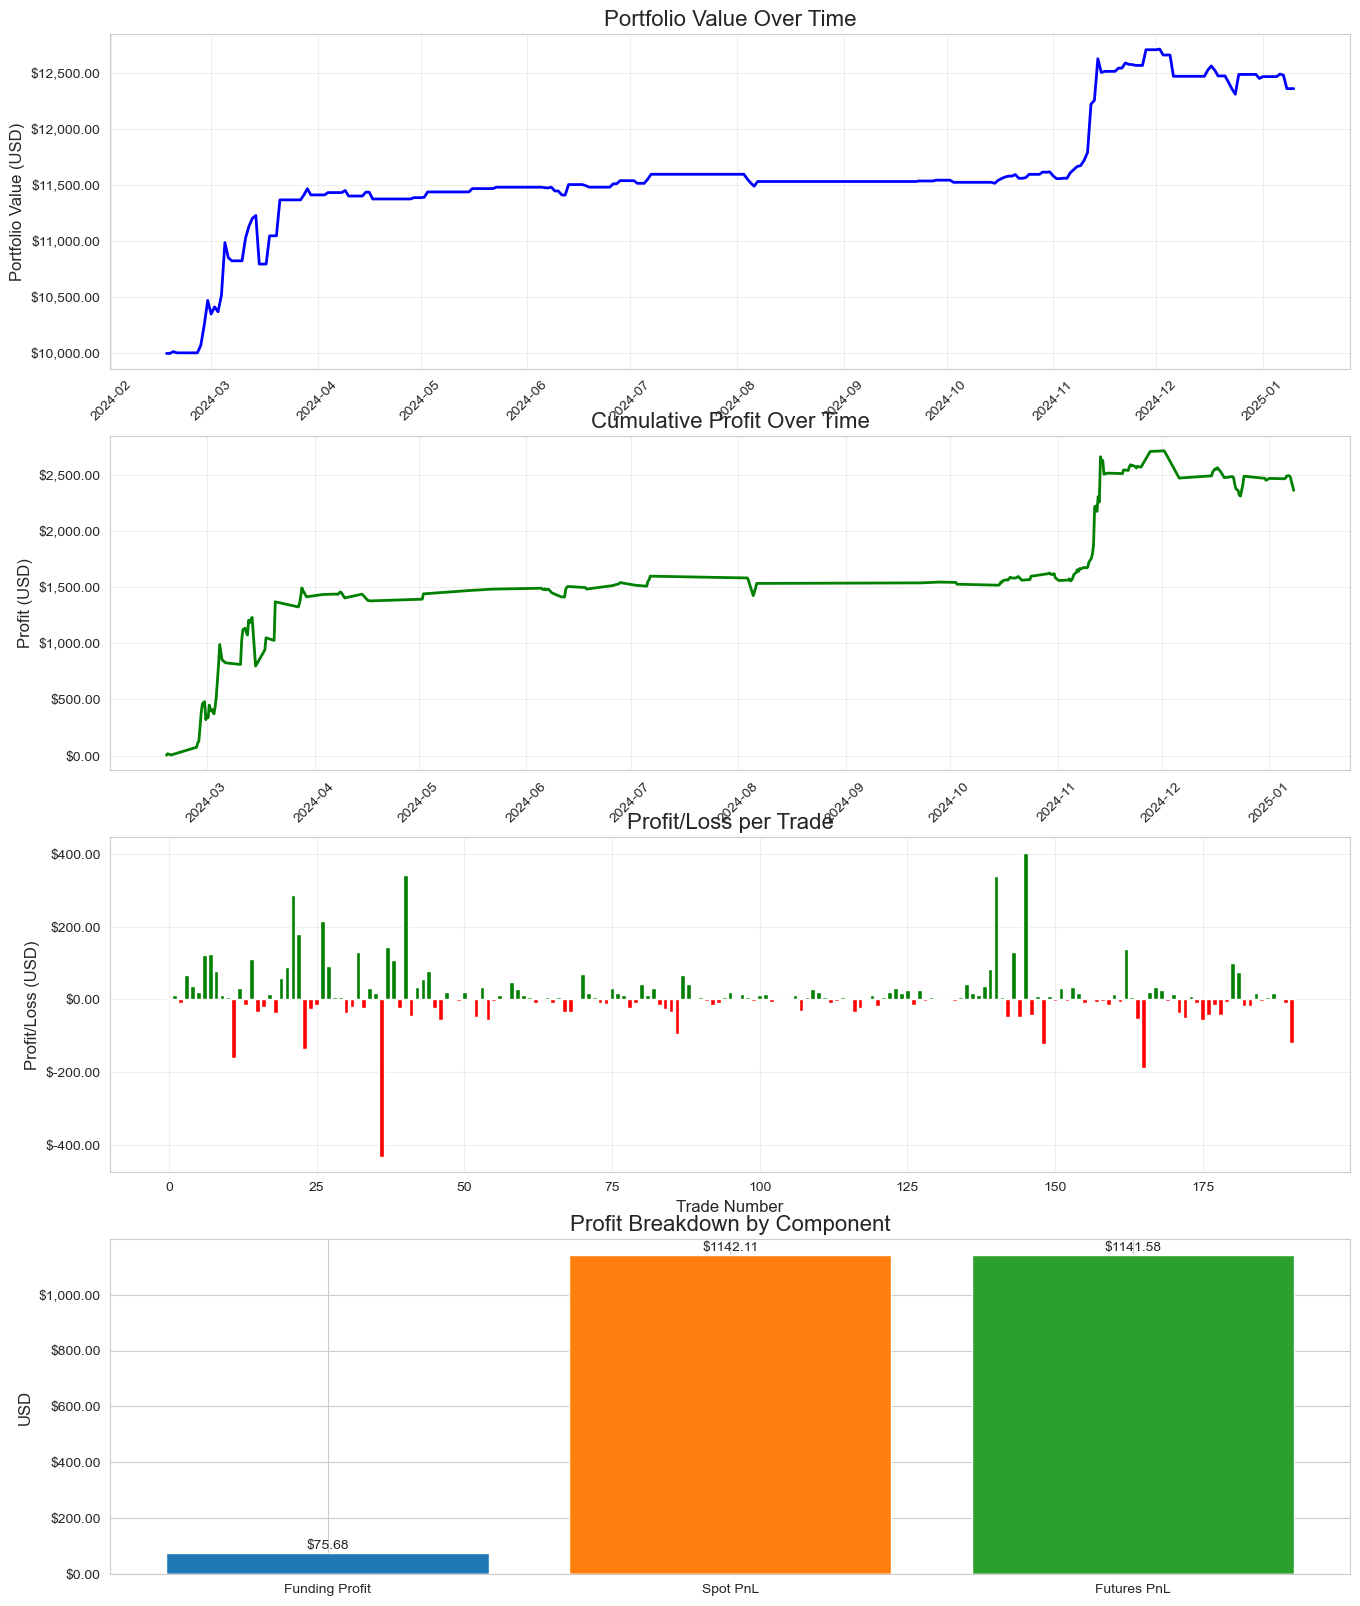

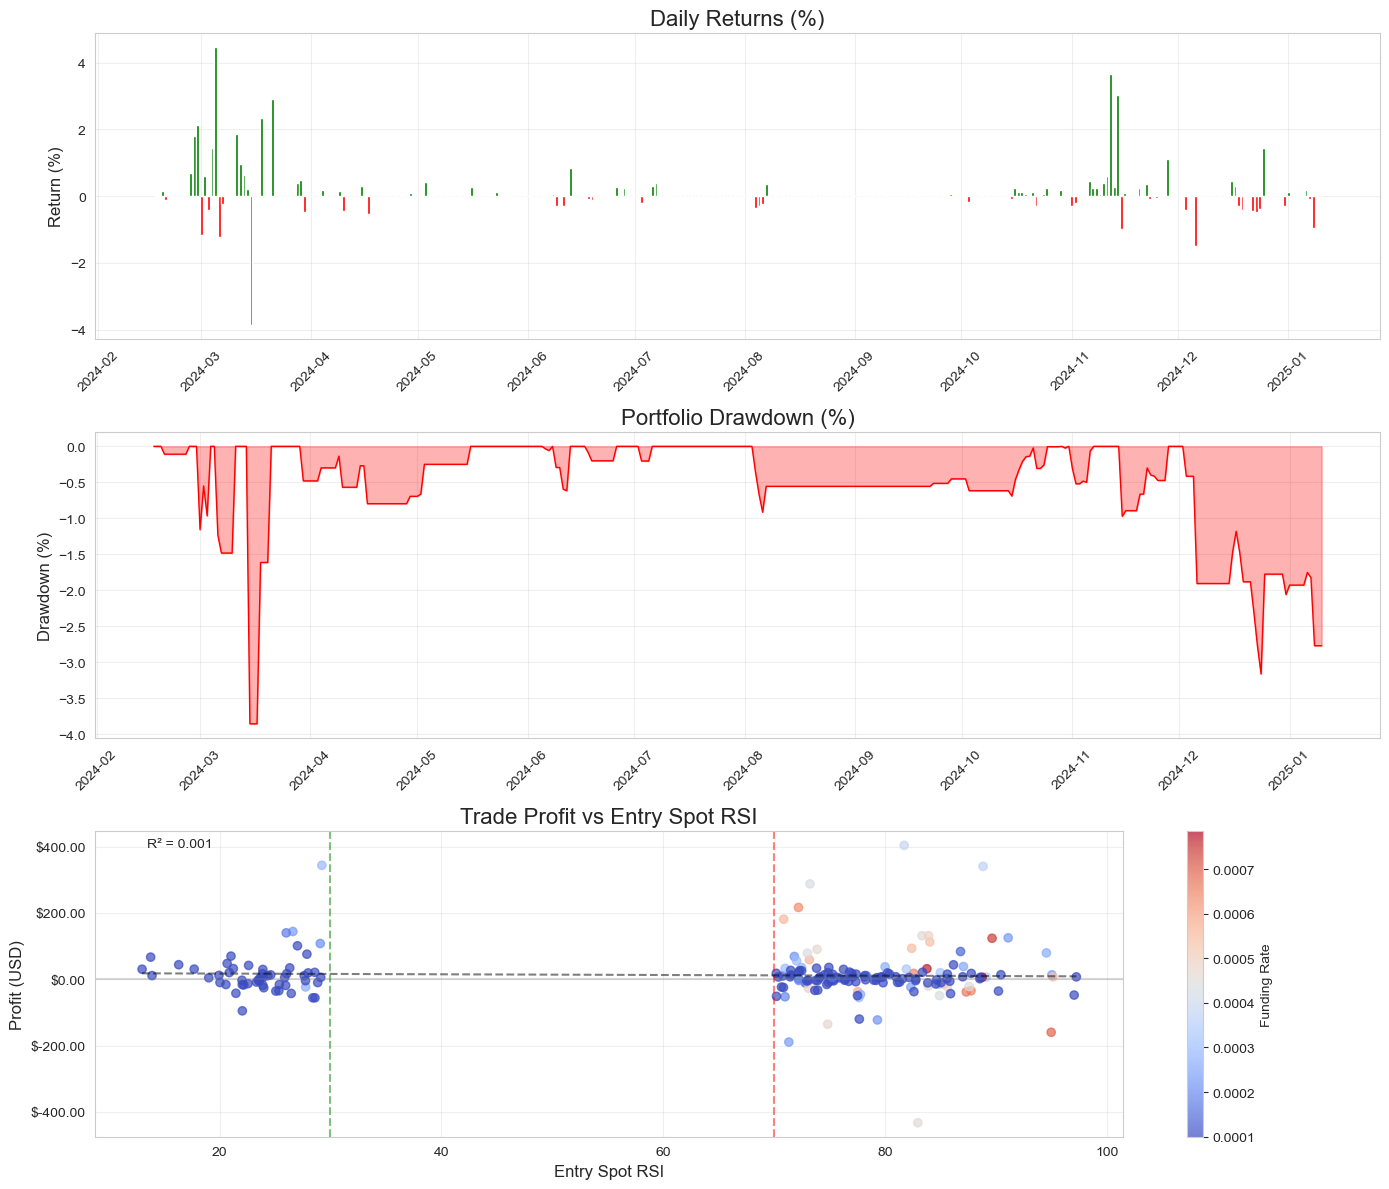

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load our trading results data
# Note: These files should be generated by the original script
results_df = pd.read_csv("dataset/fourth_funding_arbitrage_results.csv")
daily_returns_df = pd.read_csv("daily_returns.csv")

# Convert timestamp to datetime
results_df['timestamp'] = pd.to_datetime(results_df['timestamp'])
daily_returns_df['date'] = pd.to_datetime(daily_returns_df['date'])

# Set the style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 20))

# 1. Portfolio Value Over Time
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot(daily_returns_df['date'], daily_returns_df['balance'], 'b-', linewidth=2)
ax1.set_title('Portfolio Value Over Time', fontsize=16)
ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Cumulative Profit
ax2 = fig.add_subplot(4, 1, 2)
# Calculate cumulative profit from results
results_df = results_df.sort_values('timestamp')
results_df['cumulative_profit'] = results_df['total_profit'].cumsum()
ax2.plot(results_df['timestamp'], results_df['cumulative_profit'], 'g-', linewidth=2)
ax2.set_title('Cumulative Profit Over Time', fontsize=16)
ax2.set_ylabel('Profit (USD)', fontsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Individual Trade Profits
ax3 = fig.add_subplot(4, 1, 3)
ax3.bar(range(len(results_df)), results_df['total_profit'], color=['g' if p > 0 else 'r' for p in results_df['total_profit']])
ax3.set_title('Profit/Loss per Trade', fontsize=16)
ax3.set_xlabel('Trade Number', fontsize=12)
ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
ax3.grid(True, alpha=0.3)

# 4. Profit Breakdown by Component
ax4 = fig.add_subplot(4, 1, 4)
# Calculate total of each profit component
total_funding_profit = results_df['funding_profit'].sum()
total_spot_pnl = results_df['spot_pnl'].sum()
total_futures_pnl = results_df['futures_pnl'].sum()

components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Choose appropriate colors

# Only use positive values for the breakdown visualization
pos_values = [max(0, v) for v in values]
neg_values = [min(0, v) for v in values]

ax4.bar(components, pos_values, color=colors)
ax4.bar(components, neg_values, color=colors)
ax4.set_title('Profit Breakdown by Component', fontsize=16)
ax4.set_ylabel('USD', fontsize=12)
ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))

# Add value labels on the bars
for i, v in enumerate(values):
    ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
             ha='center', va='bottom' if v >= 0 else 'top')

# Add drawdown visualization if we have enough data
if len(daily_returns_df) > 1:
    # Create another figure for drawdown analysis
    fig2 = plt.figure(figsize=(14, 12))
    
    # 1. Daily Returns
    ax5 = fig2.add_subplot(3, 1, 1)
    daily_returns_df['daily_return'].fillna(0, inplace=True)
    ax5.bar(daily_returns_df['date'], daily_returns_df['daily_return'] * 100, 
            color=['g' if r > 0 else 'r' for r in daily_returns_df['daily_return']])
    ax5.set_title('Daily Returns (%)', fontsize=16)
    ax5.set_ylabel('Return (%)', fontsize=12)
    ax5.grid(True, alpha=0.3)
    ax5.tick_params(axis='x', rotation=45)
    
    # 2. Drawdown Analysis
    ax6 = fig2.add_subplot(3, 1, 2)
    # Calculate drawdown
    daily_returns_df['cumulative_return'] = (1 + daily_returns_df['daily_return']).cumprod()
    daily_returns_df['previous_peak'] = daily_returns_df['cumulative_return'].cummax()
    daily_returns_df['drawdown'] = (daily_returns_df['cumulative_return'] / 
                                    daily_returns_df['previous_peak'] - 1) * 100
    
    ax6.fill_between(daily_returns_df['date'], daily_returns_df['drawdown'], 0, 
                    color='r', alpha=0.3)
    ax6.plot(daily_returns_df['date'], daily_returns_df['drawdown'], 'r-', linewidth=1)
    ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
    ax6.set_ylabel('Drawdown (%)', fontsize=12)
    ax6.grid(True, alpha=0.3)
    ax6.tick_params(axis='x', rotation=45)
    
    # 3. RSI vs Profit Analysis
    ax7 = fig2.add_subplot(3, 1, 3)
    scatter = ax7.scatter(results_df['entry_spot_rsi'], results_df['total_profit'], 
                        c=results_df['funding_rate'], cmap='coolwarm', alpha=0.7)
    ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
    ax7.set_xlabel('Entry Spot RSI', fontsize=12)
    ax7.set_ylabel('Profit (USD)', fontsize=12)
    ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)  # Oversold threshold
    ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)    # Overbought threshold
    ax7.grid(True, alpha=0.3)
    ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
    cbar = plt.colorbar(scatter)
    cbar.set_label('Funding Rate')

    # Calculate regression line for RSI vs Profit
    if len(results_df) > 2:  # Need at least 3 points for regression
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            results_df['entry_spot_rsi'], results_df['total_profit'])
        x = np.array([min(results_df['entry_spot_rsi']), max(results_df['entry_spot_rsi'])])
        y = slope * x + intercept
        ax7.plot(x, y, 'k--', alpha=0.5)
        r_squared = r_value ** 2
        ax7.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax7.transAxes)

plt.tight_layout()
plt.savefig('funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')

if 'fig2' in locals():
    fig2.tight_layout()
    plt.figure(fig2.number)
    plt.savefig('graphs/funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')

print("✅ Visualizations created and saved!")
print("- funding_arbitrage_performance.png")
if 'fig2' in locals():
    print("- funding_arbitrage_analysis.png")

# Display in notebook if you're running in one
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.ticker import FuncFormatter
# import time
# import os
# import json
# from datetime import datetime, timedelta
# import ccxt
# import logging
# from talib import RSI

# # Set up logging
# logging.basicConfig(
#     level=logging.INFO,
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
#     handlers=[
#         logging.FileHandler("trading_log.txt"),
#         logging.StreamHandler()
#     ]
# )
# logger = logging.getLogger("funding_arbitrage")

# class BinanceFundingArbitrage:
#     def __init__(self, api_key=None, api_secret=None, testnet=True):
#         self.testnet = testnet
        
#         # Initialize ccxt Binance instance
#         self.exchange = ccxt.binance({
#             'apiKey': api_key,
#             'secret': api_secret,
#             'enableRateLimit': True,
#             'options': {
#                 'defaultType': 'future',  # Default to futures
#                 'adjustForTimeDifference': True,
#                 'testnet': testnet  # Use testnet
#             }
#         })
        
#         # Verify connection
#         try:
#             self.exchange.load_markets()
#             logger.info("Successfully connected to Binance")
#             if self.testnet:
#                 logger.info("TESTNET MODE ENABLED")
#         except Exception as e:
#             logger.error(f"Failed to connect to Binance: {str(e)}")
#             raise
        
#         # Trading parameters
#         self.pairs = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT']  # Trading pairs
#         self.position_size_usd = 1000  # Position size in USD
#         self.min_funding_rate = 0.01 / 100  # Minimum funding rate to trigger a trade (0.01%)
#         self.rsi_period = 14  # RSI period
#         self.rsi_overbought = 70  # RSI overbought threshold
#         self.rsi_oversold = 30  # RSI oversold threshold
        
#         # Initialize results dataframes
#         self.results_df = pd.DataFrame(columns=[
#             'timestamp', 'pair', 'funding_rate', 'entry_spot_rsi', 
#             'entry_spot_price', 'entry_futures_price', 'exit_spot_price', 
#             'exit_futures_price', 'position_size', 'funding_profit', 
#             'spot_pnl', 'futures_pnl', 'total_profit', 'trade_duration'
#         ])
        
#         self.daily_returns_df = pd.DataFrame(columns=[
#             'date', 'balance', 'daily_return'
#         ])
        
#         # Get initial balance
#         self.initial_balance = self.get_total_balance()
#         self.current_balance = self.initial_balance
        
#         # Record initial balance
#         today = datetime.now().strftime('%Y-%m-%d')
#         self.daily_returns_df = self.daily_returns_df.append({
#             'date': today,
#             'balance': self.initial_balance,
#             'daily_return': 0.0
#         }, ignore_index=True)
        
#         logger.info(f"Initial balance: ${self.initial_balance:.2f}")
    
#     def get_total_balance(self):
#         """Get total balance across spot and futures accounts"""
#         total = 0
        
#         try:
#             # Get spot balance
#             self.exchange.options['defaultType'] = 'spot'
#             spot_balance = self.exchange.fetch_balance()
#             usdt_spot = float(spot_balance.get('total', {}).get('USDT', 0))
            
#             # Get futures balance
#             self.exchange.options['defaultType'] = 'future'
#             futures_balance = self.exchange.fetch_balance()
#             usdt_futures = float(futures_balance.get('total', {}).get('USDT', 0))
            
#             total = usdt_spot + usdt_futures
            
#         except Exception as e:
#             logger.error(f"Error fetching balance: {str(e)}")
        
#         return total
    
#     def get_funding_rates(self):
#         """Get current funding rates for all trading pairs"""
#         funding_rates = {}
        
#         try:
#             self.exchange.options['defaultType'] = 'future'
#             for pair in self.pairs:
#                 ticker = self.exchange.fetch_ticker(pair)
                
#                 # Some exchanges give funding rate directly
#                 if 'fundingRate' in ticker:
#                     funding_rate = ticker['fundingRate']
#                 else:
#                     # Alternatively, fetch it from funding rate endpoint
#                     funding_info = self.exchange.fetch_funding_rate(pair)
#                     funding_rate = funding_info['fundingRate']
                
#                 funding_rates[pair] = funding_rate
#                 logger.info(f"Funding rate for {pair}: {funding_rate*100:.6f}%")
        
#         except Exception as e:
#             logger.error(f"Error fetching funding rates: {str(e)}")
        
#         return funding_rates
    
#     def calculate_rsi(self, pair, timeframe='1h', limit=100):
#         """Calculate RSI for a given pair"""
#         try:
#             self.exchange.options['defaultType'] = 'spot'
#             ohlcv = self.exchange.fetch_ohlcv(pair, timeframe=timeframe, limit=limit)
            
#             # Convert to DataFrame
#             df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            
#             # Calculate RSI
#             closes = df['close'].values
#             rsi = RSI(closes, timeperiod=self.rsi_period)
            
#             # Return the latest RSI value
#             current_rsi = rsi[-1]
#             logger.info(f"Current RSI for {pair}: {current_rsi:.2f}")
#             return current_rsi
            
#         except Exception as e:
#             logger.error(f"Error calculating RSI: {str(e)}")
#             return 50  # Return neutral RSI if calculation fails
    
#     def place_order(self, pair, side, amount, order_type='market', price=None, params={}):
#         """Place an order on Binance"""
#         try:
#             result = self.exchange.create_order(
#                 symbol=pair,
#                 type=order_type,
#                 side=side,
#                 amount=amount,
#                 price=price,
#                 params=params
#             )
#             logger.info(f"Order placed: {side} {amount} {pair}")
#             return result
#         except Exception as e:
#             logger.error(f"Error placing order: {str(e)}")
#             return None
    
#     def execute_funding_arbitrage(self, pair, funding_rate):
#         """
#         Execute a funding arbitrage trade:
#         1. Long spot
#         2. Short futures
#         3. Collect funding payments
#         4. Close positions when profitable or max holding period reached
#         """
#         logger.info(f"Starting funding arbitrage for {pair} with funding rate {funding_rate*100:.6f}%")
        
#         try:
#             # Calculate position sizes
#             self.exchange.options['defaultType'] = 'spot'
#             spot_ticker = self.exchange.fetch_ticker(pair)
#             spot_price = spot_ticker['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             futures_ticker = self.exchange.fetch_ticker(pair)
#             futures_price = futures_ticker['last']
            
#             # Calculate quantity based on USD position size
#             base_currency = pair.split('/')[0]
#             quantity = self.position_size_usd / spot_price
            
#             # Get precision requirements
#             market = self.exchange.market(pair)
#             amount_precision = market['precision']['amount']
#             # Round to the required precision
#             quantity = round(quantity, amount_precision)
            
#             # Calculate RSI
#             current_rsi = self.calculate_rsi(pair)
            
#             # Check if RSI is in acceptable range
#             rsi_check = (current_rsi > self.rsi_oversold and current_rsi < self.rsi_overbought) or \
#                         (funding_rate > 0 and current_rsi < self.rsi_overbought) or \
#                         (funding_rate < 0 and current_rsi > self.rsi_oversold)
            
#             if not rsi_check:
#                 logger.info(f"RSI check failed: RSI = {current_rsi}, skipping trade")
#                 return None
            
#             # Record entry time
#             entry_time = datetime.now()
            
#             # Step 1: Buy spot
#             self.exchange.options['defaultType'] = 'spot'
#             spot_order = self.place_order(pair, 'buy', quantity)
            
#             if not spot_order:
#                 logger.error(f"Failed to place spot order, aborting arbitrage")
#                 return None
            
#             # Step 2: Short futures
#             self.exchange.options['defaultType'] = 'future'
#             futures_order = self.place_order(pair, 'sell', quantity)
            
#             if not futures_order:
#                 # Try to close the spot position if futures order fails
#                 logger.error(f"Failed to place futures order, closing spot position")
#                 self.exchange.options['defaultType'] = 'spot'
#                 self.place_order(pair, 'sell', quantity)
#                 return None
            
#             logger.info(f"Successfully opened positions: Long spot and short futures for {pair}")
            
#             # Record the trade
#             trade_info = {
#                 'timestamp': entry_time,
#                 'pair': pair,
#                 'funding_rate': funding_rate,
#                 'entry_spot_rsi': current_rsi,
#                 'entry_spot_price': spot_price,
#                 'entry_futures_price': futures_price,
#                 'position_size': self.position_size_usd,
#                 'exit_spot_price': None,
#                 'exit_futures_price': None,
#                 'funding_profit': None,
#                 'spot_pnl': None,
#                 'futures_pnl': None,
#                 'total_profit': None,
#                 'trade_duration': None
#             }
            
#             # Sleep to simulate holding the position (8 hours)
#             # In a real implementation, you would monitor and close when appropriate
#             logger.info(f"Simulating holding the position for 1 minute... (in real trading this would be longer)")
#             time.sleep(60)  # 1 minute for testing purposes
            
#             # Get exit prices
#             self.exchange.options['defaultType'] = 'spot'
#             exit_spot_price = self.exchange.fetch_ticker(pair)['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             exit_futures_price = self.exchange.fetch_ticker(pair)['last']
            
#             # Step 3: Close positions
#             self.exchange.options['defaultType'] = 'spot'
#             self.place_order(pair, 'sell', quantity)
            
#             self.exchange.options['defaultType'] = 'future'
#             self.place_order(pair, 'buy', quantity)
            
#             # Calculate profit
#             exit_time = datetime.now()
#             duration = (exit_time - entry_time).total_seconds() / 3600  # in hours
            
#             # In real trading, funding payments would be collected during the holding period
#             # For testnet simulation, we'll calculate estimated funding
#             funding_cycles = duration / 8  # Funding every 8 hours
#             funding_profit = funding_rate * self.position_size_usd * funding_cycles
            
#             # Calculate P&L
#             spot_pnl = (exit_spot_price - spot_price) / spot_price * self.position_size_usd
#             futures_pnl = (futures_price - exit_futures_price) / futures_price * self.position_size_usd
#             total_profit = funding_profit + spot_pnl + futures_pnl
            
#             # Update trade record
#             trade_info.update({
#                 'exit_spot_price': exit_spot_price,
#                 'exit_futures_price': exit_futures_price,
#                 'funding_profit': funding_profit,
#                 'spot_pnl': spot_pnl,
#                 'futures_pnl': futures_pnl,
#                 'total_profit': total_profit,
#                 'trade_duration': duration
#             })
            
#             # Append to results
#             self.results_df = self.results_df.append(trade_info, ignore_index=True)
            
#             # Update balance
#             self.current_balance += total_profit
            
#             # Log trade results
#             logger.info(f"Trade completed for {pair}")
#             logger.info(f"Funding profit: ${funding_profit:.2f}")
#             logger.info(f"Spot P&L: ${spot_pnl:.2f}")
#             logger.info(f"Futures P&L: ${futures_pnl:.2f}")
#             logger.info(f"Total profit: ${total_profit:.2f}")
#             logger.info(f"Current balance: ${self.current_balance:.2f}")
            
#             # Save results
#             self.save_results()
            
#             return trade_info
            
#         except Exception as e:
#             logger.error(f"Error executing funding arbitrage: {str(e)}")
#             return None
    
#     def update_daily_returns(self):
#         """Update daily returns record"""
#         try:
#             today = datetime.now().strftime('%Y-%m-%d')
            
#             # Check if we already have an entry for today
#             if today in self.daily_returns_df['date'].astype(str).values:
#                 # Update existing entry
#                 idx = self.daily_returns_df[self.daily_returns_df['date'].astype(str) == today].index[0]
#                 prev_balance = self.daily_returns_df.iloc[idx-1]['balance'] if idx > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 self.daily_returns_df.at[idx, 'balance'] = self.current_balance
#                 self.daily_returns_df.at[idx, 'daily_return'] = daily_return
#             else:
#                 # Get previous day's balance
#                 prev_balance = self.daily_returns_df['balance'].iloc[-1] if len(self.daily_returns_df) > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 # Add new entry
#                 self.daily_returns_df = self.daily_returns_df.append({
#                     'date': today,
#                     'balance': self.current_balance,
#                     'daily_return': daily_return
#                 }, ignore_index=True)
            
#             logger.info(f"Updated daily returns for {today}")
            
#         except Exception as e:
#             logger.error(f"Error updating daily returns: {str(e)}")
    
#     def save_results(self):
#         """Save trading results to CSV files"""
#         try:
#             self.results_df.to_csv("dataset/fifth_funding_arbitrage_results.csv", index=False)
#             self.daily_returns_df.to_csv("dataset/fifth_daily_returns.csv", index=False)
#             logger.info("Results saved to CSV files")
#         except Exception as e:
#             logger.error(f"Error saving results: {str(e)}")
    
#     def generate_visualizations(self):
#         """Generate visualizations from the results"""
#         try:
#             # Set the style
#             sns.set_style("whitegrid")
#             plt.rcParams["figure.figsize"] = (14, 8)

#             # Create a figure with multiple subplots
#             fig = plt.figure(figsize=(16, 20))

#             # 1. Portfolio Value Over Time
#             ax1 = fig.add_subplot(4, 1, 1)
#             ax1.plot(pd.to_datetime(self.daily_returns_df['date']), self.daily_returns_df['balance'], 'b-', linewidth=2)
#             ax1.set_title('Portfolio Value Over Time', fontsize=16)
#             ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
#             ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax1.grid(True, alpha=0.3)
#             ax1.tick_params(axis='x', rotation=45)

#             # 2. Cumulative Profit
#             ax2 = fig.add_subplot(4, 1, 2)
#             # Calculate cumulative profit from results
#             if len(self.results_df) > 0:
#                 results_sorted = self.results_df.sort_values('timestamp')
#                 results_sorted['cumulative_profit'] = results_sorted['total_profit'].cumsum()
#                 ax2.plot(pd.to_datetime(results_sorted['timestamp']), results_sorted['cumulative_profit'], 'g-', linewidth=2)
#             ax2.set_title('Cumulative Profit Over Time', fontsize=16)
#             ax2.set_ylabel('Profit (USD)', fontsize=12)
#             ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax2.grid(True, alpha=0.3)
#             ax2.tick_params(axis='x', rotation=45)

#             # 3. Individual Trade Profits
#             ax3 = fig.add_subplot(4, 1, 3)
#             if len(self.results_df) > 0:
#                 ax3.bar(range(len(self.results_df)), self.results_df['total_profit'], 
#                         color=['g' if p > 0 else 'r' for p in self.results_df['total_profit']])
#             ax3.set_title('Profit/Loss per Trade', fontsize=16)
#             ax3.set_xlabel('Trade Number', fontsize=12)
#             ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
#             ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax3.grid(True, alpha=0.3)

#             # 4. Profit Breakdown by Component
#             ax4 = fig.add_subplot(4, 1, 4)
#             if len(self.results_df) > 0:
#                 # Calculate total of each profit component
#                 total_funding_profit = self.results_df['funding_profit'].sum()
#                 total_spot_pnl = self.results_df['spot_pnl'].sum()
#                 total_futures_pnl = self.results_df['futures_pnl'].sum()

#                 components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
#                 values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
#                 colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

#                 # Only use positive values for the breakdown visualization
#                 pos_values = [max(0, v) for v in values]
#                 neg_values = [min(0, v) for v in values]

#                 ax4.bar(components, pos_values, color=colors)
#                 ax4.bar(components, neg_values, color=colors)
                
#                 # Add value labels on the bars
#                 for i, v in enumerate(values):
#                     ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
#                             ha='center', va='bottom' if v >= 0 else 'top')
            
#             ax4.set_title('Profit Breakdown by Component', fontsize=16)
#             ax4.set_ylabel('USD', fontsize=12)
#             ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))

#             # Add drawdown visualization if we have enough data
#             fig2 = None
#             if len(self.daily_returns_df) > 1:
#                 # Create another figure for drawdown analysis
#                 fig2 = plt.figure(figsize=(14, 12))
                
#                 # 1. Daily Returns
#                 ax5 = fig2.add_subplot(3, 1, 1)
#                 self.daily_returns_df['daily_return'].fillna(0, inplace=True)
#                 ax5.bar(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['daily_return'] * 100, 
#                         color=['g' if r > 0 else 'r' for r in self.daily_returns_df['daily_return']])
#                 ax5.set_title('Daily Returns (%)', fontsize=16)
#                 ax5.set_ylabel('Return (%)', fontsize=12)
#                 ax5.grid(True, alpha=0.3)
#                 ax5.tick_params(axis='x', rotation=45)
                
#                 # 2. Drawdown Analysis
#                 ax6 = fig2.add_subplot(3, 1, 2)
#                 # Calculate drawdown
#                 self.daily_returns_df['cumulative_return'] = (1 + self.daily_returns_df['daily_return']).cumprod()
#                 self.daily_returns_df['previous_peak'] = self.daily_returns_df['cumulative_return'].cummax()
#                 self.daily_returns_df['drawdown'] = (self.daily_returns_df['cumulative_return'] / 
#                                                     self.daily_returns_df['previous_peak'] - 1) * 100
                
#                 ax6.fill_between(pd.to_datetime(self.daily_returns_df['date']), 
#                                 self.daily_returns_df['drawdown'], 0, 
#                                 color='r', alpha=0.3)
#                 ax6.plot(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['drawdown'], 'r-', linewidth=1)
#                 ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
#                 ax6.set_ylabel('Drawdown (%)', fontsize=12)
#                 ax6.grid(True, alpha=0.3)
#                 ax6.tick_params(axis='x', rotation=45)
                
#                 # 3. RSI vs Profit Analysis
#                 if len(self.results_df) > 0:
#                     ax7 = fig2.add_subplot(3, 1, 3)
#                     scatter = ax7.scatter(self.results_df['entry_spot_rsi'], 
#                                         self.results_df['total_profit'], 
#                                         c=self.results_df['funding_rate'], 
#                                         cmap='coolwarm', alpha=0.7)
#                     ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
#                     ax7.set_xlabel('Entry Spot RSI', fontsize=12)
#                     ax7.set_ylabel('Profit (USD)', fontsize=12)
#                     ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
#                     ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)  # Oversold threshold
#                     ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)    # Overbought threshold
#                     ax7.grid(True, alpha=0.3)
#                     ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#                     cbar = plt.colorbar(scatter)
#                     cbar.set_label('Funding Rate')

#                     # Calculate regression line for RSI vs Profit
#                     if len(self.results_df) > 2:  # Need at least 3 points for regression
#                         from scipy import stats
#                         slope, intercept, r_value, p_value, std_err = stats.linregress(
#                             self.results_df['entry_spot_rsi'], self.results_df['total_profit'])
#                         x = np.array([min(self.results_df['entry_spot_rsi']), 
#                                     max(self.results_df['entry_spot_rsi'])])
#                         y = slope * x + intercept
#                         ax7.plot(x, y, 'k--', alpha=0.5)
#                         r_squared = r_value ** 2
#                         ax7.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax7.transAxes)

#             plt.tight_layout()
#             plt.savefig('fifth_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
#             plt.savefig('fifth_funding_arbitrage_performance.pdf', bbox_inches='tight')

#             if fig2:
#                 fig2.tight_layout()
#                 plt.figure(fig2.number)
#                 plt.savefig('fifth_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
#                 plt.savefig('fifth_funding_arbitrage_analysis.pdf', bbox_inches='tight')

#             logger.info("✅ Visualizations created and saved!")
#             logger.info("- fifth_funding_arbitrage_performance.png/pdf")
#             if fig2:
#                 logger.info("- fifth_funding_arbitrage_analysis.png/pdf")
            
#             return True
            
#         except Exception as e:
#             logger.error(f"Error generating visualizations: {str(e)}")
#             return False
    
#     def scan_for_opportunities(self):
#         """Scan for funding arbitrage opportunities"""
#         logger.info("Scanning for funding arbitrage opportunities...")
        
#         # Get funding rates
#         funding_rates = self.get_funding_rates()
        
#         # Check for opportunities
#         opportunities = []
#         for pair, rate in funding_rates.items():
#             if abs(rate) >= self.min_funding_rate:
#                 opportunities.append((pair, rate))
        
#         if not opportunities:
#             logger.info("No arbitrage opportunities found")
#             return []
        
#         # Sort by absolute funding rate (highest first)
#         opportunities.sort(key=lambda x: abs(x[1]), reverse=True)
        
#         logger.info(f"Found {len(opportunities)} arbitrage opportunities")
#         for pair, rate in opportunities:
#             logger.info(f"{pair}: {rate*100:.6f}%")
        
#         return opportunities
    
#     def run_trading_cycle(self):
#         """Run one trading cycle"""
#         logger.info("Starting trading cycle")
        
#         # Scan for opportunities
#         opportunities = self.scan_for_opportunities()
        
#         # Execute trades for the best opportunities
#         executed_trades = []
#         for pair, rate in opportunities[:2]:  # Limit to top 2 opportunities
#             trade = self.execute_funding_arbitrage(pair, rate)
#             if trade:
#                 executed_trades.append(trade)
        
#         # Update daily returns
#         self.update_daily_returns()
        
#         # Generate visualizations
#         self.generate_visualizations()
        
#         logger.info(f"Trading cycle completed. Executed {len(executed_trades)} trades.")
#         return executed_trades
    
#     def run_trading_bot(self, cycles=5, interval=300):
#         """
#         Run the trading bot for a specified number of cycles
        
#         Args:
#             cycles: Number of trading cycles to run
#             interval: Time interval between cycles in seconds
#         """
#         logger.info(f"Starting trading bot for {cycles} cycles with {interval}s interval")
        
#         for i in range(cycles):
#             logger.info(f"Trading cycle {i+1}/{cycles}")
            
#             try:
#                 self.run_trading_cycle()
#             except Exception as e:
#                 logger.error(f"Error in trading cycle {i+1}: {str(e)}")
            
#             if i < cycles - 1:
#                 logger.info(f"Waiting {interval}s until next cycle...")
#                 time.sleep(interval)
        
#         logger.info("Trading bot completed all cycles")
#         logger.info(f"Final balance: ${self.current_balance:.2f}")
#         logger.info(f"Total profit: ${self.current_balance - self.initial_balance:.2f}")
        
#         return {
#             'initial_balance': self.initial_balance,
#             'final_balance': self.current_balance,
#             'total_profit': self.current_balance - self.initial_balance,
#             'total_trades': len(self.results_df),
#             'profitable_trades': len(self.results_df[self.results_df['total_profit'] > 0]),
#             'losing_trades': len(self.results_df[self.results_df['total_profit'] <= 0])
#         }

# # Main execution
# if __name__ == "__main__":
#     # Get API keys from environment variables or user input
#     api_key = os.environ.get("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#     api_secret = os.environ.get("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     if not api_key or not api_secret:
#         print("API keys not found in environment variables.")
#         api_key = input("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#         api_secret = input("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     # Create the trading bot
#     bot = BinanceFundingArbitrage(api_key=api_key, api_secret=api_secret, testnet=True)
    
#     # Run the bot for 5 cycles with 5 minute intervals
#     results = bot.run_trading_bot(cycles=5, interval=300)
    
#     # Print summary
#     print("\n=== Trading Bot Summary ===")
#     print(f"Initial Balance: ${results['initial_balance']:.2f}")
#     print(f"Final Balance: ${results['final_balance']:.2f}")
#     print(f"Total Profit: ${results['total_profit']:.2f}")
#     print(f"Total Trades: {results['total_trades']}")
#     print(f"Profitable Trades: {results['profitable_trades']}")
#     print(f"Losing Trades: {results['losing_trades']}")
#     print("==========================\n")
    
#     # Generate final visualizations
#     bot.generate_visualizations()

API keys not found in environment variables.


2025-02-27 21:55:27,703 - funding_arbitrage - INFO - Successfully connected to Binance
2025-02-27 21:55:27,703 - funding_arbitrage - INFO - TESTNET MODE ENABLED
2025-02-27 21:55:27,704 - funding_arbitrage - ERROR - Error fetching balance: binance requires "apiKey" credential


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.ticker import FuncFormatter
# import time
# import os
# import json
# from datetime import datetime, timedelta
# import ccxt
# import logging
# from talib import RSI

# # Set up logging
# logging.basicConfig(
#     level=logging.INFO,
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
#     handlers=[
#         logging.FileHandler("trading_log.txt"),
#         logging.StreamHandler()
#     ]
# )
# logger = logging.getLogger("funding_arbitrage")

# class BinanceFundingArbitrage:
#     def __init__(self, api_key=None, api_secret=None, testnet=True):
#         self.testnet = testnet
        
#         # Initialize ccxt Binance instance
#         self.exchange = ccxt.binance({
#             'apiKey': api_key,
#             'secret': api_secret,
#             'enableRateLimit': True,
#             'options': {
#                 'defaultType': 'future',  # Default to futures
#                 'adjustForTimeDifference': True,
#                 'testnet': testnet  # Use testnet
#             }
#         })
        
#         # Verify connection
#         try:
#             self.exchange.load_markets()
#             logger.info("Successfully connected to Binance")
#             if self.testnet:
#                 logger.info("TESTNET MODE ENABLED")
#         except Exception as e:
#             logger.error(f"Failed to connect to Binance: {str(e)}")
#             raise
        
#         # Trading parameters
#         self.pairs = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT']  # Trading pairs
#         self.position_size_usd = 1000  # Position size in USD
#         self.min_funding_rate = 0.01 / 100  # Minimum funding rate to trigger a trade (0.01%)
#         self.rsi_period = 14  # RSI period
#         self.rsi_overbought = 70  # RSI overbought threshold
#         self.rsi_oversold = 30  # RSI oversold threshold
        
#         # Initialize results dataframes
#         self.results_df = pd.DataFrame(columns=[
#             'timestamp', 'pair', 'funding_rate', 'entry_spot_rsi', 
#             'entry_spot_price', 'entry_futures_price', 'exit_spot_price', 
#             'exit_futures_price', 'position_size', 'funding_profit', 
#             'spot_pnl', 'futures_pnl', 'total_profit', 'trade_duration'
#         ])
        
#         self.daily_returns_df = pd.DataFrame(columns=[
#             'date', 'balance', 'daily_return'
#         ])
        
#         # Get initial balance
#         self.initial_balance = self.get_total_balance()
#         self.current_balance = self.initial_balance
        
#         # Record initial balance
#         today = datetime.now().strftime('%Y-%m-%d')
#         self.daily_returns_df = self.daily_returns_df.append({
#             'date': today,
#             'balance': self.initial_balance,
#             'daily_return': 0.0
#         }, ignore_index=True)
        
#         logger.info(f"Initial balance: ${self.initial_balance:.2f}")
    
#     def get_total_balance(self):
#         """Get total balance across spot and futures accounts"""
#         total = 0
        
#         try:
#             # Get spot balance
#             self.exchange.options['defaultType'] = 'spot'
#             spot_balance = self.exchange.fetch_balance()
#             usdt_spot = float(spot_balance.get('total', {}).get('USDT', 0))
            
#             # Get futures balance
#             self.exchange.options['defaultType'] = 'future'
#             futures_balance = self.exchange.fetch_balance()
#             usdt_futures = float(futures_balance.get('total', {}).get('USDT', 0))
            
#             total = usdt_spot + usdt_futures
            
#         except Exception as e:
#             logger.error(f"Error fetching balance: {str(e)}")
        
#         return total
    
#     def get_funding_rates(self):
#         """Get current funding rates for all trading pairs"""
#         funding_rates = {}
        
#         try:
#             self.exchange.options['defaultType'] = 'future'
#             for pair in self.pairs:
#                 ticker = self.exchange.fetch_ticker(pair)
                
#                 # Some exchanges give funding rate directly
#                 if 'fundingRate' in ticker:
#                     funding_rate = ticker['fundingRate']
#                 else:
#                     # Alternatively, fetch it from funding rate endpoint
#                     funding_info = self.exchange.fetch_funding_rate(pair)
#                     funding_rate = funding_info['fundingRate']
                
#                 funding_rates[pair] = funding_rate
#                 logger.info(f"Funding rate for {pair}: {funding_rate*100:.6f}%")
        
#         except Exception as e:
#             logger.error(f"Error fetching funding rates: {str(e)}")
        
#         return funding_rates
    
#     def calculate_rsi(self, pair, timeframe='1h', limit=100):
#         """Calculate RSI for a given pair"""
#         try:
#             self.exchange.options['defaultType'] = 'spot'
#             ohlcv = self.exchange.fetch_ohlcv(pair, timeframe=timeframe, limit=limit)
            
#             # Convert to DataFrame
#             df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            
#             # Calculate RSI
#             closes = df['close'].values
#             rsi = RSI(closes, timeperiod=self.rsi_period)
            
#             # Return the latest RSI value
#             current_rsi = rsi[-1]
#             logger.info(f"Current RSI for {pair}: {current_rsi:.2f}")
#             return current_rsi
            
#         except Exception as e:
#             logger.error(f"Error calculating RSI: {str(e)}")
#             return 50  # Return neutral RSI if calculation fails
    
#     def place_order(self, pair, side, amount, order_type='market', price=None, params={}):
#         """Place an order on Binance"""
#         try:
#             result = self.exchange.create_order(
#                 symbol=pair,
#                 type=order_type,
#                 side=side,
#                 amount=amount,
#                 price=price,
#                 params=params
#             )
#             logger.info(f"Order placed: {side} {amount} {pair}")
#             return result
#         except Exception as e:
#             logger.error(f"Error placing order: {str(e)}")
#             return None
    
#     def execute_funding_arbitrage(self, pair, funding_rate):
#         """
#         Execute a funding arbitrage trade:
#         1. Long spot
#         2. Short futures
#         3. Collect funding payments
#         4. Close positions when profitable or max holding period reached
#         """
#         logger.info(f"Starting funding arbitrage for {pair} with funding rate {funding_rate*100:.6f}%")
        
#         try:
#             # Calculate position sizes
#             self.exchange.options['defaultType'] = 'spot'
#             spot_ticker = self.exchange.fetch_ticker(pair)
#             spot_price = spot_ticker['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             futures_ticker = self.exchange.fetch_ticker(pair)
#             futures_price = futures_ticker['last']
            
#             # Calculate quantity based on USD position size
#             base_currency = pair.split('/')[0]
#             quantity = self.position_size_usd / spot_price
            
#             # Get precision requirements
#             market = self.exchange.market(pair)
#             amount_precision = market['precision']['amount']
#             # Round to the required precision
#             quantity = round(quantity, amount_precision)
            
#             # Calculate RSI
#             current_rsi = self.calculate_rsi(pair)
            
#             # Check if RSI is in acceptable range
#             rsi_check = (current_rsi > self.rsi_oversold and current_rsi < self.rsi_overbought) or \
#                         (funding_rate > 0 and current_rsi < self.rsi_overbought) or \
#                         (funding_rate < 0 and current_rsi > self.rsi_oversold)
            
#             if not rsi_check:
#                 logger.info(f"RSI check failed: RSI = {current_rsi}, skipping trade")
#                 return None
            
#             # Record entry time
#             entry_time = datetime.now()
            
#             # Step 1: Buy spot
#             self.exchange.options['defaultType'] = 'spot'
#             spot_order = self.place_order(pair, 'buy', quantity)
            
#             if not spot_order:
#                 logger.error(f"Failed to place spot order, aborting arbitrage")
#                 return None
            
#             # Step 2: Short futures
#             self.exchange.options['defaultType'] = 'future'
#             futures_order = self.place_order(pair, 'sell', quantity)
            
#             if not futures_order:
#                 # Try to close the spot position if futures order fails
#                 logger.error(f"Failed to place futures order, closing spot position")
#                 self.exchange.options['defaultType'] = 'spot'
#                 self.place_order(pair, 'sell', quantity)
#                 return None
            
#             logger.info(f"Successfully opened positions: Long spot and short futures for {pair}")
            
#             # Record the trade
#             trade_info = {
#                 'timestamp': entry_time,
#                 'pair': pair,
#                 'funding_rate': funding_rate,
#                 'entry_spot_rsi': current_rsi,
#                 'entry_spot_price': spot_price,
#                 'entry_futures_price': futures_price,
#                 'position_size': self.position_size_usd,
#                 'exit_spot_price': None,
#                 'exit_futures_price': None,
#                 'funding_profit': None,
#                 'spot_pnl': None,
#                 'futures_pnl': None,
#                 'total_profit': None,
#                 'trade_duration': None
#             }
            
#             # Sleep to simulate holding the position (8 hours)
#             # In a real implementation, you would monitor and close when appropriate
#             logger.info(f"Simulating holding the position for 1 minute... (in real trading this would be longer)")
#             time.sleep(60)  # 1 minute for testing purposes
            
#             # Get exit prices
#             self.exchange.options['defaultType'] = 'spot'
#             exit_spot_price = self.exchange.fetch_ticker(pair)['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             exit_futures_price = self.exchange.fetch_ticker(pair)['last']
            
#             # Step 3: Close positions
#             self.exchange.options['defaultType'] = 'spot'
#             self.place_order(pair, 'sell', quantity)
            
#             self.exchange.options['defaultType'] = 'future'
#             self.place_order(pair, 'buy', quantity)
            
#             # Calculate profit
#             exit_time = datetime.now()
#             duration = (exit_time - entry_time).total_seconds() / 3600  # in hours
            
#             # In real trading, funding payments would be collected during the holding period
#             # For testnet simulation, we'll calculate estimated funding
#             funding_cycles = duration / 8  # Funding every 8 hours
#             funding_profit = funding_rate * self.position_size_usd * funding_cycles
            
#             # Calculate P&L
#             spot_pnl = (exit_spot_price - spot_price) / spot_price * self.position_size_usd
#             futures_pnl = (futures_price - exit_futures_price) / futures_price * self.position_size_usd
#             total_profit = funding_profit + spot_pnl + futures_pnl
            
#             # Update trade record
#             trade_info.update({
#                 'exit_spot_price': exit_spot_price,
#                 'exit_futures_price': exit_futures_price,
#                 'funding_profit': funding_profit,
#                 'spot_pnl': spot_pnl,
#                 'futures_pnl': futures_pnl,
#                 'total_profit': total_profit,
#                 'trade_duration': duration
#             })
            
#             # Append to results
#             self.results_df = self.results_df.append(trade_info, ignore_index=True)
            
#             # Update balance
#             self.current_balance += total_profit
            
#             # Log trade results
#             logger.info(f"Trade completed for {pair}")
#             logger.info(f"Funding profit: ${funding_profit:.2f}")
#             logger.info(f"Spot P&L: ${spot_pnl:.2f}")
#             logger.info(f"Futures P&L: ${futures_pnl:.2f}")
#             logger.info(f"Total profit: ${total_profit:.2f}")
#             logger.info(f"Current balance: ${self.current_balance:.2f}")
            
#             # Save results
#             self.save_results()
            
#             return trade_info
            
#         except Exception as e:
#             logger.error(f"Error executing funding arbitrage: {str(e)}")
#             return None
    
#     def update_daily_returns(self):
#         """Update daily returns record"""
#         try:
#             today = datetime.now().strftime('%Y-%m-%d')
            
#             # Check if we already have an entry for today
#             if today in self.daily_returns_df['date'].astype(str).values:
#                 # Update existing entry
#                 idx = self.daily_returns_df[self.daily_returns_df['date'].astype(str) == today].index[0]
#                 prev_balance = self.daily_returns_df.iloc[idx-1]['balance'] if idx > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 self.daily_returns_df.at[idx, 'balance'] = self.current_balance
#                 self.daily_returns_df.at[idx, 'daily_return'] = daily_return
#             else:
#                 # Get previous day's balance
#                 prev_balance = self.daily_returns_df['balance'].iloc[-1] if len(self.daily_returns_df) > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 # Add new entry
#                 self.daily_returns_df = self.daily_returns_df.append({
#                     'date': today,
#                     'balance': self.current_balance,
#                     'daily_return': daily_return
#                 }, ignore_index=True)
            
#             logger.info(f"Updated daily returns for {today}")
            
#         except Exception as e:
#             logger.error(f"Error updating daily returns: {str(e)}")
    
#     def save_results(self):
#         """Save trading results to CSV files"""
#         try:
#             self.results_df.to_csv("dataset/fifth_funding_arbitrage_results.csv", index=False)
#             self.daily_returns_df.to_csv("dataset/fifth_daily_returns.csv", index=False)
#             logger.info("Results saved to CSV files")
#         except Exception as e:
#             logger.error(f"Error saving results: {str(e)}")
    
#     def generate_visualizations(self):
#         """Generate visualizations from the results"""
#         try:
#             # Set the style
#             sns.set_style("whitegrid")
#             plt.rcParams["figure.figsize"] = (14, 8)

#             # Create a figure with multiple subplots
#             fig = plt.figure(figsize=(16, 20))

#             # 1. Portfolio Value Over Time
#             ax1 = fig.add_subplot(4, 1, 1)
#             ax1.plot(pd.to_datetime(self.daily_returns_df['date']), self.daily_returns_df['balance'], 'b-', linewidth=2)
#             ax1.set_title('Portfolio Value Over Time', fontsize=16)
#             ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
#             ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax1.grid(True, alpha=0.3)
#             ax1.tick_params(axis='x', rotation=45)

#             # 2. Cumulative Profit
#             ax2 = fig.add_subplot(4, 1, 2)
#             # Calculate cumulative profit from results
#             if len(self.results_df) > 0:
#                 results_sorted = self.results_df.sort_values('timestamp')
#                 results_sorted['cumulative_profit'] = results_sorted['total_profit'].cumsum()
#                 ax2.plot(pd.to_datetime(results_sorted['timestamp']), results_sorted['cumulative_profit'], 'g-', linewidth=2)
#             ax2.set_title('Cumulative Profit Over Time', fontsize=16)
#             ax2.set_ylabel('Profit (USD)', fontsize=12)
#             ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax2.grid(True, alpha=0.3)
#             ax2.tick_params(axis='x', rotation=45)

#             # 3. Individual Trade Profits
#             ax3 = fig.add_subplot(4, 1, 3)
#             if len(self.results_df) > 0:
#                 ax3.bar(range(len(self.results_df)), self.results_df['total_profit'], 
#                         color=['g' if p > 0 else 'r' for p in self.results_df['total_profit']])
#             ax3.set_title('Profit/Loss per Trade', fontsize=16)
#             ax3.set_xlabel('Trade Number', fontsize=12)
#             ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
#             ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax3.grid(True, alpha=0.3)

#             # 4. Profit Breakdown by Component
#             ax4 = fig.add_subplot(4, 1, 4)
#             if len(self.results_df) > 0:
#                 # Calculate total of each profit component
#                 total_funding_profit = self.results_df['funding_profit'].sum()
#                 total_spot_pnl = self.results_df['spot_pnl'].sum()
#                 total_futures_pnl = self.results_df['futures_pnl'].sum()

#                 components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
#                 values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
#                 colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

#                 # Only use positive values for the breakdown visualization
#                 pos_values = [max(0, v) for v in values]
#                 neg_values = [min(0, v) for v in values]

#                 ax4.bar(components, pos_values, color=colors)
#                 ax4.bar(components, neg_values, color=colors)
                
#                 # Add value labels on the bars
#                 for i, v in enumerate(values):
#                     ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
#                             ha='center', va='bottom' if v >= 0 else 'top')
            
#             ax4.set_title('Profit Breakdown by Component', fontsize=16)
#             ax4.set_ylabel('USD', fontsize=12)
#             ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))

#             # Add drawdown visualization if we have enough data
#             fig2 = None
#             if len(self.daily_returns_df) > 1:
#                 # Create another figure for drawdown analysis
#                 fig2 = plt.figure(figsize=(14, 12))
                
#                 # 1. Daily Returns
#                 ax5 = fig2.add_subplot(3, 1, 1)
#                 self.daily_returns_df['daily_return'].fillna(0, inplace=True)
#                 ax5.bar(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['daily_return'] * 100, 
#                         color=['g' if r > 0 else 'r' for r in self.daily_returns_df['daily_return']])
#                 ax5.set_title('Daily Returns (%)', fontsize=16)
#                 ax5.set_ylabel('Return (%)', fontsize=12)
#                 ax5.grid(True, alpha=0.3)
#                 ax5.tick_params(axis='x', rotation=45)
                
#                 # 2. Drawdown Analysis
#                 ax6 = fig2.add_subplot(3, 1, 2)
#                 # Calculate drawdown
#                 self.daily_returns_df['cumulative_return'] = (1 + self.daily_returns_df['daily_return']).cumprod()
#                 self.daily_returns_df['previous_peak'] = self.daily_returns_df['cumulative_return'].cummax()
#                 self.daily_returns_df['drawdown'] = (self.daily_returns_df['cumulative_return'] / 
#                                                     self.daily_returns_df['previous_peak'] - 1) * 100
                
#                 ax6.fill_between(pd.to_datetime(self.daily_returns_df['date']), 
#                                 self.daily_returns_df['drawdown'], 0, 
#                                 color='r', alpha=0.3)
#                 ax6.plot(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['drawdown'], 'r-', linewidth=1)
#                 ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
#                 ax6.set_ylabel('Drawdown (%)', fontsize=12)
#                 ax6.grid(True, alpha=0.3)
#                 ax6.tick_params(axis='x', rotation=45)
                
#                 # 3. RSI vs Profit Analysis
#                 if len(self.results_df) > 0:
#                     ax7 = fig2.add_subplot(3, 1, 3)
#                     scatter = ax7.scatter(self.results_df['entry_spot_rsi'], 
#                                         self.results_df['total_profit'], 
#                                         c=self.results_df['funding_rate'], 
#                                         cmap='coolwarm', alpha=0.7)
#                     ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
#                     ax7.set_xlabel('Entry Spot RSI', fontsize=12)
#                     ax7.set_ylabel('Profit (USD)', fontsize=12)
#                     ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
#                     ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)  # Oversold threshold
#                     ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)    # Overbought threshold
#                     ax7.grid(True, alpha=0.3)
#                     ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#                     cbar = plt.colorbar(scatter)
#                     cbar.set_label('Funding Rate')

#                     # Calculate regression line for RSI vs Profit
#                     if len(self.results_df) > 2:  # Need at least 3 points for regression
#                         from scipy import stats
#                         slope, intercept, r_value, p_value, std_err = stats.linregress(
#                             self.results_df['entry_spot_rsi'], self.results_df['total_profit'])
#                         x = np.array([min(self.results_df['entry_spot_rsi']), 
#                                     max(self.results_df['entry_spot_rsi'])])
#                         y = slope * x + intercept
#                         ax7.plot(x, y, 'k--', alpha=0.5)
#                         r_squared = r_value ** 2
#                         ax7.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax7.transAxes)

#             plt.tight_layout()
#             plt.savefig('fifth_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
#             plt.savefig('fifth_funding_arbitrage_performance.pdf', bbox_inches='tight')

#             if fig2:
#                 fig2.tight_layout()
#                 plt.figure(fig2.number)
#                 plt.savefig('fifth_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
#                 plt.savefig('fifth_funding_arbitrage_analysis.pdf', bbox_inches='tight')

#             logger.info("✅ Visualizations created and saved!")
#             logger.info("- fifth_funding_arbitrage_performance.png/pdf")
#             if fig2:
#                 logger.info("- fifth_funding_arbitrage_analysis.png/pdf")
            
#             return True
            
#         except Exception as e:
#             logger.error(f"Error generating visualizations: {str(e)}")
#             return False
    
#     def scan_for_opportunities(self):
#         """Scan for funding arbitrage opportunities"""
#         logger.info("Scanning for funding arbitrage opportunities...")
        
#         # Get funding rates
#         funding_rates = self.get_funding_rates()
        
#         # Check for opportunities
#         opportunities = []
#         for pair, rate in funding_rates.items():
#             if abs(rate) >= self.min_funding_rate:
#                 opportunities.append((pair, rate))
        
#         if not opportunities:
#             logger.info("No arbitrage opportunities found")
#             return []
        
#         # Sort by absolute funding rate (highest first)
#         opportunities.sort(key=lambda x: abs(x[1]), reverse=True)
        
#         logger.info(f"Found {len(opportunities)} arbitrage opportunities")
#         for pair, rate in opportunities:
#             logger.info(f"{pair}: {rate*100:.6f}%")
        
#         return opportunities
    
#     def run_trading_cycle(self):
#         """Run one trading cycle"""
#         logger.info("Starting trading cycle")
        
#         # Scan for opportunities
#         opportunities = self.scan_for_opportunities()
        
#         # Execute trades for the best opportunities
#         executed_trades = []
#         for pair, rate in opportunities[:2]:  # Limit to top 2 opportunities
#             trade = self.execute_funding_arbitrage(pair, rate)
#             if trade:
#                 executed_trades.append(trade)
        
#         # Update daily returns
#         self.update_daily_returns()
        
#         # Generate visualizations
#         self.generate_visualizations()
        
#         logger.info(f"Trading cycle completed. Executed {len(executed_trades)} trades.")
#         return executed_trades
    
#     def run_trading_bot(self, cycles=5, interval=300):
#         """
#         Run the trading bot for a specified number of cycles
        
#         Args:
#             cycles: Number of trading cycles to run
#             interval: Time interval between cycles in seconds
#         """
#         logger.info(f"Starting trading bot for {cycles} cycles with {interval}s interval")
        
#         for i in range(cycles):
#             logger.info(f"Trading cycle {i+1}/{cycles}")
            
#             try:
#                 self.run_trading_cycle()
#             except Exception as e:
#                 logger.error(f"Error in trading cycle {i+1}: {str(e)}")
            
#             if i < cycles - 1:
#                 logger.info(f"Waiting {interval}s until next cycle...")
#                 time.sleep(interval)
        
#         logger.info("Trading bot completed all cycles")
#         logger.info(f"Final balance: ${self.current_balance:.2f}")
#         logger.info(f"Total profit: ${self.current_balance - self.initial_balance:.2f}")
        
#         return {
#             'initial_balance': self.initial_balance,
#             'final_balance': self.current_balance,
#             'total_profit': self.current_balance - self.initial_balance,
#             'total_trades': len(self.results_df),
#             'profitable_trades': len(self.results_df[self.results_df['total_profit'] > 0]),
#             'losing_trades': len(self.results_df[self.results_df['total_profit'] <= 0])
#         }

# # Main execution
# if __name__ == "__main__":
#     # Get API keys from environment variables or user input
#     api_key = os.environ.get("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#     api_secret = os.environ.get("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     if not api_key or not api_secret:
#         print("API keys not found in environment variables.")
#         api_key = input("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#         api_secret = input("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     # Create the trading bot
#     bot = BinanceFundingArbitrage(api_key=api_key, api_secret=api_secret, testnet=True)
    
#     # Run the bot for 5 cycles with 5 minute intervals
#     results = bot.run_trading_bot(cycles=5, interval=300)
    
#     # Print summary
#     print("\n=== Trading Bot Summary ===")
#     print(f"Initial Balance: ${results['initial_balance']:.2f}")
#     print(f"Final Balance: ${results['final_balance']:.2f}")
#     print(f"Total Profit: ${results['total_profit']:.2f}")
#     print(f"Total Trades: {results['total_trades']}")
#     print(f"Profitable Trades: {results['profitable_trades']}")
#     print(f"Losing Trades: {results['losing_trades']}")
#     print("==========================\n")
    
#     # Generate final visualizations
#     bot.generate_visualizations()

API keys not found in environment variables.


2025-02-27 21:55:27,703 - funding_arbitrage - INFO - Successfully connected to Binance
2025-02-27 21:55:27,703 - funding_arbitrage - INFO - TESTNET MODE ENABLED
2025-02-27 21:55:27,704 - funding_arbitrage - ERROR - Error fetching balance: binance requires "apiKey" credential


AttributeError: 'DataFrame' object has no attribute 'append'

## Current WIP

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# import datetime
# import os
# import binance
# from binance.client import Client
# from binance.exceptions import BinanceAPIException
# from binance.enums import *

# class BinanceFuturesArbitrageTrader:
#     def __init__(self, api_key, api_secret, testnet=True):
#         """
#         Initialize the Binance Futures Arbitrage Trader
        
#         Parameters:
#         api_key (str): Your Binance API key
#         api_secret (str): Your Binance API secret
#         testnet (bool): Whether to use testnet (default) or production
#         """
#         self.client = Client(api_key, api_secret, testnet=testnet)
#         self.results_df = pd.DataFrame(columns=[
#             'timestamp', 'symbol', 'funding_rate', 'entry_spot_price', 
#             'entry_futures_price', 'exit_spot_price', 'exit_futures_price',
#             'position_size', 'funding_profit', 'spot_pnl', 'futures_pnl',
#             'total_profit', 'entry_spot_rsi'
#         ])
        
#         self.daily_returns = pd.DataFrame(columns=['date', 'balance', 'daily_return'])
#         self.initial_balance = self.get_account_balance()
#         self.current_balance = self.initial_balance
        
#         # Create results directory if it doesn't exist
#         if not os.path.exists('results'):
#             os.makedirs('results')
            
#         print(f"Initialized trader with initial balance: ${self.initial_balance:.2f}")
#         print(f"Connected to {'Testnet' if testnet else 'Production'}")
        
#     def get_account_balance(self):
#         """Get the current account balance in USDT"""
#         account = self.client.futures_account_balance()
#         for asset in account:
#             if asset['asset'] == 'USDT':
#                 return float(asset['balance'])
#         return 0.0
    
#     def get_funding_rate(self, symbol):
#         """Get the current funding rate for a symbol"""
#         funding_info = self.client.futures_funding_rate(symbol=symbol)
#         if funding_info and len(funding_info) > 0:
#             return float(funding_info[0]['fundingRate'])
#         return 0.0
    
#     def get_spot_price(self, symbol):
#         """Get current spot price for a symbol"""
#         ticker = self.client.get_symbol_ticker(symbol=symbol)
#         return float(ticker['price'])
    
#     def get_futures_price(self, symbol):
#         """Get current futures price for a symbol"""
#         ticker = self.client.futures_symbol_ticker(symbol=symbol)
#         return float(ticker['price'])
    
#     def calculate_rsi(self, symbol, time_frame='4h', length=14):
#         """Calculate RSI for a symbol"""
#         klines = self.client.get_klines(
#             symbol=symbol,
#             interval=time_frame,
#             limit=length + 1
#         )
        
#         closes = pd.Series([float(x[4]) for x in klines])
#         delta = closes.diff().dropna()
        
#         gain = delta.copy()
#         loss = delta.copy()
        
#         gain[gain < 0] = 0
#         loss[loss > 0] = 0
#         loss = abs(loss)
        
#         avg_gain = gain.rolling(window=length).mean().iloc[-1]
#         avg_loss = loss.rolling(window=length).mean().iloc[-1]
        
#         if avg_loss == 0:
#             return 100
        
#         rs = avg_gain / avg_loss
#         rsi = 100 - (100 / (1 + rs))
        
#         return rsi
    
#     def open_position(self, symbol, size_usd, is_long=False):
#         """
#         Open a futures position (short by default for funding arbitrage)
        
#         Parameters:
#         symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
#         size_usd (float): Size of position in USDT
#         is_long (bool): Whether to open a long position (default is short for funding arbitrage)
        
#         Returns:
#         dict: Position information
#         """
#         futures_symbol = symbol
#         price = self.get_futures_price(futures_symbol)
#         quantity = size_usd / price
        
#         # Round to appropriate precision
#         symbol_info = self.client.get_symbol_info(symbol)
#         precision = 0
#         for filter in symbol_info['filters']:
#             if filter['filterType'] == 'LOT_SIZE':
#                 step_size = float(filter['stepSize'])
#                 precision = len(str(step_size).rstrip('0').split('.')[1]) if '.' in str(step_size) else 0
#                 break
        
#         quantity = round(quantity, precision)
        
#         try:
#             order = self.client.futures_create_order(
#                 symbol=futures_symbol,
#                 side=SIDE_BUY if is_long else SIDE_SELL,
#                 type=ORDER_TYPE_MARKET,
#                 quantity=quantity
#             )
#             return {
#                 'symbol': symbol,
#                 'position_size': size_usd,
#                 'is_long': is_long,
#                 'entry_price': price,
#                 'quantity': quantity
#             }
#         except BinanceAPIException as e:
#             print(f"Error opening position: {e}")
#             return None
    
#     def close_position(self, position):
#         """
#         Close a futures position
        
#         Parameters:
#         position (dict): Position information from open_position
        
#         Returns:
#         float: PnL from the position
#         """
#         symbol = position['symbol']
#         quantity = position['quantity']
#         is_long = position['is_long']
#         entry_price = position['entry_price']
        
#         try:
#             order = self.client.futures_create_order(
#                 symbol=symbol,
#                 side=SIDE_SELL if is_long else SIDE_BUY,
#                 type=ORDER_TYPE_MARKET,
#                 quantity=quantity
#             )
            
#             exit_price = self.get_futures_price(symbol)
#             pnl = quantity * (exit_price - entry_price) if is_long else quantity * (entry_price - exit_price)
            
#             return pnl, exit_price
#         except BinanceAPIException as e:
#             print(f"Error closing position: {e}")
#             return 0.0, 0.0
    
#     def execute_funding_arbitrage(self, symbol, position_size_usd, threshold=0.001):
#         """
#         Execute a complete funding arbitrage trade
        
#         Parameters:
#         symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
#         position_size_usd (float): Size of position in USDT
#         threshold (float): Minimum funding rate to execute the trade
        
#         Returns:
#         bool: Whether the trade was executed
#         """
#         print(f"\nAnalyzing {symbol} for funding arbitrage opportunity...")
        
#         # Get current rates and prices
#         funding_rate = self.get_funding_rate(symbol)
#         spot_price = self.get_spot_price(symbol)
#         futures_price = self.get_futures_price(symbol)
#         spot_rsi = self.calculate_rsi(symbol)
        
#         print(f"Funding Rate: {funding_rate*100:.4f}%")
#         print(f"Spot Price: ${spot_price:.2f}")
#         print(f"Futures Price: ${futures_price:.2f}")
#         print(f"Spot RSI: {spot_rsi:.2f}")
        
#         # Determine if we should trade based on funding rate
#         # Positive funding rate means shorts pay longs
#         # Negative funding rate means longs pay shorts
#         should_short_futures = funding_rate > threshold
#         should_long_futures = funding_rate < -threshold
        
#         if not (should_short_futures or should_long_futures):
#             print(f"Funding rate {funding_rate*100:.4f}% not beyond threshold of {threshold*100:.2f}%. No trade executed.")
#             return False
        
#         # Execute the trade
#         try:
#             # Track trade timing
#             timestamp = datetime.datetime.now()
            
#             # 1. Open futures position
#             is_long = should_long_futures
#             futures_position = self.open_position(symbol, position_size_usd, is_long=is_long)
            
#             if futures_position is None:
#                 print("Failed to open futures position. Aborting trade.")
#                 return False
            
#             print(f"Opened {'LONG' if is_long else 'SHORT'} futures position: {position_size_usd:.2f} USDT")
            
#             # In a real implementation:
#             # 2. Open spot position in opposite direction
#             # For testnet simulation, we'll just calculate the theoretical spot PnL
            
#             # Wait for one funding interval (8 hours on Binance) - simulated here as a few seconds
#             # In a real implementation, you would keep the position open for the funding interval
#             print("Simulating position holding during funding interval...")
#             time.sleep(5)  # Just 5 seconds for demo purposes
            
#             # 3. Close futures position
#             futures_pnl, exit_futures_price = self.close_position(futures_position)
#             print(f"Closed futures position with PnL: ${futures_pnl:.2f}")
            
#             # 4. Simulate closing spot position
#             exit_spot_price = self.get_spot_price(symbol)
#             # Spot would be in opposite direction to futures
#             spot_pnl = position_size_usd * ((spot_price - exit_spot_price) / spot_price) if is_long else position_size_usd * ((exit_spot_price - spot_price) / spot_price)
            
#             # 5. Calculate funding profit
#             # For a full funding period (8h), it would be position_size * funding_rate
#             # Here we simulate a fraction of the funding period
#             funding_profit = position_size_usd * funding_rate * (0.1)  # 10% of a funding period
            
#             # Total profit
#             total_profit = futures_pnl + spot_pnl + funding_profit
            
#             # Record results
#             new_row = {
#                 'timestamp': timestamp,
#                 'symbol': symbol,
#                 'funding_rate': funding_rate,
#                 'entry_spot_price': spot_price,
#                 'entry_futures_price': futures_position['entry_price'],
#                 'exit_spot_price': exit_spot_price,
#                 'exit_futures_price': exit_futures_price,
#                 'position_size': position_size_usd,
#                 'funding_profit': funding_profit,
#                 'spot_pnl': spot_pnl,
#                 'futures_pnl': futures_pnl,
#                 'total_profit': total_profit,
#                 'entry_spot_rsi': spot_rsi
#             }
            
#             self.results_df = pd.concat([self.results_df, pd.DataFrame([new_row])], ignore_index=True)
            
#             # Update balance
#             self.current_balance += total_profit
#             today = datetime.datetime.now().date()
            
#             # Record daily return
#             if len(self.daily_returns) == 0 or self.daily_returns.iloc[-1]['date'].date() != today:
#                 daily_return = total_profit / (self.current_balance - total_profit)
#                 new_daily_row = {
#                     'date': today,
#                     'balance': self.current_balance,
#                     'daily_return': daily_return
#                 }
#                 self.daily_returns = pd.concat([self.daily_returns, pd.DataFrame([new_daily_row])], ignore_index=True)
#             else:
#                 # Update today's balance
#                 self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('balance')] = self.current_balance
#                 # Recalculate today's return
#                 prev_balance = self.daily_returns.iloc[-2]['balance'] if len(self.daily_returns) > 1 else self.initial_balance
#                 self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('daily_return')] = (self.current_balance - prev_balance) / prev_balance
            
#             # Save results to CSV
#             self.save_results()
            
#             print(f"\nTrade Summary for {symbol}:")
#             print(f"Funding Rate: {funding_rate*100:.4f}%")
#             print(f"Position Direction: {'LONG' if is_long else 'SHORT'} futures")
#             print(f"Position Size: ${position_size_usd:.2f}")
#             print(f"Futures PnL: ${futures_pnl:.2f}")
#             print(f"Simulated Spot PnL: ${spot_pnl:.2f}")
#             print(f"Funding Profit: ${funding_profit:.2f}")
#             print(f"Total Profit: ${total_profit:.2f}")
#             print(f"Current Balance: ${self.current_balance:.2f}")
            
#             return True
            
#         except Exception as e:
#             print(f"Error executing funding arbitrage: {e}")
#             return False
    
#     def save_results(self):
#         """Save results to CSV files"""
#         self.results_df.to_csv("dataset/fifth_funding_arbitrage_results.csv", index=False)
#         self.daily_returns.to_csv("dataset/fifth_daily_returns.csv", index=False)
#         print("Results saved to CSV files")
    
#     def generate_visualizations(self):
#         """Generate visualizations using the visualization code"""
#         try:
#             # Import the visualization code
#             import matplotlib.pyplot as plt
#             import seaborn as sns
#             from matplotlib.ticker import FuncFormatter
            
#             # Set the style
#             sns.set_style("whitegrid")
#             plt.rcParams["figure.figsize"] = (14, 8)
            
#             # Create a figure with multiple subplots
#             fig = plt.figure(figsize=(16, 20))
            
#             # 1. Portfolio Value Over Time
#             ax1 = fig.add_subplot(4, 1, 1)
#             ax1.plot(self.daily_returns['date'], self.daily_returns['balance'], 'b-', linewidth=2)
#             ax1.set_title('Portfolio Value Over Time', fontsize=16)
#             ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
#             ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax1.grid(True, alpha=0.3)
#             ax1.tick_params(axis='x', rotation=45)
            
#             # 2. Cumulative Profit
#             ax2 = fig.add_subplot(4, 1, 2)
#             # Calculate cumulative profit from results
#             results_df_sorted = self.results_df.sort_values('timestamp')
#             results_df_sorted['cumulative_profit'] = results_df_sorted['total_profit'].cumsum()
#             ax2.plot(results_df_sorted['timestamp'], results_df_sorted['cumulative_profit'], 'g-', linewidth=2)
#             ax2.set_title('Cumulative Profit Over Time', fontsize=16)
#             ax2.set_ylabel('Profit (USD)', fontsize=12)
#             ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax2.grid(True, alpha=0.3)
#             ax2.tick_params(axis='x', rotation=45)
            
#             # 3. Individual Trade Profits
#             ax3 = fig.add_subplot(4, 1, 3)
#             ax3.bar(range(len(results_df_sorted)), results_df_sorted['total_profit'], 
#                     color=['g' if p > 0 else 'r' for p in results_df_sorted['total_profit']])
#             ax3.set_title('Profit/Loss per Trade', fontsize=16)
#             ax3.set_xlabel('Trade Number', fontsize=12)
#             ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
#             ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax3.grid(True, alpha=0.3)
            
#             # 4. Profit Breakdown by Component
#             ax4 = fig.add_subplot(4, 1, 4)
#             # Calculate total of each profit component
#             total_funding_profit = self.results_df['funding_profit'].sum()
#             total_spot_pnl = self.results_df['spot_pnl'].sum()
#             total_futures_pnl = self.results_df['futures_pnl'].sum()
            
#             components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
#             values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
#             colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            
#             # Only use positive values for the breakdown visualization
#             pos_values = [max(0, v) for v in values]
#             neg_values = [min(0, v) for v in values]
            
#             ax4.bar(components, pos_values, color=colors)
#             ax4.bar(components, neg_values, color=colors)
#             ax4.set_title('Profit Breakdown by Component', fontsize=16)
#             ax4.set_ylabel('USD', fontsize=12)
#             ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            
#             # Add value labels on the bars
#             for i, v in enumerate(values):
#                 ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
#                          ha='center', va='bottom' if v >= 0 else 'top')
            
#             plt.tight_layout()
#             plt.savefig('results/fifth_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
#             plt.savefig('results/fifth_funding_arbitrage_performance.pdf', bbox_inches='tight')
            
#             print("✅ Visualizations created and saved!")
#             print("- results/fifth_funding_arbitrage_performance.png/pdf")
            
#             # If we have enough data, create drawdown analysis
#             if len(self.daily_returns) > 1:
#                 fig2 = plt.figure(figsize=(14, 12))
                
#                 # 1. Daily Returns
#                 ax5 = fig2.add_subplot(3, 1, 1)
#                 self.daily_returns['daily_return'].fillna(0, inplace=True)
#                 ax5.bar(self.daily_returns['date'], self.daily_returns['daily_return'] * 100, 
#                         color=['g' if r > 0 else 'r' for r in self.daily_returns['daily_return']])
#                 ax5.set_title('Daily Returns (%)', fontsize=16)
#                 ax5.set_ylabel('Return (%)', fontsize=12)
#                 ax5.grid(True, alpha=0.3)
#                 ax5.tick_params(axis='x', rotation=45)
                
#                 # 2. Drawdown Analysis
#                 ax6 = fig2.add_subplot(3, 1, 2)
#                 # Calculate drawdown
#                 self.daily_returns['cumulative_return'] = (1 + self.daily_returns['daily_return']).cumprod()
#                 self.daily_returns['previous_peak'] = self.daily_returns['cumulative_return'].cummax()
#                 self.daily_returns['drawdown'] = (self.daily_returns['cumulative_return'] / 
#                                                 self.daily_returns['previous_peak'] - 1) * 100
                
#                 ax6.fill_between(self.daily_returns['date'], self.daily_returns['drawdown'], 0, 
#                                 color='r', alpha=0.3)
#                 ax6.plot(self.daily_returns['date'], self.daily_returns['drawdown'], 'r-', linewidth=1)
#                 ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
#                 ax6.set_ylabel('Drawdown (%)', fontsize=12)
#                 ax6.grid(True, alpha=0.3)
#                 ax6.tick_params(axis='x', rotation=45)
                
#                 # 3. RSI vs Profit Analysis
#                 if len(self.results_df) > 0:
#                     ax7 = fig2.add_subplot(3, 1, 3)
#                     scatter = ax7.scatter(self.results_df['entry_spot_rsi'], self.results_df['total_profit'], 
#                                         c=self.results_df['funding_rate'], cmap='coolwarm', alpha=0.7)
#                     ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
#                     ax7.set_xlabel('Entry Spot RSI', fontsize=12)
#                     ax7.set_ylabel('Profit (USD)', fontsize=12)
#                     ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
#                     ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)
#                     ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)
#                     ax7.grid(True, alpha=0.3)
#                     ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#                     cbar = plt.colorbar(scatter)
#                     cbar.set_label('Funding Rate')
                
#                 fig2.tight_layout()
#                 plt.figure(fig2.number)
#                 plt.savefig('results/fifth_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
#                 plt.savefig('results/fifth_funding_arbitrage_analysis.pdf', bbox_inches='tight')
                
#                 print("- results/fifth_funding_arbitrage_analysis.png/pdf")
            
#             plt.close('all')
#             return True
            
#         except Exception as e:
#             print(f"Error generating visualizations: {e}")
#             return False


# # Example usage
# if __name__ == "__main__":
#     # Replace with your Binance Testnet API key and secret
#     API_KEY = "2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7"
#     API_SECRET = "9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3"
    
#     # Initialize the trader
#     trader = BinanceFuturesArbitrageTrader(API_KEY, API_SECRET, testnet=True)
    
#     # Trading parameters
#     symbols = ["BTCUSDT"]
#     position_size = 100  # Position size in USDT
#     funding_threshold = 0.0005  # 0.05% funding rate threshold
    
#     print("Starting Binance Futures Funding Arbitrage Bot...")
#     print(f"Trading symbols: {', '.join(symbols)}")
#     print(f"Position size: ${position_size} USDT")
#     print(f"Funding rate threshold: {funding_threshold*100:.3f}%")
#     print("Press Ctrl+C to stop the bot")
    
#     try:
#         trade_count = 0
#         while True:
#             print(f"\n--- Trading Cycle {trade_count + 1} ---")
#             print(f"Current portfolio value: ${trader.current_balance:.2f}")
            
#             # Check each symbol for trading opportunity
#             for symbol in symbols:
#                 trader.execute_funding_arbitrage(symbol, position_size, funding_threshold)
            
#             # Generate visualizations every 5 trades
#             if trade_count % 5 == 0 and trade_count > 0:
#                 trader.generate_visualizations()
            
#             trade_count += 1
            
#             # Wait for the next cycle (e.g., every 10 minutes)
#             wait_time = 600  # 10 minutes
#             print(f"\nWaiting {wait_time} seconds for next cycle...")
#             time.sleep(wait_time)
            
#     except KeyboardInterrupt:
#         print("\nBot stopped by user")
#     finally:
#         # Save final results and generate visualizations
#         trader.save_results()
#         trader.generate_visualizations()
#         print("\nFinal Results:")
#         print(f"Starting Balance: ${trader.initial_balance:.2f}")
#         print(f"Final Balance: ${trader.current_balance:.2f}")
#         print(f"Total Profit: ${trader.current_balance - trader.initial_balance:.2f}")
#         print(f"Total Trades: {len(trader.results_df)}")
#         print("Trading bot shutdown complete.")

Initialized trader with initial balance: $15000.00
Connected to Testnet
Starting Binance Futures Funding Arbitrage Bot...
Trading symbols: BTCUSDT
Position size: $100 USDT
Funding rate threshold: 0.050%
Press Ctrl+C to stop the bot

--- Trading Cycle 1 ---
Current portfolio value: $15000.00

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: 0.3000%
Spot Price: $85736.02
Futures Price: $88714.00
Spot RSI: 36.00
Error opening position: APIError(code=-4003): Quantity less than or equal to zero.
Failed to open futures position. Aborting trade.

Waiting 600 seconds for next cycle...

--- Trading Cycle 2 ---
Current portfolio value: $15000.00

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: 0.3000%
Spot Price: $85597.30
Futures Price: $89299.90
Spot RSI: 35.54
Error opening position: APIError(code=-4003): Quantity less than or equal to zero.
Failed to open futures position. Aborting trade.

Waiting 600 seconds for next cycle...

Bot stopped by user
Res

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/2385361138.py:383: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


✅ Visualizations created and saved!
- results/fifth_funding_arbitrage_performance.png/pdf

Final Results:
Starting Balance: $15000.00
Final Balance: $15000.00
Total Profit: $0.00
Total Trades: 0
Trading bot shutdown complete.


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.ticker import FuncFormatter
# import time
# import os
# import json
# from datetime import datetime, timedelta
# import ccxt
# import logging
# from talib import RSI

# # Set up logging
# logging.basicConfig(
#     level=logging.INFO,
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
#     handlers=[
#         logging.FileHandler("trading_log.txt"),
#         logging.StreamHandler()
#     ]
# )
# logger = logging.getLogger("funding_arbitrage")

# class BinanceFundingArbitrage:
#     def __init__(self, api_key=None, api_secret=None, testnet=True):
#         self.testnet = testnet
        
#         # Initialize ccxt Binance instance
#         self.exchange = ccxt.binance({
#             'apiKey': api_key,
#             'secret': api_secret,
#             'enableRateLimit': True,
#             'options': {
#                 'defaultType': 'future',  # Default to futures
#                 'adjustForTimeDifference': True,
#                 'testnet': testnet  # Use testnet
#             }
#         })
        
#         # Verify connection
#         try:
#             self.exchange.load_markets()
#             logger.info("Successfully connected to Binance")
#             if self.testnet:
#                 logger.info("TESTNET MODE ENABLED")
#         except Exception as e:
#             logger.error(f"Failed to connect to Binance: {str(e)}")
#             raise
        
#         # Trading parameters
#         self.pairs = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT']  # Trading pairs
#         self.position_size_usd = 1000  # Position size in USD
#         self.min_funding_rate = 0.01 / 100  # Minimum funding rate to trigger a trade (0.01%)
#         self.rsi_period = 14  # RSI period
#         self.rsi_overbought = 70  # RSI overbought threshold
#         self.rsi_oversold = 30  # RSI oversold threshold
        
#         # Initialize results dataframes
#         self.results_df = pd.DataFrame(columns=[
#             'timestamp', 'pair', 'funding_rate', 'entry_spot_rsi', 
#             'entry_spot_price', 'entry_futures_price', 'exit_spot_price', 
#             'exit_futures_price', 'position_size', 'funding_profit', 
#             'spot_pnl', 'futures_pnl', 'total_profit', 'trade_duration'
#         ])
        
#         self.daily_returns_df = pd.DataFrame(columns=[
#             'date', 'balance', 'daily_return'
#         ])
        
#         # Get initial balance
#         self.initial_balance = self.get_total_balance()
#         self.current_balance = self.initial_balance
        
#         # Record initial balance
#         today = datetime.now().strftime('%Y-%m-%d')
#         self.daily_returns_df = self.daily_returns_df.append({
#             'date': today,
#             'balance': self.initial_balance,
#             'daily_return': 0.0
#         }, ignore_index=True)
        
#         logger.info(f"Initial balance: ${self.initial_balance:.2f}")
    
#     def get_total_balance(self):
#         """Get total balance across spot and futures accounts"""
#         total = 0
        
#         try:
#             # Get spot balance
#             self.exchange.options['defaultType'] = 'spot'
#             spot_balance = self.exchange.fetch_balance()
#             usdt_spot = float(spot_balance.get('total', {}).get('USDT', 0))
            
#             # Get futures balance
#             self.exchange.options['defaultType'] = 'future'
#             futures_balance = self.exchange.fetch_balance()
#             usdt_futures = float(futures_balance.get('total', {}).get('USDT', 0))
            
#             total = usdt_spot + usdt_futures
            
#         except Exception as e:
#             logger.error(f"Error fetching balance: {str(e)}")
        
#         return total
    
#     def get_funding_rates(self):
#         """Get current funding rates for all trading pairs"""
#         funding_rates = {}
        
#         try:
#             self.exchange.options['defaultType'] = 'future'
#             for pair in self.pairs:
#                 ticker = self.exchange.fetch_ticker(pair)
                
#                 # Some exchanges give funding rate directly
#                 if 'fundingRate' in ticker:
#                     funding_rate = ticker['fundingRate']
#                 else:
#                     # Alternatively, fetch it from funding rate endpoint
#                     funding_info = self.exchange.fetch_funding_rate(pair)
#                     funding_rate = funding_info['fundingRate']
                
#                 funding_rates[pair] = funding_rate
#                 logger.info(f"Funding rate for {pair}: {funding_rate*100:.6f}%")
        
#         except Exception as e:
#             logger.error(f"Error fetching funding rates: {str(e)}")
        
#         return funding_rates
    
#     def calculate_rsi(self, pair, timeframe='1h', limit=100):
#         """Calculate RSI for a given pair"""
#         try:
#             self.exchange.options['defaultType'] = 'spot'
#             ohlcv = self.exchange.fetch_ohlcv(pair, timeframe=timeframe, limit=limit)
            
#             # Convert to DataFrame
#             df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            
#             # Calculate RSI
#             closes = df['close'].values
#             rsi = RSI(closes, timeperiod=self.rsi_period)
            
#             # Return the latest RSI value
#             current_rsi = rsi[-1]
#             logger.info(f"Current RSI for {pair}: {current_rsi:.2f}")
#             return current_rsi
            
#         except Exception as e:
#             logger.error(f"Error calculating RSI: {str(e)}")
#             return 50  # Return neutral RSI if calculation fails
    
#     def place_order(self, pair, side, amount, order_type='market', price=None, params={}):
#         """Place an order on Binance"""
#         try:
#             result = self.exchange.create_order(
#                 symbol=pair,
#                 type=order_type,
#                 side=side,
#                 amount=amount,
#                 price=price,
#                 params=params
#             )
#             logger.info(f"Order placed: {side} {amount} {pair}")
#             return result
#         except Exception as e:
#             logger.error(f"Error placing order: {str(e)}")
#             return None
    
#     def execute_funding_arbitrage(self, pair, funding_rate):
#         """
#         Execute a funding arbitrage trade:
#         1. Long spot
#         2. Short futures
#         3. Collect funding payments
#         4. Close positions when profitable or max holding period reached
#         """
#         logger.info(f"Starting funding arbitrage for {pair} with funding rate {funding_rate*100:.6f}%")
        
#         try:
#             # Calculate position sizes
#             self.exchange.options['defaultType'] = 'spot'
#             spot_ticker = self.exchange.fetch_ticker(pair)
#             spot_price = spot_ticker['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             futures_ticker = self.exchange.fetch_ticker(pair)
#             futures_price = futures_ticker['last']
            
#             # Calculate quantity based on USD position size
#             base_currency = pair.split('/')[0]
#             quantity = self.position_size_usd / spot_price
            
#             # Get precision requirements
#             market = self.exchange.market(pair)
#             amount_precision = market['precision']['amount']
#             # Round to the required precision
#             quantity = round(quantity, amount_precision)
            
#             # Calculate RSI
#             current_rsi = self.calculate_rsi(pair)
            
#             # Check if RSI is in acceptable range
#             rsi_check = (current_rsi > self.rsi_oversold and current_rsi < self.rsi_overbought) or \
#                         (funding_rate > 0 and current_rsi < self.rsi_overbought) or \
#                         (funding_rate < 0 and current_rsi > self.rsi_oversold)
            
#             if not rsi_check:
#                 logger.info(f"RSI check failed: RSI = {current_rsi}, skipping trade")
#                 return None
            
#             # Record entry time
#             entry_time = datetime.now()
            
#             # Step 1: Buy spot
#             self.exchange.options['defaultType'] = 'spot'
#             spot_order = self.place_order(pair, 'buy', quantity)
            
#             if not spot_order:
#                 logger.error(f"Failed to place spot order, aborting arbitrage")
#                 return None
            
#             # Step 2: Short futures
#             self.exchange.options['defaultType'] = 'future'
#             futures_order = self.place_order(pair, 'sell', quantity)
            
#             if not futures_order:
#                 # Try to close the spot position if futures order fails
#                 logger.error(f"Failed to place futures order, closing spot position")
#                 self.exchange.options['defaultType'] = 'spot'
#                 self.place_order(pair, 'sell', quantity)
#                 return None
            
#             logger.info(f"Successfully opened positions: Long spot and short futures for {pair}")
            
#             # Record the trade
#             trade_info = {
#                 'timestamp': entry_time,
#                 'pair': pair,
#                 'funding_rate': funding_rate,
#                 'entry_spot_rsi': current_rsi,
#                 'entry_spot_price': spot_price,
#                 'entry_futures_price': futures_price,
#                 'position_size': self.position_size_usd,
#                 'exit_spot_price': None,
#                 'exit_futures_price': None,
#                 'funding_profit': None,
#                 'spot_pnl': None,
#                 'futures_pnl': None,
#                 'total_profit': None,
#                 'trade_duration': None
#             }
            
#             # Sleep to simulate holding the position (8 hours)
#             # In a real implementation, you would monitor and close when appropriate
#             logger.info(f"Simulating holding the position for 1 minute... (in real trading this would be longer)")
#             time.sleep(60)  # 1 minute for testing purposes
            
#             # Get exit prices
#             self.exchange.options['defaultType'] = 'spot'
#             exit_spot_price = self.exchange.fetch_ticker(pair)['last']
            
#             self.exchange.options['defaultType'] = 'future'
#             exit_futures_price = self.exchange.fetch_ticker(pair)['last']
            
#             # Step 3: Close positions
#             self.exchange.options['defaultType'] = 'spot'
#             self.place_order(pair, 'sell', quantity)
            
#             self.exchange.options['defaultType'] = 'future'
#             self.place_order(pair, 'buy', quantity)
            
#             # Calculate profit
#             exit_time = datetime.now()
#             duration = (exit_time - entry_time).total_seconds() / 3600  # in hours
            
#             # In real trading, funding payments would be collected during the holding period
#             # For testnet simulation, we'll calculate estimated funding
#             funding_cycles = duration / 8  # Funding every 8 hours
#             funding_profit = funding_rate * self.position_size_usd * funding_cycles
            
#             # Calculate P&L
#             spot_pnl = (exit_spot_price - spot_price) / spot_price * self.position_size_usd
#             futures_pnl = (futures_price - exit_futures_price) / futures_price * self.position_size_usd
#             total_profit = funding_profit + spot_pnl + futures_pnl
            
#             # Update trade record
#             trade_info.update({
#                 'exit_spot_price': exit_spot_price,
#                 'exit_futures_price': exit_futures_price,
#                 'funding_profit': funding_profit,
#                 'spot_pnl': spot_pnl,
#                 'futures_pnl': futures_pnl,
#                 'total_profit': total_profit,
#                 'trade_duration': duration
#             })
            
#             # Append to results
#             self.results_df = self.results_df.append(trade_info, ignore_index=True)
            
#             # Update balance
#             self.current_balance += total_profit
            
#             # Log trade results
#             logger.info(f"Trade completed for {pair}")
#             logger.info(f"Funding profit: ${funding_profit:.2f}")
#             logger.info(f"Spot P&L: ${spot_pnl:.2f}")
#             logger.info(f"Futures P&L: ${futures_pnl:.2f}")
#             logger.info(f"Total profit: ${total_profit:.2f}")
#             logger.info(f"Current balance: ${self.current_balance:.2f}")
            
#             # Save results
#             self.save_results()
            
#             return trade_info
            
#         except Exception as e:
#             logger.error(f"Error executing funding arbitrage: {str(e)}")
#             return None
    
#     def update_daily_returns(self):
#         """Update daily returns record"""
#         try:
#             today = datetime.now().strftime('%Y-%m-%d')
            
#             # Check if we already have an entry for today
#             if today in self.daily_returns_df['date'].astype(str).values:
#                 # Update existing entry
#                 idx = self.daily_returns_df[self.daily_returns_df['date'].astype(str) == today].index[0]
#                 prev_balance = self.daily_returns_df.iloc[idx-1]['balance'] if idx > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 self.daily_returns_df.at[idx, 'balance'] = self.current_balance
#                 self.daily_returns_df.at[idx, 'daily_return'] = daily_return
#             else:
#                 # Get previous day's balance
#                 prev_balance = self.daily_returns_df['balance'].iloc[-1] if len(self.daily_returns_df) > 0 else self.initial_balance
#                 daily_return = (self.current_balance / prev_balance) - 1
                
#                 # Add new entry
#                 self.daily_returns_df = self.daily_returns_df.append({
#                     'date': today,
#                     'balance': self.current_balance,
#                     'daily_return': daily_return
#                 }, ignore_index=True)
            
#             logger.info(f"Updated daily returns for {today}")
            
#         except Exception as e:
#             logger.error(f"Error updating daily returns: {str(e)}")
    
#     def save_results(self):
#         """Save trading results to CSV files"""
#         try:
#             self.results_df.to_csv("dataset/fifth_funding_arbitrage_results.csv", index=False)
#             self.daily_returns_df.to_csv("dataset/fifth_daily_returns.csv", index=False)
#             logger.info("Results saved to CSV files")
#         except Exception as e:
#             logger.error(f"Error saving results: {str(e)}")
    
#     def generate_visualizations(self):
#         """Generate visualizations from the results"""
#         try:
#             # Set the style
#             sns.set_style("whitegrid")
#             plt.rcParams["figure.figsize"] = (14, 8)

#             # Create a figure with multiple subplots
#             fig = plt.figure(figsize=(16, 20))

#             # 1. Portfolio Value Over Time
#             ax1 = fig.add_subplot(4, 1, 1)
#             ax1.plot(pd.to_datetime(self.daily_returns_df['date']), self.daily_returns_df['balance'], 'b-', linewidth=2)
#             ax1.set_title('Portfolio Value Over Time', fontsize=16)
#             ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
#             ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax1.grid(True, alpha=0.3)
#             ax1.tick_params(axis='x', rotation=45)

#             # 2. Cumulative Profit
#             ax2 = fig.add_subplot(4, 1, 2)
#             # Calculate cumulative profit from results
#             if len(self.results_df) > 0:
#                 results_sorted = self.results_df.sort_values('timestamp')
#                 results_sorted['cumulative_profit'] = results_sorted['total_profit'].cumsum()
#                 ax2.plot(pd.to_datetime(results_sorted['timestamp']), results_sorted['cumulative_profit'], 'g-', linewidth=2)
#             ax2.set_title('Cumulative Profit Over Time', fontsize=16)
#             ax2.set_ylabel('Profit (USD)', fontsize=12)
#             ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax2.grid(True, alpha=0.3)
#             ax2.tick_params(axis='x', rotation=45)

#             # 3. Individual Trade Profits
#             ax3 = fig.add_subplot(4, 1, 3)
#             if len(self.results_df) > 0:
#                 ax3.bar(range(len(self.results_df)), self.results_df['total_profit'], 
#                         color=['g' if p > 0 else 'r' for p in self.results_df['total_profit']])
#             ax3.set_title('Profit/Loss per Trade', fontsize=16)
#             ax3.set_xlabel('Trade Number', fontsize=12)
#             ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
#             ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax3.grid(True, alpha=0.3)

#             # 4. Profit Breakdown by Component
#             ax4 = fig.add_subplot(4, 1, 4)
#             if len(self.results_df) > 0:
#                 # Calculate total of each profit component
#                 total_funding_profit = self.results_df['funding_profit'].sum()
#                 total_spot_pnl = self.results_df['spot_pnl'].sum()
#                 total_futures_pnl = self.results_df['futures_pnl'].sum()

#                 components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
#                 values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
#                 colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

#                 # Only use positive values for the breakdown visualization
#                 pos_values = [max(0, v) for v in values]
#                 neg_values = [min(0, v) for v in values]

#                 ax4.bar(components, pos_values, color=colors)
#                 ax4.bar(components, neg_values, color=colors)
                
#                 # Add value labels on the bars
#                 for i, v in enumerate(values):
#                     ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
#                             ha='center', va='bottom' if v >= 0 else 'top')
            
#             ax4.set_title('Profit Breakdown by Component', fontsize=16)
#             ax4.set_ylabel('USD', fontsize=12)
#             ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))

#             # Add drawdown visualization if we have enough data
#             fig2 = None
#             if len(self.daily_returns_df) > 1:
#                 # Create another figure for drawdown analysis
#                 fig2 = plt.figure(figsize=(14, 12))
                
#                 # 1. Daily Returns
#                 ax5 = fig2.add_subplot(3, 1, 1)
#                 self.daily_returns_df['daily_return'].fillna(0, inplace=True)
#                 ax5.bar(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['daily_return'] * 100, 
#                         color=['g' if r > 0 else 'r' for r in self.daily_returns_df['daily_return']])
#                 ax5.set_title('Daily Returns (%)', fontsize=16)
#                 ax5.set_ylabel('Return (%)', fontsize=12)
#                 ax5.grid(True, alpha=0.3)
#                 ax5.tick_params(axis='x', rotation=45)
                
#                 # 2. Drawdown Analysis
#                 ax6 = fig2.add_subplot(3, 1, 2)
#                 # Calculate drawdown
#                 self.daily_returns_df['cumulative_return'] = (1 + self.daily_returns_df['daily_return']).cumprod()
#                 self.daily_returns_df['previous_peak'] = self.daily_returns_df['cumulative_return'].cummax()
#                 self.daily_returns_df['drawdown'] = (self.daily_returns_df['cumulative_return'] / 
#                                                     self.daily_returns_df['previous_peak'] - 1) * 100
                
#                 ax6.fill_between(pd.to_datetime(self.daily_returns_df['date']), 
#                                 self.daily_returns_df['drawdown'], 0, 
#                                 color='r', alpha=0.3)
#                 ax6.plot(pd.to_datetime(self.daily_returns_df['date']), 
#                         self.daily_returns_df['drawdown'], 'r-', linewidth=1)
#                 ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
#                 ax6.set_ylabel('Drawdown (%)', fontsize=12)
#                 ax6.grid(True, alpha=0.3)
#                 ax6.tick_params(axis='x', rotation=45)
                
#                 # 3. RSI vs Profit Analysis
#                 if len(self.results_df) > 0:
#                     ax7 = fig2.add_subplot(3, 1, 3)
#                     scatter = ax7.scatter(self.results_df['entry_spot_rsi'], 
#                                         self.results_df['total_profit'], 
#                                         c=self.results_df['funding_rate'], 
#                                         cmap='coolwarm', alpha=0.7)
#                     ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
#                     ax7.set_xlabel('Entry Spot RSI', fontsize=12)
#                     ax7.set_ylabel('Profit (USD)', fontsize=12)
#                     ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
#                     ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)  # Oversold threshold
#                     ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)    # Overbought threshold
#                     ax7.grid(True, alpha=0.3)
#                     ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#                     cbar = plt.colorbar(scatter)
#                     cbar.set_label('Funding Rate')

#                     # Calculate regression line for RSI vs Profit
#                     if len(self.results_df) > 2:  # Need at least 3 points for regression
#                         from scipy import stats
#                         slope, intercept, r_value, p_value, std_err = stats.linregress(
#                             self.results_df['entry_spot_rsi'], self.results_df['total_profit'])
#                         x = np.array([min(self.results_df['entry_spot_rsi']), 
#                                     max(self.results_df['entry_spot_rsi'])])
#                         y = slope * x + intercept
#                         ax7.plot(x, y, 'k--', alpha=0.5)
#                         r_squared = r_value ** 2
#                         ax7.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax7.transAxes)

#             plt.tight_layout()
#             plt.savefig('fifth_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
#             plt.savefig('fifth_funding_arbitrage_performance.pdf', bbox_inches='tight')

#             if fig2:
#                 fig2.tight_layout()
#                 plt.figure(fig2.number)
#                 plt.savefig('fifth_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
#                 plt.savefig('fifth_funding_arbitrage_analysis.pdf', bbox_inches='tight')

#             logger.info("✅ Visualizations created and saved!")
#             logger.info("- fifth_funding_arbitrage_performance.png/pdf")
#             if fig2:
#                 logger.info("- fifth_funding_arbitrage_analysis.png/pdf")
            
#             return True
            
#         except Exception as e:
#             logger.error(f"Error generating visualizations: {str(e)}")
#             return False
    
#     def scan_for_opportunities(self):
#         """Scan for funding arbitrage opportunities"""
#         logger.info("Scanning for funding arbitrage opportunities...")
        
#         # Get funding rates
#         funding_rates = self.get_funding_rates()
        
#         # Check for opportunities
#         opportunities = []
#         for pair, rate in funding_rates.items():
#             if abs(rate) >= self.min_funding_rate:
#                 opportunities.append((pair, rate))
        
#         if not opportunities:
#             logger.info("No arbitrage opportunities found")
#             return []
        
#         # Sort by absolute funding rate (highest first)
#         opportunities.sort(key=lambda x: abs(x[1]), reverse=True)
        
#         logger.info(f"Found {len(opportunities)} arbitrage opportunities")
#         for pair, rate in opportunities:
#             logger.info(f"{pair}: {rate*100:.6f}%")
        
#         return opportunities
    
#     def run_trading_cycle(self):
#         """Run one trading cycle"""
#         logger.info("Starting trading cycle")
        
#         # Scan for opportunities
#         opportunities = self.scan_for_opportunities()
        
#         # Execute trades for the best opportunities
#         executed_trades = []
#         for pair, rate in opportunities[:2]:  # Limit to top 2 opportunities
#             trade = self.execute_funding_arbitrage(pair, rate)
#             if trade:
#                 executed_trades.append(trade)
        
#         # Update daily returns
#         self.update_daily_returns()
        
#         # Generate visualizations
#         self.generate_visualizations()
        
#         logger.info(f"Trading cycle completed. Executed {len(executed_trades)} trades.")
#         return executed_trades
    
#     def run_trading_bot(self, cycles=5, interval=300):
#         """
#         Run the trading bot for a specified number of cycles
        
#         Args:
#             cycles: Number of trading cycles to run
#             interval: Time interval between cycles in seconds
#         """
#         logger.info(f"Starting trading bot for {cycles} cycles with {interval}s interval")
        
#         for i in range(cycles):
#             logger.info(f"Trading cycle {i+1}/{cycles}")
            
#             try:
#                 self.run_trading_cycle()
#             except Exception as e:
#                 logger.error(f"Error in trading cycle {i+1}: {str(e)}")
            
#             if i < cycles - 1:
#                 logger.info(f"Waiting {interval}s until next cycle...")
#                 time.sleep(interval)
        
#         logger.info("Trading bot completed all cycles")
#         logger.info(f"Final balance: ${self.current_balance:.2f}")
#         logger.info(f"Total profit: ${self.current_balance - self.initial_balance:.2f}")
        
#         return {
#             'initial_balance': self.initial_balance,
#             'final_balance': self.current_balance,
#             'total_profit': self.current_balance - self.initial_balance,
#             'total_trades': len(self.results_df),
#             'profitable_trades': len(self.results_df[self.results_df['total_profit'] > 0]),
#             'losing_trades': len(self.results_df[self.results_df['total_profit'] <= 0])
#         }

# # Main execution
# if __name__ == "__main__":
#     # Get API keys from environment variables or user input
#     api_key = os.environ.get("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#     api_secret = os.environ.get("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     if not api_key or not api_secret:
#         print("API keys not found in environment variables.")
#         api_key = input("2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7")
#         api_secret = input("9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3")
    
#     # Create the trading bot
#     bot = BinanceFundingArbitrage(api_key=api_key, api_secret=api_secret, testnet=True)
    
#     # Run the bot for 5 cycles with 5 minute intervals
#     results = bot.run_trading_bot(cycles=5, interval=300)
    
#     # Print summary
#     print("\n=== Trading Bot Summary ===")
#     print(f"Initial Balance: ${results['initial_balance']:.2f}")
#     print(f"Final Balance: ${results['final_balance']:.2f}")
#     print(f"Total Profit: ${results['total_profit']:.2f}")
#     print(f"Total Trades: {results['total_trades']}")
#     print(f"Profitable Trades: {results['profitable_trades']}")
#     print(f"Losing Trades: {results['losing_trades']}")
#     print("==========================\n")
    
#     # Generate final visualizations
#     bot.generate_visualizations()

API keys not found in environment variables.


2025-02-27 21:55:27,703 - funding_arbitrage - INFO - Successfully connected to Binance
2025-02-27 21:55:27,703 - funding_arbitrage - INFO - TESTNET MODE ENABLED
2025-02-27 21:55:27,704 - funding_arbitrage - ERROR - Error fetching balance: binance requires "apiKey" credential


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# import datetime
# import os
# import binance
# import math
# from binance.client import Client
# from binance.exceptions import BinanceAPIException
# from binance.enums import *

# class BinanceFuturesArbitrageTrader:
#     def __init__(self, api_key, api_secret, testnet=True):
#         """
#         Initialize the Binance Futures Arbitrage Trader
        
#         Parameters:
#         api_key (str): Your Binance API key
#         api_secret (str): Your Binance API secret
#         testnet (bool): Whether to use testnet (default) or production
#         """
#         self.client = Client(api_key, api_secret, testnet=testnet)
#         self.results_df = pd.DataFrame(columns=[
#             'timestamp', 'symbol', 'funding_rate', 'entry_spot_price', 
#             'entry_futures_price', 'exit_spot_price', 'exit_futures_price',
#             'position_size', 'funding_profit', 'spot_pnl', 'futures_pnl',
#             'total_profit', 'entry_spot_rsi'
#         ])
        
#         self.daily_returns = pd.DataFrame(columns=['date', 'balance', 'daily_return'])
#         self.initial_balance = self.get_account_balance()
#         self.current_balance = self.initial_balance
        
#         # Create results directory if it doesn't exist
#         if not os.path.exists('results'):
#             os.makedirs('results')
            
#         print(f"Initialized trader with initial balance: ${self.initial_balance:.2f}")
#         print(f"Connected to {'Testnet' if testnet else 'Production'}")
        
#     def get_account_balance(self):
#         """Get the current account balance in USDT"""
#         account = self.client.futures_account_balance()
#         for asset in account:
#             if asset['asset'] == 'USDT':
#                 return float(asset['balance'])
#         return 0.0
    
#     def get_funding_rate(self, symbol):
#         """Get the current funding rate for a symbol"""
#         funding_info = self.client.futures_funding_rate(symbol=symbol)
#         if funding_info and len(funding_info) > 0:
#             return float(funding_info[0]['fundingRate'])
#         return 0.0
    
#     def get_spot_price(self, symbol):
#         """Get current spot price for a symbol"""
#         ticker = self.client.get_symbol_ticker(symbol=symbol)
#         return float(ticker['price'])
    
#     def get_futures_price(self, symbol):
#         """Get current futures price for a symbol"""
#         ticker = self.client.futures_symbol_ticker(symbol=symbol)
#         return float(ticker['price'])
    
#     def calculate_rsi(self, symbol, time_frame='4h', length=14):
#         """Calculate RSI for a symbol"""
#         klines = self.client.get_klines(
#             symbol=symbol,
#             interval=time_frame,
#             limit=length + 1
#         )
        
#         closes = pd.Series([float(x[4]) for x in klines])
#         delta = closes.diff().dropna()
        
#         gain = delta.copy()
#         loss = delta.copy()
        
#         gain[gain < 0] = 0
#         loss[loss > 0] = 0
#         loss = abs(loss)
        
#         avg_gain = gain.rolling(window=length).mean().iloc[-1]
#         avg_loss = loss.rolling(window=length).mean().iloc[-1]
        
#         if avg_loss == 0:
#             return 100
        
#         rs = avg_gain / avg_loss
#         rsi = 100 - (100 / (1 + rs))
        
#         return rsi
    
#     def round_step_size(self, quantity, step_size):
#         """
#         Round quantity to valid step size
        
#         Parameters:
#         quantity (float): Quantity to round
#         step_size (float): Step size from symbol info
        
#         Returns:
#         float: Rounded quantity
#         """
#         if step_size == 0:
#             return quantity
            
#         # Convert to precision based on step_size
#         precision = int(round(-math.log10(step_size)))
#         quantity_str = '{:0.0{}f}'.format(quantity, precision)
#         return float(quantity_str)
    
#     def open_position(self, symbol, size_usd, is_long=False):
#         """
#         Open a futures position (short by default for funding arbitrage)
        
#         Parameters:
#         symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
#         size_usd (float): Size of position in USDT
#         is_long (bool): Whether to open a long position (default is short for funding arbitrage)
        
#         Returns:
#         dict: Position information
#         """
#         futures_symbol = symbol
#         price = self.get_futures_price(futures_symbol)
#         quantity = size_usd / price
        
#         try:
#             # Get detailed symbol info for precision and minimums
#             exchange_info = self.client.futures_exchange_info()
#             symbol_info = next((s for s in exchange_info['symbols'] if s['symbol'] == symbol), None)
            
#             if not symbol_info:
#                 print(f"Could not find symbol information for {symbol}")
#                 return None
                
#             # Extract step size, min qty and min notional
#             step_size = None
#             min_qty = None
#             min_notional = None
            
#             for filter in symbol_info['filters']:
#                 if filter['filterType'] == 'LOT_SIZE':
#                     step_size = float(filter['stepSize'])
#                     min_qty = float(filter['minQty'])
#                 elif filter['filterType'] == 'MIN_NOTIONAL':
#                     min_notional = float(filter['notional'])
            
#             # Check minimum notional
#             if min_notional and size_usd < min_notional:
#                 new_size = min_notional * 1.01  # Add 1% to be safe
#                 print(f"Warning: Increasing position from ${size_usd:.2f} to ${new_size:.2f} to meet minimum notional of ${min_notional:.2f}")
#                 size_usd = new_size
#                 quantity = size_usd / price
            
#             # Round quantity to appropriate precision
#             rounded_quantity = self.round_step_size(quantity, step_size)
            
#             # Check against minimum quantity
#             if min_qty and rounded_quantity < min_qty:
#                 print(f"Warning: Calculated quantity {rounded_quantity} is below minimum {min_qty} for {symbol}")
#                 rounded_quantity = min_qty
#                 print(f"Adjusted quantity to minimum: {rounded_quantity}")
#                 # Update size_usd to reflect actual position size
#                 size_usd = rounded_quantity * price
#                 print(f"Actual position size: ${size_usd:.2f}")
            
#             print(f"Opening {futures_symbol} position: {rounded_quantity} units at ${price:.2f} (${size_usd:.2f} total)")
            
#             order = self.client.futures_create_order(
#                 symbol=futures_symbol,
#                 side=SIDE_BUY if is_long else SIDE_SELL,
#                 type=ORDER_TYPE_MARKET,
#                 quantity=rounded_quantity
#             )
            
#             return {
#                 'symbol': symbol,
#                 'position_size': size_usd,
#                 'is_long': is_long,
#                 'entry_price': price,
#                 'quantity': rounded_quantity
#             }
#         except BinanceAPIException as e:
#             print(f"Error opening position: {e}")
#             return None
    
#     def close_position(self, position):
#         """
#         Close a futures position
        
#         Parameters:
#         position (dict): Position information from open_position
        
#         Returns:
#         float: PnL from the position
#         """
#         symbol = position['symbol']
#         quantity = position['quantity']
#         is_long = position['is_long']
#         entry_price = position['entry_price']
        
#         try:
#             order = self.client.futures_create_order(
#                 symbol=symbol,
#                 side=SIDE_SELL if is_long else SIDE_BUY,
#                 type=ORDER_TYPE_MARKET,
#                 quantity=quantity
#             )
            
#             exit_price = self.get_futures_price(symbol)
#             pnl = quantity * (exit_price - entry_price) if is_long else quantity * (entry_price - exit_price)
            
#             return pnl, exit_price
#         except BinanceAPIException as e:
#             print(f"Error closing position: {e}")
#             return 0.0, 0.0
    
#     def execute_funding_arbitrage(self, symbol, position_size_usd, threshold=0.001):
#         """
#         Execute a complete funding arbitrage trade
        
#         Parameters:
#         symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
#         position_size_usd (float): Size of position in USDT
#         threshold (float): Minimum funding rate to execute the trade
        
#         Returns:
#         bool: Whether the trade was executed
#         """
#         print(f"\nAnalyzing {symbol} for funding arbitrage opportunity...")
        
#         # Get current rates and prices
#         funding_rate = self.get_funding_rate(symbol)
#         spot_price = self.get_spot_price(symbol)
#         futures_price = self.get_futures_price(symbol)
#         spot_rsi = self.calculate_rsi(symbol)
        
#         print(f"Funding Rate: {funding_rate*100:.4f}%")
#         print(f"Spot Price: ${spot_price:.2f}")
#         print(f"Futures Price: ${futures_price:.2f}")
#         print(f"Spot RSI: {spot_rsi:.2f}")
        
#         # Determine if we should trade based on funding rate
#         # Positive funding rate means shorts pay longs
#         # Negative funding rate means longs pay shorts
#         should_short_futures = funding_rate > threshold
#         should_long_futures = funding_rate < -threshold
        
#         if not (should_short_futures or should_long_futures):
#             print(f"Funding rate {funding_rate*100:.4f}% not beyond threshold of {threshold*100:.2f}%. No trade executed.")
#             return False
        
#         # Execute the trade
#         try:
#             # Track trade timing
#             timestamp = datetime.datetime.now()
            
#             # 1. Open futures position
#             is_long = should_long_futures
#             futures_position = self.open_position(symbol, position_size_usd, is_long=is_long)
            
#             if futures_position is None:
#                 print("Failed to open futures position. Aborting trade.")
#                 return False
            
#             print(f"Opened {'LONG' if is_long else 'SHORT'} futures position: {futures_position['position_size']:.2f} USDT")
            
#             # In a real implementation:
#             # 2. Open spot position in opposite direction
#             # For testnet simulation, we'll just calculate the theoretical spot PnL
            
#             # Wait for one funding interval (8 hours on Binance) - simulated here as a few seconds
#             # In a real implementation, you would keep the position open for the funding interval
#             print("Simulating position holding during funding interval...")
#             time.sleep(5)  # Just 5 seconds for demo purposes
            
#             # 3. Close futures position
#             futures_pnl, exit_futures_price = self.close_position(futures_position)
#             print(f"Closed futures position with PnL: ${futures_pnl:.2f}")
            
#             # 4. Simulate closing spot position
#             exit_spot_price = self.get_spot_price(symbol)
#             # Spot would be in opposite direction to futures
#             spot_pnl = position_size_usd * ((spot_price - exit_spot_price) / spot_price) if is_long else position_size_usd * ((exit_spot_price - spot_price) / spot_price)
            
#             # 5. Calculate funding profit
#             # For a full funding period (8h), it would be position_size * funding_rate
#             # Here we simulate a fraction of the funding period
#             funding_profit = position_size_usd * funding_rate * (0.1)  # 10% of a funding period
            
#             # Total profit
#             total_profit = futures_pnl + spot_pnl + funding_profit
            
#             # Record results
#             new_row = {
#                 'timestamp': timestamp,
#                 'symbol': symbol,
#                 'funding_rate': funding_rate,
#                 'entry_spot_price': spot_price,
#                 'entry_futures_price': futures_position['entry_price'],
#                 'exit_spot_price': exit_spot_price,
#                 'exit_futures_price': exit_futures_price,
#                 'position_size': position_size_usd,
#                 'funding_profit': funding_profit,
#                 'spot_pnl': spot_pnl,
#                 'futures_pnl': futures_pnl,
#                 'total_profit': total_profit,
#                 'entry_spot_rsi': spot_rsi
#             }
            
#             self.results_df = pd.concat([self.results_df, pd.DataFrame([new_row])], ignore_index=True)
            
#             # Update balance
#             self.current_balance += total_profit
#             today = datetime.datetime.now().date()
            
#             # Record daily return
#             if len(self.daily_returns) == 0 or self.daily_returns.iloc[-1]['date'].date() != today:
#                 daily_return = total_profit / (self.current_balance - total_profit)
#                 new_daily_row = {
#                     'date': today,
#                     'balance': self.current_balance,
#                     'daily_return': daily_return
#                 }
#                 self.daily_returns = pd.concat([self.daily_returns, pd.DataFrame([new_daily_row])], ignore_index=True)
#             else:
#                 # Update today's balance
#                 self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('balance')] = self.current_balance
#                 # Recalculate today's return
#                 prev_balance = self.daily_returns.iloc[-2]['balance'] if len(self.daily_returns) > 1 else self.initial_balance
#                 self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('daily_return')] = (self.current_balance - prev_balance) / prev_balance
            
#             # Save results to CSV
#             self.save_results()
            
#             print(f"\nTrade Summary for {symbol}:")
#             print(f"Funding Rate: {funding_rate*100:.4f}%")
#             print(f"Position Direction: {'LONG' if is_long else 'SHORT'} futures")
#             print(f"Position Size: ${position_size_usd:.2f}")
#             print(f"Futures PnL: ${futures_pnl:.2f}")
#             print(f"Simulated Spot PnL: ${spot_pnl:.2f}")
#             print(f"Funding Profit: ${funding_profit:.2f}")
#             print(f"Total Profit: ${total_profit:.2f}")
#             print(f"Current Balance: ${self.current_balance:.2f}")
            
#             return True
            
#         except Exception as e:
#             print(f"Error executing funding arbitrage: {e}")
#             return False
    
#     def save_results(self):
#         """Save results to CSV files"""
#         self.results_df.to_csv("dataset/fifth_funding_arbitrage_results.csv", index=False)
#         self.daily_returns.to_csv("dataset/fifth_daily_returns.csv", index=False)
#         print("Results saved to CSV files")
    
#     def generate_visualizations(self):
#         """Generate visualizations using the visualization code"""
#         try:
#             # Import the visualization code
#             import matplotlib.pyplot as plt
#             import seaborn as sns
#             from matplotlib.ticker import FuncFormatter
            
#             # Set the style
#             sns.set_style("whitegrid")
#             plt.rcParams["figure.figsize"] = (14, 8)
            
#             # Create a figure with multiple subplots
#             fig = plt.figure(figsize=(16, 20))
            
#             # 1. Portfolio Value Over Time
#             ax1 = fig.add_subplot(4, 1, 1)
#             ax1.plot(self.daily_returns['date'], self.daily_returns['balance'], 'b-', linewidth=2)
#             ax1.set_title('Portfolio Value Over Time', fontsize=16)
#             ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
#             ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax1.grid(True, alpha=0.3)
#             ax1.tick_params(axis='x', rotation=45)
            
#             # 2. Cumulative Profit
#             ax2 = fig.add_subplot(4, 1, 2)
#             # Calculate cumulative profit from results
#             results_df_sorted = self.results_df.sort_values('timestamp')
#             results_df_sorted['cumulative_profit'] = results_df_sorted['total_profit'].cumsum()
#             ax2.plot(results_df_sorted['timestamp'], results_df_sorted['cumulative_profit'], 'g-', linewidth=2)
#             ax2.set_title('Cumulative Profit Over Time', fontsize=16)
#             ax2.set_ylabel('Profit (USD)', fontsize=12)
#             ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax2.grid(True, alpha=0.3)
#             ax2.tick_params(axis='x', rotation=45)
            
#             # 3. Individual Trade Profits
#             ax3 = fig.add_subplot(4, 1, 3)
#             ax3.bar(range(len(results_df_sorted)), results_df_sorted['total_profit'], 
#                     color=['g' if p > 0 else 'r' for p in results_df_sorted['total_profit']])
#             ax3.set_title('Profit/Loss per Trade', fontsize=16)
#             ax3.set_xlabel('Trade Number', fontsize=12)
#             ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
#             ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#             ax3.grid(True, alpha=0.3)
            
#             # 4. Profit Breakdown by Component
#             ax4 = fig.add_subplot(4, 1, 4)
#             # Calculate total of each profit component
#             total_funding_profit = self.results_df['funding_profit'].sum()
#             total_spot_pnl = self.results_df['spot_pnl'].sum()
#             total_futures_pnl = self.results_df['futures_pnl'].sum()
            
#             components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
#             values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
#             colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            
#             # Only use positive values for the breakdown visualization
#             pos_values = [max(0, v) for v in values]
#             neg_values = [min(0, v) for v in values]
            
#             ax4.bar(components, pos_values, color=colors)
#             ax4.bar(components, neg_values, color=colors)
#             ax4.set_title('Profit Breakdown by Component', fontsize=16)
#             ax4.set_ylabel('USD', fontsize=12)
#             ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            
#             # Add value labels on the bars
#             for i, v in enumerate(values):
#                 ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
#                          ha='center', va='bottom' if v >= 0 else 'top')
            
#             plt.tight_layout()
#             plt.savefig('results/fifth_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
#             plt.savefig('results/fifth_funding_arbitrage_performance.pdf', bbox_inches='tight')
            
#             print("✅ Visualizations created and saved!")
#             print("- results/fifth_funding_arbitrage_performance.png/pdf")
            
#             # If we have enough data, create drawdown analysis
#             if len(self.daily_returns) > 1:
#                 fig2 = plt.figure(figsize=(14, 12))
                
#                 # 1. Daily Returns
#                 ax5 = fig2.add_subplot(3, 1, 1)
#                 self.daily_returns['daily_return'].fillna(0, inplace=True)
#                 ax5.bar(self.daily_returns['date'], self.daily_returns['daily_return'] * 100, 
#                         color=['g' if r > 0 else 'r' for r in self.daily_returns['daily_return']])
#                 ax5.set_title('Daily Returns (%)', fontsize=16)
#                 ax5.set_ylabel('Return (%)', fontsize=12)
#                 ax5.grid(True, alpha=0.3)
#                 ax5.tick_params(axis='x', rotation=45)
                
#                 # 2. Drawdown Analysis
#                 ax6 = fig2.add_subplot(3, 1, 2)
#                 # Calculate drawdown
#                 self.daily_returns['cumulative_return'] = (1 + self.daily_returns['daily_return']).cumprod()
#                 self.daily_returns['previous_peak'] = self.daily_returns['cumulative_return'].cummax()
#                 self.daily_returns['drawdown'] = (self.daily_returns['cumulative_return'] / 
#                                                 self.daily_returns['previous_peak'] - 1) * 100
                
#                 ax6.fill_between(self.daily_returns['date'], self.daily_returns['drawdown'], 0, 
#                                 color='r', alpha=0.3)
#                 ax6.plot(self.daily_returns['date'], self.daily_returns['drawdown'], 'r-', linewidth=1)
#                 ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
#                 ax6.set_ylabel('Drawdown (%)', fontsize=12)
#                 ax6.grid(True, alpha=0.3)
#                 ax6.tick_params(axis='x', rotation=45)
                
#                 # 3. RSI vs Profit Analysis
#                 if len(self.results_df) > 0:
#                     ax7 = fig2.add_subplot(3, 1, 3)
#                     scatter = ax7.scatter(self.results_df['entry_spot_rsi'], self.results_df['total_profit'], 
#                                         c=self.results_df['funding_rate'], cmap='coolwarm', alpha=0.7)
#                     ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
#                     ax7.set_xlabel('Entry Spot RSI', fontsize=12)
#                     ax7.set_ylabel('Profit (USD)', fontsize=12)
#                     ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
#                     ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)
#                     ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)
#                     ax7.grid(True, alpha=0.3)
#                     ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
#                     cbar = plt.colorbar(scatter)
#                     cbar.set_label('Funding Rate')
                
#                 fig2.tight_layout()
#                 plt.figure(fig2.number)
#                 plt.savefig('results/fifth_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
#                 plt.savefig('results/fifth_funding_arbitrage_analysis.pdf', bbox_inches='tight')
                
#                 print("- results/fifth_funding_arbitrage_analysis.png/pdf")
            
#             plt.close('all')
#             return True
            
#         except Exception as e:
#             print(f"Error generating visualizations: {e}")
#             return False


# # Example usage
# if __name__ == "__main__":
#     # Replace with your Binance Testnet API key and secret
#     API_KEY = "2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7"
#     API_SECRET = "9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3"
    
#     # Initialize the trader
#     trader = BinanceFuturesArbitrageTrader(API_KEY, API_SECRET, testnet=True)
    
#     # Trading parameters
#     symbols = ["BTCUSDT"]
#     position_size = 1000  # Position size in USDT
#     funding_threshold = 0.0005  # 0.05% funding rate threshold
    
#     print("Starting Binance Futures Funding Arbitrage Bot...")
#     print(f"Trading symbols: {', '.join(symbols)}")
#     print(f"Position size: ${position_size} USDT")
#     print(f"Funding rate threshold: {funding_threshold*100:.3f}%")
#     print("Press Ctrl+C to stop the bot")
    
#     try:
#         trade_count = 0
#         while True:
#             print(f"\n--- Trading Cycle {trade_count + 1} ---")
#             print(f"Current portfolio value: ${trader.current_balance:.2f}")
            
#             # Check each symbol for trading opportunity
#             for symbol in symbols:
#                 trader.execute_funding_arbitrage(symbol, position_size, funding_threshold)
            
#             # Generate visualizations every 5 trades
#             if trade_count % 5 == 0 and trade_count > 0:
#                 trader.generate_visualizations()
            
#             trade_count += 1
            
#             # Wait for the next cycle (e.g., every 10 minutes)
#             wait_time = 600  # 10 minutes
#             print(f"\nWaiting {wait_time} seconds for next cycle...")
#             time.sleep(wait_time)
            
#     except KeyboardInterrupt:
#         print("\nBot stopped by user")
#     finally:
#         # Save final results and generate visualizations
#         trader.save_results()
#         trader.generate_visualizations()
#         print("\nFinal Results:")
#         print(f"Starting Balance: ${trader.initial_balance:.2f}")
#         print(f"Final Balance: ${trader.current_balance:.2f}")
#         print(f"Total Profit: ${trader.current_balance - trader.initial_balance:.2f}")
#         print(f"Total Trades: {len(trader.results_df)}")
#         print("Trading bot shutdown complete.")

Initialized trader with initial balance: $14994.61
Connected to Testnet
Starting Binance Futures Funding Arbitrage Bot...
Trading symbols: BTCUSDT
Position size: $1000 USDT
Funding rate threshold: 0.050%
Press Ctrl+C to stop the bot

--- Trading Cycle 1 ---
Current portfolio value: $14994.61

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: 0.3000%
Spot Price: $84873.11
Futures Price: $88447.00
Spot RSI: 33.56
Opening BTCUSDT position: 0.011 units at $88447.00 ($1000.00 total)
Opened SHORT futures position: 1000.00 USDT
Simulating position holding during funding interval...

Bot stopped by user
Results saved to CSV files


/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/4182285521.py:434: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


✅ Visualizations created and saved!
- results/fifth_funding_arbitrage_performance.png/pdf

Final Results:
Starting Balance: $14994.61
Final Balance: $14994.61
Total Profit: $0.00
Total Trades: 0
Trading bot shutdown complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
import binance
import math
from binance.client import Client
from binance.exceptions import BinanceAPIException
from binance.enums import *

class BinanceFuturesArbitrageTrader:
    def __init__(self, api_key, api_secret, testnet=True):
        """
        Initialize the Binance Futures Arbitrage Trader
        
        Parameters:
        api_key (str): Your Binance API key
        api_secret (str): Your Binance API secret
        testnet (bool): Whether to use testnet (default) or production
        """
        self.client = Client(api_key, api_secret, testnet=testnet)
        self.results_df = pd.DataFrame(columns=[
            'timestamp', 'symbol', 'funding_rate', 'entry_spot_price', 
            'entry_futures_price', 'exit_spot_price', 'exit_futures_price',
            'position_size', 'funding_profit', 'spot_pnl', 'futures_pnl',
            'total_profit', 'entry_spot_rsi'
        ])
        
        self.daily_returns = pd.DataFrame(columns=['date', 'balance', 'daily_return'])
        self.initial_balance = self.get_account_balance()
        self.current_balance = self.initial_balance
        
        # Create results directory if it doesn't exist
        if not os.path.exists('results'):
            os.makedirs('results')
            
        print(f"Initialized trader with initial balance: ${self.initial_balance:.2f}")
        print(f"Connected to {'Testnet' if testnet else 'Production'}")
        
    def get_account_balance(self):
        """Get the current account balance in USDT"""
        account = self.client.futures_account_balance()
        for asset in account:
            if asset['asset'] == 'USDT':
                return float(asset['balance'])
        return 0.0
    
    def get_funding_rate(self, symbol):
        """Get the current funding rate for a symbol"""
        funding_info = self.client.futures_funding_rate(symbol=symbol)
        if funding_info and len(funding_info) > 0:
            return float(funding_info[0]['fundingRate'])
        return 0.0
    
    def get_spot_price(self, symbol):
        """Get current spot price for a symbol"""
        ticker = self.client.get_symbol_ticker(symbol=symbol)
        return float(ticker['price'])
    
    def get_futures_price(self, symbol):
        """Get current futures price for a symbol"""
        ticker = self.client.futures_symbol_ticker(symbol=symbol)
        return float(ticker['price'])
    
    def calculate_rsi(self, symbol, time_frame='4h', length=14):
        """Calculate RSI for a symbol"""
        klines = self.client.get_klines(
            symbol=symbol,
            interval=time_frame,
            limit=length + 1
        )
        
        closes = pd.Series([float(x[4]) for x in klines])
        delta = closes.diff().dropna()
        
        gain = delta.copy()
        loss = delta.copy()
        
        gain[gain < 0] = 0
        loss[loss > 0] = 0
        loss = abs(loss)
        
        avg_gain = gain.rolling(window=length).mean().iloc[-1]
        avg_loss = loss.rolling(window=length).mean().iloc[-1]
        
        if avg_loss == 0:
            return 100
        
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        
        return rsi
    
    def round_step_size(self, quantity, step_size):
        """
        Round quantity to valid step size
        
        Parameters:
        quantity (float): Quantity to round
        step_size (float): Step size from symbol info
        
        Returns:
        float: Rounded quantity
        """
        if step_size == 0:
            return quantity
            
        # Convert to precision based on step_size
        precision = int(round(-math.log10(step_size)))
        quantity_str = '{:0.0{}f}'.format(quantity, precision)
        return float(quantity_str)
    
    def open_position(self, symbol, size_usd, is_long=False):
        """
        Open a futures position (short by default for funding arbitrage)
        
        Parameters:
        symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
        size_usd (float): Size of position in USDT
        is_long (bool): Whether to open a long position (default is short for funding arbitrage)
        
        Returns:
        dict: Position information
        """
        futures_symbol = symbol
        price = self.get_futures_price(futures_symbol)
        quantity = size_usd / price
        
        try:
            # Get detailed symbol info for precision and minimums
            exchange_info = self.client.futures_exchange_info()
            symbol_info = next((s for s in exchange_info['symbols'] if s['symbol'] == symbol), None)
            
            if not symbol_info:
                print(f"Could not find symbol information for {symbol}")
                return None
                
            # Extract step size, min qty and min notional
            step_size = None
            min_qty = None
            min_notional = None
            
            for filter in symbol_info['filters']:
                if filter['filterType'] == 'LOT_SIZE':
                    step_size = float(filter['stepSize'])
                    min_qty = float(filter['minQty'])
                elif filter['filterType'] == 'MIN_NOTIONAL':
                    min_notional = float(filter['notional'])
            
            # Check minimum notional
            if min_notional and size_usd < min_notional:
                new_size = min_notional * 1.01  # Add 1% to be safe
                print(f"Warning: Increasing position from ${size_usd:.2f} to ${new_size:.2f} to meet minimum notional of ${min_notional:.2f}")
                size_usd = new_size
                quantity = size_usd / price
            
            # Round quantity to appropriate precision
            rounded_quantity = self.round_step_size(quantity, step_size)
            
            # Check against minimum quantity
            if min_qty and rounded_quantity < min_qty:
                print(f"Warning: Calculated quantity {rounded_quantity} is below minimum {min_qty} for {symbol}")
                rounded_quantity = min_qty
                print(f"Adjusted quantity to minimum: {rounded_quantity}")
                # Update size_usd to reflect actual position size
                size_usd = rounded_quantity * price
                print(f"Actual position size: ${size_usd:.2f}")
            
            print(f"Opening {futures_symbol} position: {rounded_quantity} units at ${price:.2f} (${size_usd:.2f} total)")
            
            order = self.client.futures_create_order(
                symbol=futures_symbol,
                side=SIDE_BUY if is_long else SIDE_SELL,
                type=ORDER_TYPE_MARKET,
                quantity=rounded_quantity
            )
            
            return {
                'symbol': symbol,
                'position_size': size_usd,
                'is_long': is_long,
                'entry_price': price,
                'quantity': rounded_quantity
            }
        except BinanceAPIException as e:
            print(f"Error opening position: {e}")
            return None
    
    def close_position(self, position):
        """
        Close a futures position
        
        Parameters:
        position (dict): Position information from open_position
        
        Returns:
        float: PnL from the position
        """
        symbol = position['symbol']
        quantity = position['quantity']
        is_long = position['is_long']
        entry_price = position['entry_price']
        
        try:
            order = self.client.futures_create_order(
                symbol=symbol,
                side=SIDE_SELL if is_long else SIDE_BUY,
                type=ORDER_TYPE_MARKET,
                quantity=quantity
            )
            
            exit_price = self.get_futures_price(symbol)
            pnl = quantity * (exit_price - entry_price) if is_long else quantity * (entry_price - exit_price)
            
            return pnl, exit_price
        except BinanceAPIException as e:
            print(f"Error closing position: {e}")
            return 0.0, 0.0
    
    def execute_funding_arbitrage(self, symbol, position_size_usd, threshold=0.001):
        """
        Execute a complete funding arbitrage trade
        
        Parameters:
        symbol (str): Trading pair symbol (e.g., 'BTCUSDT')
        position_size_usd (float): Size of position in USDT
        threshold (float): Minimum funding rate to execute the trade
        
        Returns:
        bool: Whether the trade was executed
        """
        print(f"\nAnalyzing {symbol} for funding arbitrage opportunity...")
        
        # Get current rates and prices
        funding_rate = self.get_funding_rate(symbol)
        spot_price = self.get_spot_price(symbol)
        futures_price = self.get_futures_price(symbol)
        spot_rsi = self.calculate_rsi(symbol)
        
        print(f"Funding Rate: {funding_rate*100:.4f}%")
        print(f"Spot Price: ${spot_price:.2f}")
        print(f"Futures Price: ${futures_price:.2f}")
        print(f"Spot RSI: {spot_rsi:.2f}")
        
        # Determine if we should trade based on funding rate
        # Positive funding rate means shorts pay longs
        # Negative funding rate means longs pay shorts
        should_short_futures = funding_rate > threshold
        should_long_futures = funding_rate < -threshold
        
        if not (should_short_futures or should_long_futures):
            print(f"Funding rate {funding_rate*100:.4f}% not beyond threshold of {threshold*100:.2f}%. No trade executed.")
            return False
        
        # Execute the trade
        try:
            # Track trade timing
            timestamp = datetime.datetime.now()
            
            # 1. Open futures position
            is_long = should_long_futures
            futures_position = self.open_position(symbol, position_size_usd, is_long=is_long)
            
            if futures_position is None:
                print("Failed to open futures position. Aborting trade.")
                return False
            
            print(f"Opened {'LONG' if is_long else 'SHORT'} futures position: {futures_position['position_size']:.2f} USDT")
            
            # In a real implementation:
            # 2. Open spot position in opposite direction
            # For testnet simulation, we'll just calculate the theoretical spot PnL
            
            # Wait for one funding interval (8 hours on Binance) - simulated here as a few seconds
            # In a real implementation, you would keep the position open for the funding interval
            print("Simulating position holding during funding interval...")
            time.sleep(5)  # Just 5 seconds for demo purposes
            
            # 3. Close futures position
            futures_pnl, exit_futures_price = self.close_position(futures_position)
            print(f"Closed futures position with PnL: ${futures_pnl:.2f}")
            
            # 4. Simulate closing spot position
            exit_spot_price = self.get_spot_price(symbol)
            # Spot would be in opposite direction to futures
            spot_pnl = position_size_usd * ((spot_price - exit_spot_price) / spot_price) if is_long else position_size_usd * ((exit_spot_price - spot_price) / spot_price)
            
            # 5. Calculate funding profit
            # For a full funding period (8h), it would be position_size * funding_rate
            # Here we simulate a fraction of the funding period
            funding_profit = position_size_usd * funding_rate * (0.1)  # 10% of a funding period
            
            # Total profit
            total_profit = futures_pnl + spot_pnl + funding_profit
            
            # Record results
            new_row = {
                'timestamp': timestamp,
                'symbol': symbol,
                'funding_rate': funding_rate,
                'entry_spot_price': spot_price,
                'entry_futures_price': futures_position['entry_price'],
                'exit_spot_price': exit_spot_price,
                'exit_futures_price': exit_futures_price,
                'position_size': position_size_usd,
                'funding_profit': funding_profit,
                'spot_pnl': spot_pnl,
                'futures_pnl': futures_pnl,
                'total_profit': total_profit,
                'entry_spot_rsi': spot_rsi
            }
            
            self.results_df = pd.concat([self.results_df, pd.DataFrame([new_row])], ignore_index=True)
            
            # Update balance
            self.current_balance += total_profit
            today = datetime.datetime.now().date()
            
            # Record daily return - FIXED THIS SECTION
            if len(self.daily_returns) == 0 or self.daily_returns.iloc[-1]['date'] != today:
                daily_return = total_profit / (self.current_balance - total_profit)
                new_daily_row = {
                    'date': today,
                    'balance': self.current_balance,
                    'daily_return': daily_return
                }
                self.daily_returns = pd.concat([self.daily_returns, pd.DataFrame([new_daily_row])], ignore_index=True)
            else:
                # Update today's balance
                self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('balance')] = self.current_balance
                # Recalculate today's return
                prev_balance = self.daily_returns.iloc[-2]['balance'] if len(self.daily_returns) > 1 else self.initial_balance
                self.daily_returns.iloc[-1, self.daily_returns.columns.get_loc('daily_return')] = (self.current_balance - prev_balance) / prev_balance
            
            # Save results to CSV
            self.save_results()
            
            print(f"\nTrade Summary for {symbol}:")
            print(f"Funding Rate: {funding_rate*100:.4f}%")
            print(f"Position Direction: {'LONG' if is_long else 'SHORT'} futures")
            print(f"Position Size: ${position_size_usd:.2f}")
            print(f"Futures PnL: ${futures_pnl:.2f}")
            print(f"Simulated Spot PnL: ${spot_pnl:.2f}")
            print(f"Funding Profit: ${funding_profit:.2f}")
            print(f"Total Profit: ${total_profit:.2f}")
            print(f"Current Balance: ${self.current_balance:.2f}")
            
            return True
            
        except Exception as e:
            print(f"Error executing funding arbitrage: {e}")
            return False
    
    def save_results(self):
        """Save results to CSV files"""
        # Ensure the directory exists
        if not os.path.exists("dataset"):
            os.makedirs("dataset")
            
        self.results_df.to_csv("dataset/fifthcon_funding_arbitrage_results.csv", index=False)
        self.daily_returns.to_csv("dataset/fifth_daily_returns.csv", index=False)
        print("Results saved to CSV files")
    
    def generate_visualizations(self):
        """Generate visualizations using the visualization code"""
        try:
            # Import the visualization code
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib.ticker import FuncFormatter
            
            # Set the style
            sns.set_style("whitegrid")
            plt.rcParams["figure.figsize"] = (14, 8)
            
            # Create a figure with multiple subplots
            fig = plt.figure(figsize=(16, 20))
            
            # 1. Portfolio Value Over Time
            ax1 = fig.add_subplot(4, 1, 1)
            ax1.plot(self.daily_returns['date'], self.daily_returns['balance'], 'b-', linewidth=2)
            ax1.set_title('Portfolio Value Over Time', fontsize=16)
            ax1.set_ylabel('Portfolio Value (USD)', fontsize=12)
            ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            ax1.grid(True, alpha=0.3)
            ax1.tick_params(axis='x', rotation=45)
            
            # 2. Cumulative Profit
            ax2 = fig.add_subplot(4, 1, 2)
            # Calculate cumulative profit from results
            results_df_sorted = self.results_df.sort_values('timestamp')
            results_df_sorted['cumulative_profit'] = results_df_sorted['total_profit'].cumsum()
            ax2.plot(results_df_sorted['timestamp'], results_df_sorted['cumulative_profit'], 'g-', linewidth=2)
            ax2.set_title('Cumulative Profit Over Time', fontsize=16)
            ax2.set_ylabel('Profit (USD)', fontsize=12)
            ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            ax2.grid(True, alpha=0.3)
            ax2.tick_params(axis='x', rotation=45)
            
            # 3. Individual Trade Profits
            ax3 = fig.add_subplot(4, 1, 3)
            ax3.bar(range(len(results_df_sorted)), results_df_sorted['total_profit'], 
                    color=['g' if p > 0 else 'r' for p in results_df_sorted['total_profit']])
            ax3.set_title('Profit/Loss per Trade', fontsize=16)
            ax3.set_xlabel('Trade Number', fontsize=12)
            ax3.set_ylabel('Profit/Loss (USD)', fontsize=12)
            ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            ax3.grid(True, alpha=0.3)
            
            # 4. Profit Breakdown by Component
            ax4 = fig.add_subplot(4, 1, 4)
            # Calculate total of each profit component
            total_funding_profit = self.results_df['funding_profit'].sum()
            total_spot_pnl = self.results_df['spot_pnl'].sum()
            total_futures_pnl = self.results_df['futures_pnl'].sum()
            
            components = ['Funding Profit', 'Spot PnL', 'Futures PnL']
            values = [total_funding_profit, total_spot_pnl, total_futures_pnl]
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            
            # Only use positive values for the breakdown visualization
            pos_values = [max(0, v) for v in values]
            neg_values = [min(0, v) for v in values]
            
            ax4.bar(components, pos_values, color=colors)
            ax4.bar(components, neg_values, color=colors)
            ax4.set_title('Profit Breakdown by Component', fontsize=16)
            ax4.set_ylabel('USD', fontsize=12)
            ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
            
            # Add value labels on the bars
            for i, v in enumerate(values):
                ax4.text(i, v + (5 if v >= 0 else -20), f'${v:.2f}', 
                         ha='center', va='bottom' if v >= 0 else 'top')
            
            plt.tight_layout()
            plt.savefig('results/fifthcon_funding_arbitrage_performance.png', dpi=300, bbox_inches='tight')
            plt.savefig('results/fifthcon_funding_arbitrage_performance.pdf', bbox_inches='tight')
            
            print("✅ Visualizations created and saved!")
            print("- results/fifthcon_funding_arbitrage_performance.png/pdf")
            
            # If we have enough data, create drawdown analysis
            if len(self.daily_returns) > 1:
                fig2 = plt.figure(figsize=(14, 12))
                
                # 1. Daily Returns
                ax5 = fig2.add_subplot(3, 1, 1)
                self.daily_returns['daily_return'].fillna(0, inplace=True)
                ax5.bar(self.daily_returns['date'], self.daily_returns['daily_return'] * 100, 
                        color=['g' if r > 0 else 'r' for r in self.daily_returns['daily_return']])
                ax5.set_title('Daily Returns (%)', fontsize=16)
                ax5.set_ylabel('Return (%)', fontsize=12)
                ax5.grid(True, alpha=0.3)
                ax5.tick_params(axis='x', rotation=45)
                
                # 2. Drawdown Analysis
                ax6 = fig2.add_subplot(3, 1, 2)
                # Calculate drawdown
                self.daily_returns['cumulative_return'] = (1 + self.daily_returns['daily_return']).cumprod()
                self.daily_returns['previous_peak'] = self.daily_returns['cumulative_return'].cummax()
                self.daily_returns['drawdown'] = (self.daily_returns['cumulative_return'] / 
                                                self.daily_returns['previous_peak'] - 1) * 100
                
                ax6.fill_between(self.daily_returns['date'], self.daily_returns['drawdown'], 0, 
                                color='r', alpha=0.3)
                ax6.plot(self.daily_returns['date'], self.daily_returns['drawdown'], 'r-', linewidth=1)
                ax6.set_title('Portfolio Drawdown (%)', fontsize=16)
                ax6.set_ylabel('Drawdown (%)', fontsize=12)
                ax6.grid(True, alpha=0.3)
                ax6.tick_params(axis='x', rotation=45)
                
                # 3. RSI vs Profit Analysis
                if len(self.results_df) > 0:
                    ax7 = fig2.add_subplot(3, 1, 3)
                    scatter = ax7.scatter(self.results_df['entry_spot_rsi'], self.results_df['total_profit'], 
                                        c=self.results_df['funding_rate'], cmap='coolwarm', alpha=0.7)
                    ax7.set_title('Trade Profit vs Entry Spot RSI', fontsize=16)
                    ax7.set_xlabel('Entry Spot RSI', fontsize=12)
                    ax7.set_ylabel('Profit (USD)', fontsize=12)
                    ax7.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
                    ax7.axvline(x=30, color='green', linestyle='--', alpha=0.5)
                    ax7.axvline(x=70, color='red', linestyle='--', alpha=0.5)
                    ax7.grid(True, alpha=0.3)
                    ax7.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.2f}'))
                    cbar = plt.colorbar(scatter)
                    cbar.set_label('Funding Rate')
                
                fig2.tight_layout()
                plt.figure(fig2.number)
                plt.savefig('results/fifthcon_funding_arbitrage_analysis.png', dpi=300, bbox_inches='tight')
                plt.savefig('results/fifthcon_funding_arbitrage_analysis.pdf', bbox_inches='tight')
                
                print("- results/fifthcon_funding_arbitrage_analysis.png/pdf")
            
            plt.close('all')
            return True
            
        except Exception as e:
            print(f"Error generating visualizations: {e}")
            return False


# Example usage
if __name__ == "__main__":
    # Replace with your Binance Testnet API key and secret
    API_KEY = "2fae8a99a63c72b94967b54bed8c65b5515e1ff7391ebb7373f61b3556818ae7"
    API_SECRET = "9778f2d9975b1ad41bb7bf1552489f7813ac64a07e98af59ff09351b9f91d7a3"
    
    # Initialize the trader
    trader = BinanceFuturesArbitrageTrader(API_KEY, API_SECRET, testnet=True)
    
    # Trading parameters
    symbols = ["BTCUSDT"]
    position_size = 1000  # Position size in USDT
    funding_threshold = 0.0005  # 0.05% funding rate threshold
    
    print("Starting Binance Futures Funding Arbitrage Bot...")
    print(f"Trading symbols: {', '.join(symbols)}")
    print(f"Position size: ${position_size} USDT")
    print(f"Funding rate threshold: {funding_threshold*100:.3f}%")
    print("Press Ctrl+C to stop the bot")
    
    try:
        trade_count = 0
        while True:
            print(f"\n--- Trading Cycle {trade_count + 1} ---")
            print(f"Current portfolio value: ${trader.current_balance:.2f}")
            
            # Check each symbol for trading opportunity
            for symbol in symbols:
                trader.execute_funding_arbitrage(symbol, position_size, funding_threshold)
            
            # Generate visualizations every 5 trades
            if trade_count % 5 == 0 and trade_count > 0:
                trader.generate_visualizations()
            
            trade_count += 1
            
            # Wait for the next cycle (e.g., every 10 minutes)
            wait_time = 600  # 10 minutes
            print(f"\nWaiting {wait_time} seconds for next cycle...")
            time.sleep(wait_time)
            
    except KeyboardInterrupt:
        print("\nBot stopped by user")
    finally:
        # Save final results and generate visualizations
        trader.save_results()
        trader.generate_visualizations()
        print("\nFinal Results:")
        print(f"Starting Balance: ${trader.initial_balance:.2f}")
        print(f"Final Balance: ${trader.current_balance:.2f}")
        print(f"Total Profit: ${trader.current_balance - trader.initial_balance:.2f}")
        print(f"Total Trades: {len(trader.results_df)}")
        print("Trading bot shutdown complete.")

Initialized trader with initial balance: $15011.75
Connected to Testnet
Starting Binance Futures Funding Arbitrage Bot...
Trading symbols: BTCUSDT
Position size: $1000 USDT
Funding rate threshold: 0.050%
Press Ctrl+C to stop the bot

--- Trading Cycle 1 ---
Current portfolio value: $15011.75

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.3000%
Spot Price: $79998.61
Futures Price: $84500.10
Spot RSI: 22.71
Opening BTCUSDT position: 0.012 units at $84500.10 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.3000%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $0.22
Funding Profit: $-0.30
Total Profit: $-0.08
Current Balance: $15011.67

Waiting 600 seconds for next cycle...


/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:315: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results_df = pd.concat([self.results_df, pd.DataFrame([new_row])], ignore_index=True)
/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:329: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.daily_returns = pd.concat([self.daily_returns, pd.DataFrame([new_daily_row])], ignore_index=True)



--- Trading Cycle 2 ---
Current portfolio value: $15011.67

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.3000%
Spot Price: $79570.34
Futures Price: $83000.00
Spot RSI: 22.12
Opening BTCUSDT position: 0.012 units at $83000.00 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $12.85
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.3000%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $12.85
Simulated Spot PnL: $0.05
Funding Profit: $-0.30
Total Profit: $12.60
Current Balance: $15024.27

Waiting 600 seconds for next cycle...

--- Trading Cycle 3 ---
Current portfolio value: $15024.27

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.3000%
Spot Price: $79539.99
Futures Price: $83000.00
Spot RSI: 21.97
Opening BTCUSDT position: 0.012 units at $82778.80 ($1000.00 total)
Opened LONG futures position: 

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 62 ---
Current portfolio value: $15014.15

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83597.69
Futures Price: $83680.70
Spot RSI: 38.21
Opening BTCUSDT position: 0.012 units at $83680.70 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $-0.18
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $-0.18
Simulated Spot PnL: $-0.75
Funding Profit: $-0.09
Total Profit: $-1.01
Current Balance: $15013.14

Waiting 600 seconds for next cycle...

--- Trading Cycle 63 ---
Current portfolio value: $15013.14

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83849.81
Futures Price: $83728.90
Spot RSI: 38.94
Op

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 67 ---
Current portfolio value: $15009.16

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84030.95
Futures Price: $83926.00
Spot RSI: 39.35
Opening BTCUSDT position: 0.012 units at $83926.00 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.79
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.79
Simulated Spot PnL: $-1.38
Funding Profit: $-0.09
Total Profit: $-0.67
Current Balance: $15008.49

Waiting 600 seconds for next cycle...

--- Trading Cycle 68 ---
Current portfolio value: $15008.49

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84067.15
Futures Price: $83883.80
Spot RSI: 39.09
Open

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 72 ---
Current portfolio value: $15011.09

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83755.21
Futures Price: $83797.60
Spot RSI: 38.51
Opening BTCUSDT position: 0.012 units at $83797.60 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $-0.65
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $-0.65
Simulated Spot PnL: $0.10
Funding Profit: $-0.09
Total Profit: $-0.64
Current Balance: $15010.45

Waiting 600 seconds for next cycle...

--- Trading Cycle 73 ---
Current portfolio value: $15010.45

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83689.01
Futures Price: $83732.80
Spot RSI: 38.36
Ope

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 77 ---
Current portfolio value: $15010.63

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84386.80
Futures Price: $83978.10
Spot RSI: 40.05
Opening BTCUSDT position: 0.012 units at $84005.20 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $0.00
Funding Profit: $-0.09
Total Profit: $-0.09
Current Balance: $15010.55

Waiting 600 seconds for next cycle...

--- Trading Cycle 78 ---
Current portfolio value: $15010.55

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84344.33
Futures Price: $84018.20
Spot RSI: 39.89
Openi

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 82 ---
Current portfolio value: $15010.04

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84648.32
Futures Price: $84181.20
Spot RSI: 40.79
Opening BTCUSDT position: 0.012 units at $84181.20 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $-0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $-0.00
Simulated Spot PnL: $0.54
Funding Profit: $-0.09
Total Profit: $0.45
Current Balance: $15010.49

Waiting 600 seconds for next cycle...

--- Trading Cycle 83 ---
Current portfolio value: $15010.49

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84418.04
Futures Price: $84145.00
Spot RSI: 40.13
Open

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 87 ---
Current portfolio value: $15010.96

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83851.29
Futures Price: $84141.20
Spot RSI: 41.06
Opening BTCUSDT position: 0.012 units at $84141.20 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.63
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.63
Simulated Spot PnL: $0.44
Funding Profit: $-0.09
Total Profit: $0.98
Current Balance: $15011.93

Waiting 600 seconds for next cycle...

--- Trading Cycle 88 ---
Current portfolio value: $15011.93

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $83797.96
Futures Price: $84145.00
Spot RSI: 40.93
Openin

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 92 ---
Current portfolio value: $15014.96

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84286.92
Futures Price: $84145.00
Spot RSI: 42.02
Opening BTCUSDT position: 0.012 units at $84145.00 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $0.00
Funding Profit: $-0.09
Total Profit: $-0.09
Current Balance: $15014.87

Waiting 600 seconds for next cycle...

--- Trading Cycle 93 ---
Current portfolio value: $15014.87

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84083.74
Futures Price: $84190.00
Spot RSI: 41.59
Openi

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 97 ---
Current portfolio value: $15014.90

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84370.20
Futures Price: $84145.00
Spot RSI: 42.19
Opening BTCUSDT position: 0.012 units at $84145.00 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $0.59
Funding Profit: $-0.09
Total Profit: $0.50
Current Balance: $15015.40

Waiting 600 seconds for next cycle...

--- Trading Cycle 98 ---
Current portfolio value: $15015.40

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84207.56
Futures Price: $84193.40
Spot RSI: 41.86
Openin

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 102 ---
Current portfolio value: $15015.17

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84069.13
Futures Price: $84100.00
Spot RSI: 41.56
Opening BTCUSDT position: 0.012 units at $84100.00 ($1000.00 total)
Opened LONG futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: -0.0868%
Position Direction: LONG futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $-0.05
Funding Profit: $-0.09
Total Profit: $-0.14
Current Balance: $15015.03

Waiting 600 seconds for next cycle...

--- Trading Cycle 103 ---
Current portfolio value: $15015.03

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: -0.0868%
Spot Price: $84049.95
Futures Price: $84097.00
Spot RSI: 41.54
Op

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

--- Trading Cycle 107 ---
Current portfolio value: $15015.00

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: 0.3000%
Spot Price: $84269.51
Futures Price: $84057.30
Spot RSI: 51.23
Opening BTCUSDT position: 0.012 units at $84057.30 ($1000.00 total)
Opened SHORT futures position: 1000.00 USDT
Simulating position holding during funding interval...
Closed futures position with PnL: $0.00
Results saved to CSV files

Trade Summary for BTCUSDT:
Funding Rate: 0.3000%
Position Direction: SHORT futures
Position Size: $1000.00
Futures PnL: $0.00
Simulated Spot PnL: $-0.00
Funding Profit: $0.30
Total Profit: $0.30
Current Balance: $15015.29

Waiting 600 seconds for next cycle...

--- Trading Cycle 108 ---
Current portfolio value: $15015.29

Analyzing BTCUSDT for funding arbitrage opportunity...
Funding Rate: 0.3000%
Spot Price: $84451.11
Futures Price: $84057.30
Spot RSI: 51.73
Openi

/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Waiting 600 seconds for next cycle...

Bot stopped by user
Results saved to CSV files
✅ Visualizations created and saved!
- results/fifthcon_funding_arbitrage_performance.png/pdf


/var/folders/rl/039_ddsn1zjfd2t00_pz697w0000gn/T/ipykernel_55815/19215435.py:451: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.daily_returns['daily_return'].fillna(0, inplace=True)


- results/fifthcon_funding_arbitrage_analysis.png/pdf

Final Results:
Starting Balance: $15011.75
Final Balance: $15018.43
Total Profit: $6.68
Total Trades: 111
Trading bot shutdown complete.
